In [1]:
# Import packages

import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy.special import erf
from scipy import integrate
from scipy.integrate import quad, dblquad
from scipy.integrate import simps


In [2]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);


# Import data

In [3]:
# donor information

age1=21.5
age2=25.5
age3=37.5
age4=45.5
age5=49.5
age6=53.5
age7=57.5
age8=69.5
age9=73.5

ages=[age1, age2, age3, age4, age5, age6, age7, age8, age9]
Martincorena_donor_ages = ages
average_age=0
for m in ages:
    average_age=average_age+m/9
print('the average age of the 9 controls is', average_age)   

n_sample=844
n_sample_1=84
n_sample_2=93
n_sample_3=96
n_sample_4=94
n_sample_5=95
n_sample_6=98
n_sample_7=95
n_sample_8=95
n_sample_9=94

num_patient=9

list_of_n_samples_per_person=[n_sample_1, n_sample_2, n_sample_3, n_sample_4, n_sample_5, n_sample_6, n_sample_7, n_sample_8, n_sample_9]


the average age of the 9 controls is 48.16666666666666


In [4]:
# Import merged data set

Martincorena_oesophagus_data_merged='Martincorena_oesophagus_VAF_merged.csv'

trimmed_fmin=0.01 # trimming data below 1 % VAF
trimmed_fmax=0.5

num_syn_mut=0
num_nonsyn_mut=0
num_nonsense_mut=0

Patient_ID1='PD36806'
Patient_ID2='PD36712'
Patient_ID3='PD30272'
Patient_ID4='PD30986'
Patient_ID5='PD30987'
Patient_ID6='PD30274'
Patient_ID7='PD30988'
Patient_ID8='PD30273'
Patient_ID9='PD31182'


all_genes_nonsyn_SNV_VAF = {}
all_genes_syn_SNV_VAF = {}
all_genes_nonsense_SNV_VAF = {}


# as an example
NOTCH1_nonsyn_call_been_collapsed = 0
TP53_nonsyn_call_been_collapsed = 0
synonymous_call_been_collapsed = 0


with open(Martincorena_oesophagus_data_merged) as data:
    reader = csv.DictReader(data,delimiter=',')
    
    for row in reader:
        donor_ID=str(row['donor'])
        merge_status=str(row['merged'])
        vaf=float(row['sumvaf'])
        ref_base = str(row['ref'])
        mut_base = str(row['mut'])
        gene=str(row['gene'])
        mutation_impact=str(row['impact'])
        sample_id = str(row['pid'])

#   nonsynonymous variants               
        

        if mutation_impact=='Missense' or mutation_impact=='Nonsense':
            
            num_nonsyn_mut=num_nonsyn_mut+1
            
            if gene in all_genes_nonsyn_SNV_VAF.keys():
                tmp = all_genes_nonsyn_SNV_VAF[gene]
                tmp.append(vaf)
                all_genes_nonsyn_SNV_VAF[gene] = tmp
            else:
                all_genes_nonsyn_SNV_VAF[gene] = [vaf]
                
            if gene == 'NOTCH1':
                if merge_status !='' and merge_status !='too_far':
                    NOTCH1_nonsyn_call_been_collapsed = NOTCH1_nonsyn_call_been_collapsed + 1
                    count_comma=merge_status.count(';')
#                     merged_size_NOTCH1.append(count_comma+1)
                    
            if gene == 'TP53':
                if merge_status !='' and merge_status !='too_far':
                    TP53_nonsyn_call_been_collapsed = TP53_nonsyn_call_been_collapsed + 1
                    count_comma=merge_status.count(';')
#                     merged_size_TP53.append(count_comma+1)
           
  #                 Synonymous variants

        if mutation_impact=='Synonymous':
        
            num_syn_mut=num_syn_mut+1
        
            if gene in all_genes_syn_SNV_VAF.keys():
                tmp = all_genes_syn_SNV_VAF[gene]
                tmp.append(vaf)
                all_genes_syn_SNV_VAF[gene] = tmp
            else:
                all_genes_syn_SNV_VAF[gene] = [vaf]
                
            if merge_status !='' and merge_status !='too_far':
                synonymous_call_been_collapsed = synonymous_call_been_collapsed + 1
                count_comma=merge_status.count(';')
#                 merged_size_synonymous.append(count_comma+1)
  

# pick out nonsense SNVs
       
        if mutation_impact=='Nonsense':
            
            num_nonsense_mut = num_nonsense_mut+1
            
            if gene in all_genes_nonsense_SNV_VAF.keys():
                tmp = all_genes_nonsense_SNV_VAF[gene]
                tmp.append(vaf)
                all_genes_nonsense_SNV_VAF[gene] = tmp
            else:
                all_genes_nonsense_SNV_VAF[gene] = [vaf]
           
            
# NOTCH1, TP53, NOTCH2, FAT1, NOTCH3 Top 5 genes prevalent in sun-exposed skin.
TP53_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['TP53']
NOTCH1_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['NOTCH1']
NOTCH2_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['NOTCH2']
FAT1_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['FAT1']
NOTCH3_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['NOTCH3']


# NOTCH1, TP53, KMT2D, PIK3CA, NFE2L2 found commonly in ESSCs
# TP53_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['TP53']
# NOTCH1_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['NOTCH1']
KMT2D_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['KMT2D']
PIK3CA_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['PIK3CA']
NFE2L2_nonsyn_SNV_VAF = all_genes_nonsyn_SNV_VAF['NFE2L2']

print('\nThere are', len(NOTCH1_nonsyn_SNV_VAF),'nonsynonymous variants in NOTCH1 across all controls')
print('There are', len(TP53_nonsyn_SNV_VAF) ,'nonsynonymous variants in TP53 across all controls')


list_of_syn_SNV_vaf_Martincorena = []
for gene, list_of_vaf in all_genes_syn_SNV_VAF.items():
    for vaf in list_of_vaf:
        list_of_syn_SNV_vaf_Martincorena.append(vaf)
        
list_of_nonsyn_SNV_vaf_Martincorena = []
for gene, list_of_vaf in all_genes_nonsyn_SNV_VAF.items():
    for vaf in list_of_vaf:
        list_of_nonsyn_SNV_vaf_Martincorena.append(vaf)
        
print('\nnumber of synonymous mutation is', len(list_of_syn_SNV_vaf_Martincorena), 'out of a total sample number', n_sample,'from', num_patient,'donors')
print('number of non-synonymous mutation is', len(list_of_nonsyn_SNV_vaf_Martincorena), 'out of a total sample number', n_sample,'from', num_patient,'donors')


print('\n', synonymous_call_been_collapsed,'of all synonymous calls in the merged file have been found in multiple biopsies')
print(NOTCH1_nonsyn_call_been_collapsed,'of NOTCH1 nonsynonymous calls in the merged file have been found in multiple biopsies')
print(TP53_nonsyn_call_been_collapsed,'of TP53 nonsynonymous calls in the merged file have been found in multiple biopsies')


There are 1251 nonsynonymous variants in NOTCH1 across all controls
There are 451 nonsynonymous variants in TP53 across all controls

number of synonymous mutation is 603 out of a total sample number 844 from 9 donors
number of non-synonymous mutation is 4371 out of a total sample number 844 from 9 donors

 57 of all synonymous calls in the merged file have been found in multiple biopsies
415 of NOTCH1 nonsynonymous calls in the merged file have been found in multiple biopsies
145 of TP53 nonsynonymous calls in the merged file have been found in multiple biopsies


In [5]:
# Import synonymous variants by donor from merged data set

Martincorena_oesophagus_data_merged='Martincorena_oesophagus_VAF_merged.csv'

trimmed_fmin=0.01 # trimming data below 1 % VAF
trimmed_fmax=0.5

num_syn_mut=0
num_nonsyn_mut=0
num_nonsense_mut=0

Patient_ID1='PD36806'
Patient_ID2='PD36712'
Patient_ID3='PD30272'
Patient_ID4='PD30986'
Patient_ID5='PD30987'
Patient_ID6='PD30274'
Patient_ID7='PD30988'
Patient_ID8='PD30273'
Patient_ID9='PD31182'

donor_age_dictionary = {}
donor_age_dictionary[Patient_ID1] = age1
donor_age_dictionary[Patient_ID2] = age2
donor_age_dictionary[Patient_ID3] = age3
donor_age_dictionary[Patient_ID4] = age4
donor_age_dictionary[Patient_ID5] = age5
donor_age_dictionary[Patient_ID6] = age6
donor_age_dictionary[Patient_ID7] = age7
donor_age_dictionary[Patient_ID8] = age8
donor_age_dictionary[Patient_ID9] = age9


syn_SNV_VAF_by_donor = {}
synonymous_call_been_collapsed = 0


with open(Martincorena_oesophagus_data_merged) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        
        donor_ID=str(row[0])
        merge_status=str(row[12])
        vaf=float(row[5])
        gene=str(row[7])
        mutation_impact=str(row[8])
        sample_id = str(row[11])


  #                 Synonymous variants

        if mutation_impact=='Synonymous':
        
            num_syn_mut=num_syn_mut+1
        
            if donor_ID in syn_SNV_VAF_by_donor.keys():
                
                tmp2 = syn_SNV_VAF_by_donor[donor_ID]
                tmp2.append(vaf)
                syn_SNV_VAF_by_donor[donor_ID] = tmp2
            else:
                syn_SNV_VAF_by_donor[donor_ID] = [vaf]
                
            if merge_status !='' and merge_status !='too_far':
                synonymous_call_been_collapsed = synonymous_call_been_collapsed + 1
                count_comma=merge_status.count(';')
#                 merged_size_synonymous.append(count_comma+1)
  
print('num_syn_mut', num_syn_mut)

list_of_syn_VAF_all = []
for donor_id, list_vaf in syn_SNV_VAF_by_donor.items():

    for i in list_vaf:
        list_of_syn_VAF_all.append(i)
        
        
print('length of list_of_syn_VAF_all', len(list_of_syn_VAF_all))

num_syn_mut 603
length of list_of_syn_VAF_all 603


In [6]:
# rank genes by nonsynonymous SNV occurrence
count_mutation_frequency = {}
for gene, list_of_vaf in all_genes_nonsyn_SNV_VAF.items():
    count_mutation_frequency[gene] = len(list_of_vaf)
#     print('Gene', gene, 'mutated', len(list_of_vaf), 'many times.')

count_mutation_frequency_in_order = dict(sorted(count_mutation_frequency.items(), key=lambda item: item[1]))
list_of_genes_in_nonsyn_mutation_freq_order = list(count_mutation_frequency_in_order.keys())[::-1]
print('\nlist_of_genes_in_nonsyn_mutation_freq_order', list_of_genes_in_nonsyn_mutation_freq_order)
print('\nlist_of_genes_in_nonsyn_mutation_freq_order', len(list_of_genes_in_nonsyn_mutation_freq_order))


list_of_genes_in_nonsyn_mutation_freq_order ['NOTCH1', 'TP53', 'NOTCH2', 'NOTCH3', 'FAT1', 'MUC17', 'KMT2D', 'FAT4', 'KMT2A', 'APOB', 'KMT2C', 'CREBBP', 'ARID1A', 'PIK3CA', 'BAI3', 'SALL1', 'PTPRT', 'CUL3', 'SCN1A', 'SPHKAP', 'SETD2', 'NF1', 'ARID2', 'TP63', 'FLG2', 'NSD1', 'AJUBA', 'SCN11A', 'TRIOBP', 'NFE2L2', 'GRIN2A', 'EGFR', 'ADAM29', 'ADAMTS18', 'PTCH1', 'CDH1', 'CCND1', 'DICER1', 'GRM3', 'FBXW7', 'NOTCH4', 'MET', 'FGFR2', 'EPHA2', 'PREX2', 'ERBB4', 'IRF6', 'BRAF', 'CR2', 'RBM10', 'SMO', 'PPP1R3A', 'ERBB3', 'KCNH5', 'RB1', 'FGFR1', 'KEAP1', 'EZH2', 'PLCB1', 'ERBB2', 'FGFR3', 'SMAD4', 'PTEN', 'AKT2', 'PCED1B', 'CASP8', 'AURKA', 'NRAS', 'AKT1', 'SOX2', 'HRAS', 'KRAS', 'CDKN2A']

list_of_genes_in_nonsyn_mutation_freq_order 73


In [7]:
# create age list weighted by sample numbers

list_of_ages_of_sample = []

for i in range(n_sample_1):
    list_of_ages_of_sample.append(age1)
    
for i in range(n_sample_2):
    list_of_ages_of_sample.append(age2)
    
for i in range(n_sample_3):
    list_of_ages_of_sample.append(age3)
    
for i in range(n_sample_4):
    list_of_ages_of_sample.append(age4)
    
for i in range(n_sample_5):
    list_of_ages_of_sample.append(age5)
    
for i in range(n_sample_6):
    list_of_ages_of_sample.append(age6)

for i in range(n_sample_7):
    list_of_ages_of_sample.append(age7)
    
for i in range(n_sample_8):
    list_of_ages_of_sample.append(age8)
    
for i in range(n_sample_9):
    list_of_ages_of_sample.append(age9)
    
print('There are ',len(list_of_ages_of_sample), 'samples')
n_sample=len(list_of_ages_of_sample)

There are  844 samples


### Portions of merged calls 

Text(0, 0.5, 'no. of NOTCH1 nonsynonymous variant calls')

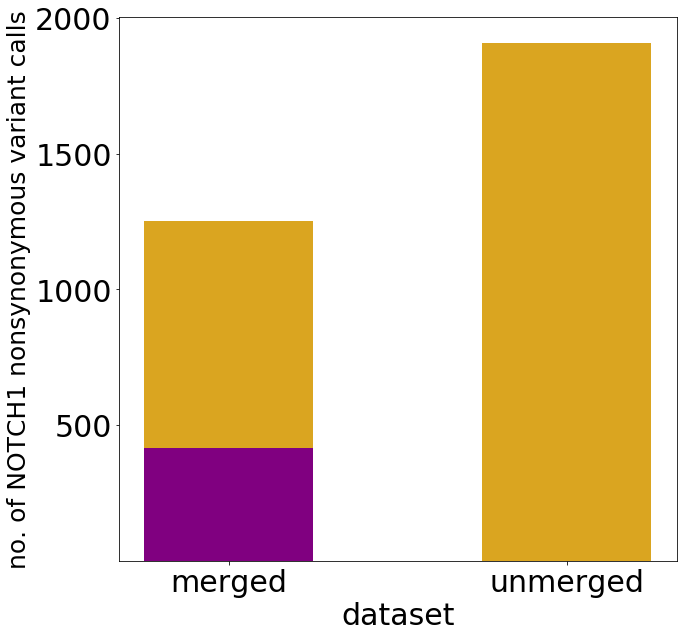

In [8]:
# NOTCH1 merged call proportions
import numpy as np
import matplotlib.pyplot as plt
plt.close()

text_font_size=30
text_font_size_2=25
f, ax = plt.subplots(figsize=(10,10)) # set the size that you'd like (width, height)
purple_portion = (415, 0)
gold_portion = (1251-415, 1907)


p1=ax.bar(np.arange(2), purple_portion, width=0.5, color='purple')
p2=ax.bar(np.arange(2), gold_portion, bottom=purple_portion, width=0.5, color='goldenrod')
plt.xticks(np.arange(2), ('merged','unmerged'), fontsize=text_font_size)
plt.xlabel('dataset', fontsize=text_font_size)

y_major_ticks =  [500, 1000, 1500, 2000]
y_major_tick_labels =  [ '500', '1000', '1500', '2000']              
plt.yticks(y_major_ticks, y_major_tick_labels, fontsize=text_font_size)
plt.ylabel('no. of NOTCH1 nonsynonymous variant calls', fontsize=text_font_size_2)

# plt.savefig('merged_call_prop_NOTCH1.pdf',bbox_inches='tight')

Text(0, 0.5, 'no. of TP53 nonsynonymous variant calls')

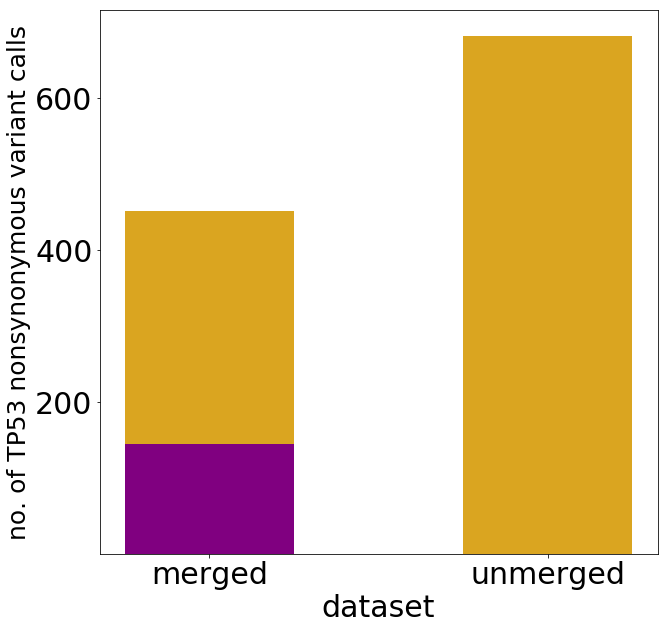

In [7]:
# TP53 merged call proportions
import numpy as np
import matplotlib.pyplot as plt
plt.close()

text_font_size=30
text_font_size_2=25
f, ax = plt.subplots(figsize=(10,10)) # set the size that you'd like (width, height)
purple_portion = (145, 0)
gold_portion = (451-145, 681)

p1=ax.bar(np.arange(2), purple_portion, width=0.5, color='purple')
p2=ax.bar(np.arange(2), gold_portion, bottom=purple_portion, width=0.5, color='goldenrod')
plt.xticks(np.arange(2), ('merged','unmerged'), fontsize=text_font_size)
plt.xlabel('dataset', fontsize=text_font_size)

y_major_ticks =  [200, 400, 600]
y_major_tick_labels =  [ '200', '400', '600']              
plt.yticks(y_major_ticks, y_major_tick_labels, fontsize=text_font_size)
plt.ylabel('no. of TP53 nonsynonymous variant calls', fontsize=text_font_size_2)

# plt.savefig('merged_call_prop_TP53.pdf',bbox_inches='tight')

Text(0, 0.5, 'no. of synonymous variant calls')

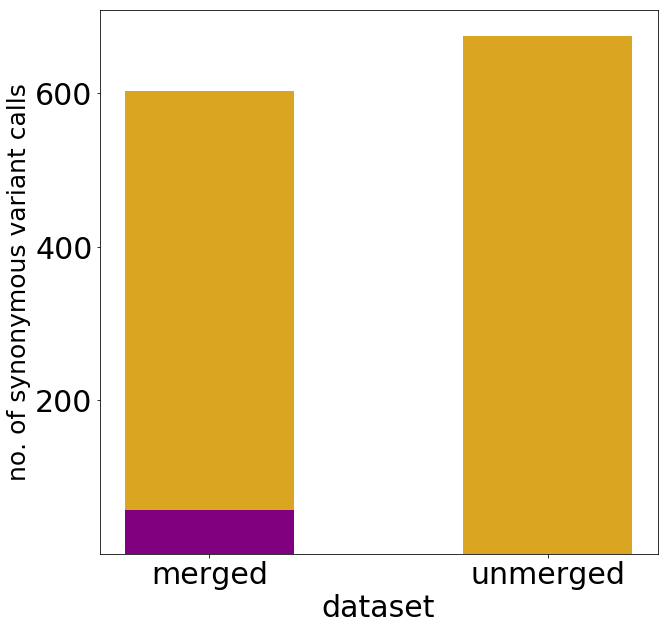

In [8]:
# synonymous merged call proportions
import numpy as np
import matplotlib.pyplot as plt
plt.close()

text_font_size=30
text_font_size_2=25
f, ax = plt.subplots(figsize=(10,10)) # set the size that you'd like (width, height)
purple_portion = (57, 0)
gold_portion = (603-57, 674)


p1=ax.bar(np.arange(2), purple_portion, width=0.5, color='purple')
p2=ax.bar(np.arange(2), gold_portion, bottom=purple_portion, width=0.5, color='goldenrod')
plt.xticks(np.arange(2), ('merged','unmerged'), fontsize=text_font_size)
plt.xlabel('dataset', fontsize=text_font_size)


y_major_ticks =  [200, 400, 600]
y_major_tick_labels =  [ '200', '400', '600']              
plt.yticks(y_major_ticks, y_major_tick_labels, fontsize=text_font_size)
plt.ylabel('no. of synonymous variant calls', fontsize=text_font_size_2)

# plt.savefig('merged_call_prop_synonymous.pdf',bbox_inches='tight')

## Mutation co-occurrence (figure S18)

We examine the unmerged datasets in order to study mutation co-occurrence in the same biopsy samples.

In [81]:
#  unmerged data set
Martincorena_oesophagus_data='Martincorena_oesophagus_VAF.csv'


Sample_ID_keys = {}
NOTCH1_in_biopsy = {}
TP53_in_biopsy = {}
Syn_in_biopsy = {}
NOTCH1_or_TP53_in_biopsy = {}
top_10_genes_in_biopsy = {}
nonsyn_in_biopsy = {}
ESCC_genes_in_biopsy = {}

# these are genes raked 1-10 in Martincorena
top_10_genes = ['NOTCH1', 'TP53', 'NOTCH2', 'NOTCH3', 'FAT1', 'MUC17', 'KMT2D', 'FAT4', 'KMT2A', 'APOB']
# these are genes found to be positively selected in Martincorena and are also canonical ESCC drivers
ESCC_genes = ['TP53', 'NFE2L2', 'KMT2D', 'PIK3CA', 'NOTCH1', 'PTCH1' , 'PTEN' , 'SMAD4' , 'NOTCH3', 'CUL3', 'CCND1', 'TP63', 'FAT1', 'AJUBA']

with open(Martincorena_oesophagus_data) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        sample_ID=str(row[0])
        vaf=float(row[5])
        gene=str(row[7])
        mutation_impact=str(row[8])
        
        if sample_ID not in Sample_ID_keys.keys():
            Sample_ID_keys[sample_ID]=1
        
        if trimmed_fmin < vaf < trimmed_fmax:
            
    #         NOTCH1 gene

            if gene=='NOTCH1':

                if mutation_impact=='Missense' or mutation_impact=='Nonsense':
                    
                    if sample_ID in NOTCH1_in_biopsy.keys():
#                         duplicate_NOTCH1 = duplicate_NOTCH1 +1
                        tmp=NOTCH1_in_biopsy[sample_ID]
                        tmp.append(vaf)
                        NOTCH1_in_biopsy[sample_ID]=tmp
                    else:    
                        NOTCH1_in_biopsy[sample_ID]=[vaf]


     #          TP53 gene  

            if gene=='TP53':

                if mutation_impact=='Missense' or mutation_impact=='Nonsense':
                    
                    if sample_ID in TP53_in_biopsy.keys():
#                         duplicate_TP53 = duplicate_TP53 +1
                        tmp=TP53_in_biopsy[sample_ID]
                        tmp.append(vaf)
                        TP53_in_biopsy[sample_ID]=tmp
                    else:
                        TP53_in_biopsy[sample_ID]=[vaf]
                    

             #         NOTCH1 gene or TP53 gene

            

            if mutation_impact=='Missense' or mutation_impact=='Nonsense':
                
                if sample_ID in nonsyn_in_biopsy.keys():
 
                    tmp=nonsyn_in_biopsy[sample_ID]
                    tmp.append(vaf)
                    nonsyn_in_biopsy[sample_ID]=tmp
                else:    
                    nonsyn_in_biopsy[sample_ID]=[vaf]
                
                if gene=='NOTCH1' or gene=='TP53':
                    
                    if sample_ID in NOTCH1_or_TP53_in_biopsy.keys():
 
                        tmp=NOTCH1_or_TP53_in_biopsy[sample_ID]
                        tmp.append(vaf)
                        NOTCH1_or_TP53_in_biopsy[sample_ID]=tmp
                    else:    
                        NOTCH1_or_TP53_in_biopsy[sample_ID]=[vaf]
                        
                if gene in top_10_genes:
                                        
                    if sample_ID in top_10_genes_in_biopsy.keys():
 
                        tmp=top_10_genes_in_biopsy[sample_ID]
                        tmp.append(vaf)
                        top_10_genes_in_biopsy[sample_ID]=tmp
                    else:    
                        top_10_genes_in_biopsy[sample_ID]=[vaf]
                        
                if gene in ESCC_genes:
                                        
                    if sample_ID in ESCC_genes_in_biopsy.keys():
 
                        tmp=ESCC_genes_in_biopsy[sample_ID]
                        tmp.append(vaf)
                        ESCC_genes_in_biopsy[sample_ID]=tmp
                    else:    
                        ESCC_genes_in_biopsy[sample_ID]=[vaf]



#             Synonymous

            if mutation_impact=='Synonymous':
        
                if sample_ID in Syn_in_biopsy.keys():
    #                 duplicate_TP53 = duplicate_TP53 +1
                    tmp=Syn_in_biopsy[sample_ID]
                    tmp.append(vaf)
                    Syn_in_biopsy[sample_ID]=tmp
                else:
                    Syn_in_biopsy[sample_ID]=[vaf]


print('number of unmerged sample IDs with mutations', len(Sample_ID_keys.keys()))

print('There are', len(NOTCH1_in_biopsy),'unmerged samples with NOTCH1 nonsynonymous variants')
print('There are', len(TP53_in_biopsy),'unmerged samples with TP53 nonsynonymous variants')
print('There are', len(Syn_in_biopsy),'unmerged samples with synonymous variants')

number of unmerged sample IDs with mutations 832
There are 628 unmerged samples with NOTCH1 nonsynonymous variants
There are 340 unmerged samples with TP53 nonsynonymous variants
There are 277 unmerged samples with synonymous variants


In [87]:
# total VAF of nonsyn. mutantsin biopsy sample
total_nonsyn_VAF_in_biopsy = {}
total_nonsyn_num_in_biopsy = {}
for sample_ID, list_of_nonsyn_VAF in nonsyn_in_biopsy.items():
    
    num_of_nonsyn_in_biopsy = len(list_of_nonsyn_VAF)
    total_nonsyn_num_in_biopsy[sample_ID] = num_of_nonsyn_in_biopsy
    
    total_nonsyn_VAF = 0
    for VAF in list_of_nonsyn_VAF:
        if VAF < 0.5:
            total_nonsyn_VAF = total_nonsyn_VAF + VAF
        else:
            total_nonsyn_VAF = total_nonsyn_VAF + 0.5
        
    total_nonsyn_VAF_in_biopsy[sample_ID] = total_nonsyn_VAF 
    
total_nonsyn_VAF_in_biopsy_in_ascending_order = dict(sorted(total_nonsyn_VAF_in_biopsy.items(), key=lambda item: item[1]))
total_nonsyn_VAF_in_biopsy_in_ascending_order_sample_with_syn_highlighted = []
num_nonsyn_in_biopsy_in_ascending_order = []
n=0
for sample_ID, total_VAF in total_nonsyn_VAF_in_biopsy_in_ascending_order.items():
    
    num_of_nonsyn_in_biopsy = total_nonsyn_num_in_biopsy[sample_ID]
    num_nonsyn_in_biopsy_in_ascending_order.append(num_of_nonsyn_in_biopsy)
    
    if sample_ID in Syn_in_biopsy.keys():
        n=n+1
        total_nonsyn_VAF_in_biopsy_in_ascending_order_sample_with_syn_highlighted.append(total_VAF)
    else:
        total_nonsyn_VAF_in_biopsy_in_ascending_order_sample_with_syn_highlighted.append(0)
        
list_of_total_nonsyn_VAF_in_biopsy_with_syn_highlighted_in_order_values = total_nonsyn_VAF_in_biopsy_in_ascending_order_sample_with_syn_highlighted[::-1]
list_of_total_nonsyn_VAF_in_biopsy_in_order_keys = list(total_nonsyn_VAF_in_biopsy_in_ascending_order.keys())[::-1]
list_of_total_nonsyn_VAF_in_biopsy_in_order_values = list(total_nonsyn_VAF_in_biopsy_in_ascending_order.values())[::-1]

print(len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values),\
     '   ', len(list_of_total_nonsyn_VAF_in_biopsy_in_order_keys))


num_nonsyn_in_biopsy_in_ascending_order = num_nonsyn_in_biopsy_in_ascending_order[::-1]
print('num_nonsyn_in_biopsy_in_ascending_order', len(num_nonsyn_in_biopsy_in_ascending_order))


784     784
num_nonsyn_in_biopsy_in_ascending_order 784


len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values) 844
len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values) 844
num_nonsyn_in_biopsy_in_ascending_order 844
num_nonsyn_in_biopsy_in_ascending_order 844


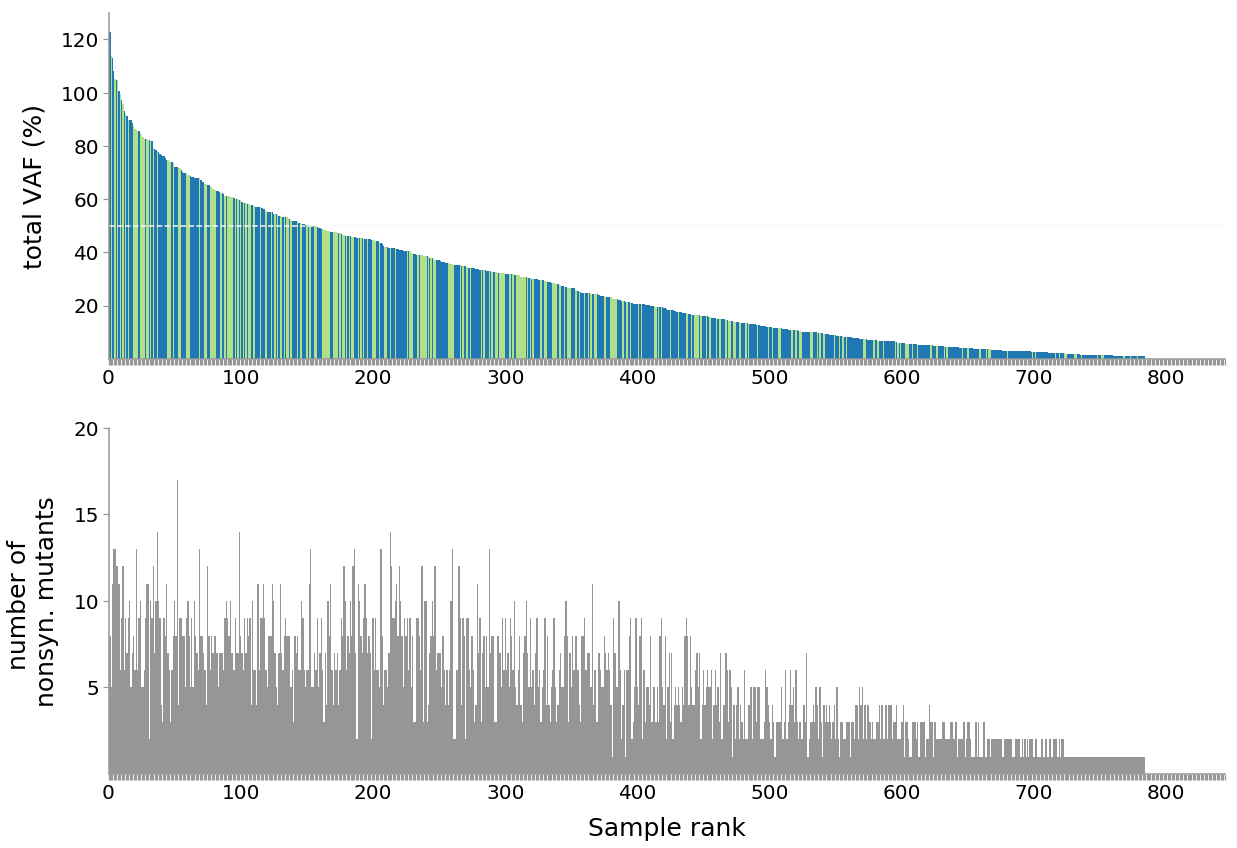

In [93]:
# Plot summary graph of total nonsyn. VAFs and numbers in samples (back to back)

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(2, 1, figsize=(20,7*2))

axisfont = 20
axislabelfont = 25
scale = 1.2

Martincorena_color = '#00441b'
Martincorena_color_Ntau_10to4 = '#00441b'
Martincorena_color_Ntau_7500 = '#238b45'
Martincorena_color_Ntau_5000 = '#41ab5d'

Bolton_color = '#6a3d9a'

# plot 1 

x_major_ticks =  np.linspace(0, 844, 845)
x_major_tick_labels = []
for x in x_major_ticks:
    if x % 100 == 0:
        x_major_tick_labels.append(int(x))
    else:
        x_major_tick_labels.append('')
ax1[0].set_xticks(x_major_ticks)
ax1[0].set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1[0].xaxis.set_tick_params(width=scale, color = grey3, length = 6)
ax1[0].set_xlim(0, 844)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1, 1.2]
y_major_tick_labels =  ['20', '40', '60', '80', '100','120' ]
ax1[0].set_yticks(y_major_ticks)
ax1[0].set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1[0].yaxis.set_tick_params(width=scale, color = grey3, length = 6)
ax1[0].set_ylim(0, 1.3)

print('len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values)', len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values))
for i in range(n_sample - len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values)):
    list_of_total_nonsyn_VAF_in_biopsy_in_order_values.append(0)
print('len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values)', len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values))

# print('len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values)', len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values))
# for i in range(n_sample - len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values)):
#     list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values.append(0)
# print('len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values)', len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values))

ax1[0].hlines(y=0.5, xmin=0, xmax = 845, linestyle = '--', color = grey1)

ax1[0].bar(range(len(list_of_total_nonsyn_VAF_in_biopsy_in_order_values)), list_of_total_nonsyn_VAF_in_biopsy_in_order_values, color = '#1f78b4', zorder=0, width=1, label='syn highlighted')
ax1[0].bar(range(len(list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values)), list_of_total_nonsyn_VAF_in_biopsywith_syn_highlighted_in_order_values, color = '#b2df8a', zorder=0, width=1, label=' ')

# axisfont=14*1.2
# axislabelfont=15*1.2
# ax1[0].set_xlabel('Sample rank', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')
ax1[0].set_ylabel('total VAF (%)', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1[0].spines['top'].set_visible(False)
ax1[0].spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1[0].spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1[0].spines[axis].set_color(grey3)
    
# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.85, 0.15), frameon=0, fontsize = 20)
# ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')

# plot 2
    
print('num_nonsyn_in_biopsy_in_ascending_order', len(num_nonsyn_in_biopsy_in_ascending_order))
for i in range(n_sample - len(num_nonsyn_in_biopsy_in_ascending_order)):
    num_nonsyn_in_biopsy_in_ascending_order.append(0)
print('num_nonsyn_in_biopsy_in_ascending_order', len(num_nonsyn_in_biopsy_in_ascending_order))

# ax1[1].hlines(y=0.5, xmin=0, xmax = 845, linestyle = '--', color = grey1)

ax1[1].bar(range(len(num_nonsyn_in_biopsy_in_ascending_order)), num_nonsyn_in_biopsy_in_ascending_order, color = grey3, zorder=0, width=1, label=' ')

ax1[1].set_xlabel('Sample rank', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')
ax1[1].set_ylabel('number of \nnonsyn. mutants', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')


x_major_ticks =  np.linspace(0, 844, 845)
x_major_tick_labels = []
for x in x_major_ticks:
    if x % 100 == 0:
        x_major_tick_labels.append(int(x))
    else:
        x_major_tick_labels.append('')
ax1[1].set_xticks(x_major_ticks)
ax1[1].set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1[1].xaxis.set_tick_params(width=scale, color = grey3, length = 6)
ax1[1].set_xlim(0, 844)

y_major_ticks =  [5, 10, 15, 20]
y_major_tick_labels =  [ '5', '10', '15','20' ]
ax1[1].set_yticks(y_major_ticks)
ax1[1].set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1[1].yaxis.set_tick_params(width=scale, color = grey3, length = 6)
ax1[1].set_ylim(0, 20)

#Only show the required axis lines
ax1[1].spines['top'].set_visible(False)
ax1[1].spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1[1].spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1[1].spines[axis].set_color(grey3)
    
    
# plt.savefig('total_VAF_in_biopsy_samples_844_and_num_of_nonsyn_variants.pdf', bbox_inches='tight')


## correlation plots (figure 4C, S17)

277
len(list_largest_nonsyn_VAF_in_order): 277
len(list_largest_syn_VAF_in_order): 277
In 237 pairs of data there is a larger nonsyn clone than the largest syn clone
31 pairs lie below lower curve
226 pairs lie above upper curve


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


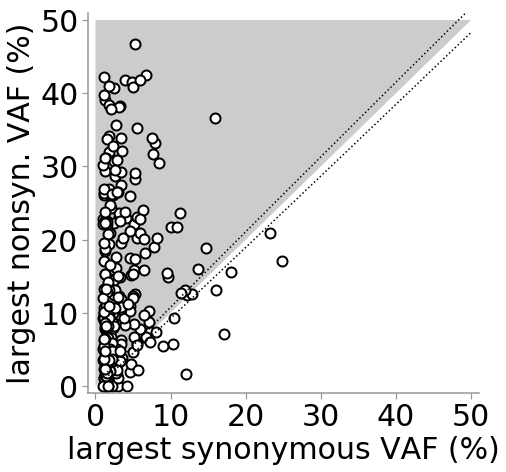

In [48]:
# nonsyn SNV from all 74 genes as putative drivers

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)

list_largest_syn_VAF_in_order = []
list_largest_nonsyn_VAF_in_order = []
print(len(Syn_in_biopsy.keys()))
for sample_ID in Syn_in_biopsy.keys():
    
    all_syn = Syn_in_biopsy[sample_ID]

    list_largest_syn_VAF_in_order.append(max(all_syn)) 
    
    if sample_ID in nonsyn_in_biopsy.keys():
    
        all_nonsyn = nonsyn_in_biopsy[sample_ID]
    
        list_largest_nonsyn_VAF_in_order.append(max(all_nonsyn))
        
    else:
        
        list_largest_nonsyn_VAF_in_order.append(0)
 

print('len(list_largest_nonsyn_VAF_in_order):', len(list_largest_nonsyn_VAF_in_order))
print('len(list_largest_syn_VAF_in_order):', len(list_largest_syn_VAF_in_order))

num_consistency=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_vaf=list_largest_syn_VAF_in_order[index]
    nonsyn_vaf=list_largest_nonsyn_VAF_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_consistency=num_consistency+1
print('In', num_consistency, 'pairs of data there is a larger nonsyn clone than the largest syn clone')

ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest nonsyn. VAF (%)', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

D = 870
x_axis=np.linspace(0, 0.5, 100)
upper_error=[1/(2*D*f)**0.5*f+f for f in x_axis]
lower_error=[-1/(2*D*f)**0.5*f+f for f in x_axis]
ax.plot(x_axis, upper_error, linestyle=':', color='black')
ax.plot(x_axis, lower_error, linestyle=':', color='black')

n_lower_curve=0
patients_below_lower_curve =[]
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF =  list_largest_nonsyn_VAF_in_order[index]

        
    if syn_VAF - nonsyn_VAF > 1/(2*D*f)**0.5*f:
        n_lower_curve = n_lower_curve + 1
#         patients_below_lower_curve.append(patient_id)
print(n_lower_curve,'pairs lie below lower curve') 

n_upper_curve=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF = list_largest_nonsyn_VAF_in_order[index]
    if nonsyn_VAF - syn_VAF > 1/(2*D*f)**0.5*f:
        n_upper_curve = n_upper_curve + 1
print(n_upper_curve,'pairs lie above upper curve') 

ceiling = [0.5 for x in x_axis]
ax.fill_between(x_axis, ceiling, x_axis, facecolor=grey2)

 

ax.scatter(list_largest_syn_VAF_in_order, list_largest_nonsyn_VAF_in_order, \
           marker='o', edgecolors='black', color='white', s=100, zorder=1, linewidth=2)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Correlation_largest_syn_largest_nonsyn_all_genes.pdf', bbox_inches='tight')

277
len(largest_top_10_genes_nonsyn_vaf): 277
len(list_largest_syn_VAF_in_order): 277
In 229 pairs of data there is a larger nonsyn clone than the largest syn clone
36 pairs lie below lower curve
222 pairs lie above upper curve


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


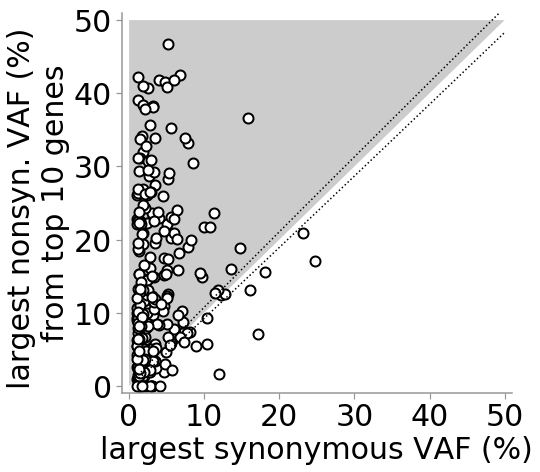

In [209]:
# nonsyn SNV from top 10 genes as putative drivers

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)

list_largest_syn_VAF_in_order = []
largest_top_10_genes_nonsyn_vaf_in_order = []
print(len(Syn_in_biopsy.keys()))
for sample_ID in Syn_in_biopsy.keys():
    
    all_syn = Syn_in_biopsy[sample_ID]

    list_largest_syn_VAF_in_order.append(max(all_syn)) 
    
    if sample_ID in top_10_genes_in_biopsy.keys():
    
        all_nonsyn = top_10_genes_in_biopsy[sample_ID]
    
        largest_top_10_genes_nonsyn_vaf_in_order.append(max(all_nonsyn))
        
    else:
        
        largest_top_10_genes_nonsyn_vaf_in_order.append(0)
 
print('len(largest_top_10_genes_nonsyn_vaf):', len(largest_top_10_genes_nonsyn_vaf_in_order))
print('len(list_largest_syn_VAF_in_order):', len(list_largest_syn_VAF_in_order))

num_consistency=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_vaf=list_largest_syn_VAF_in_order[index]
    nonsyn_vaf=largest_top_10_genes_nonsyn_vaf_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_consistency=num_consistency+1
print('In', num_consistency, 'pairs of data there is a larger nonsyn clone than the largest syn clone')

ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest nonsyn. VAF (%) \nfrom top 10 genes', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

D = 870
x_axis=np.linspace(0, 0.5, 100)
upper_error=[1/(2*D*f)**0.5*f+f for f in x_axis]
lower_error=[-1/(2*D*f)**0.5*f+f for f in x_axis]
ax.plot(x_axis, upper_error, linestyle=':', color='black')
ax.plot(x_axis, lower_error, linestyle=':', color='black')

n_lower_curve=0
patients_below_lower_curve =[]
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF =  largest_top_10_genes_nonsyn_vaf_in_order[index]

        
    if syn_VAF - nonsyn_VAF > 1/(2*D*f)**0.5*f:
        n_lower_curve = n_lower_curve + 1
#         patients_below_lower_curve.append(patient_id)
print(n_lower_curve,'pairs lie below lower curve') 

n_upper_curve=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF = largest_top_10_genes_nonsyn_vaf_in_order[index]
    if nonsyn_VAF - syn_VAF > 1/(2*D*f)**0.5*f:
        n_upper_curve = n_upper_curve + 1
print(n_upper_curve,'pairs lie above upper curve') 

ceiling = [0.5 for x in x_axis]
ax.fill_between(x_axis, ceiling, x_axis, facecolor=grey2)

 

ax.scatter(list_largest_syn_VAF_in_order, largest_top_10_genes_nonsyn_vaf_in_order, \
           marker='o', edgecolors='black', color='white', s=100, zorder=1, linewidth=2)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Correlation_largest_syn_largest_nonsyn_top_10_genes.pdf', bbox_inches='tight')

277
len(largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order): 277
len(list_largest_syn_VAF_in_order): 277
In 226 pairs of data there is a larger nonsyn clone than the largest syn clone
41 pairs lie below lower curve
219 pairs lie above upper curve


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


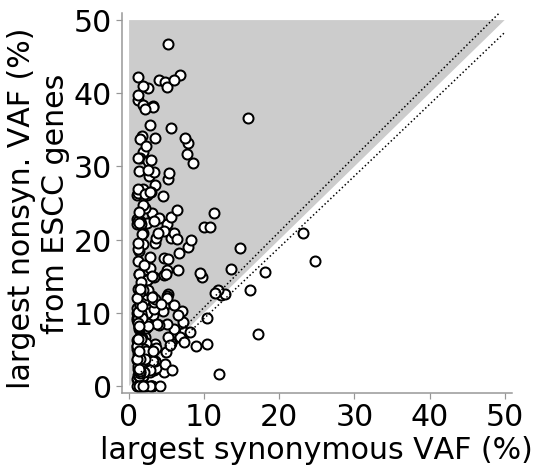

In [44]:
# nonsyn SNV from 11 positively selected ESCC genes as putative drivers

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)

list_largest_syn_VAF_in_order = []
largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order = []
print(len(Syn_in_biopsy.keys()))
for sample_ID in Syn_in_biopsy.keys():
    
    all_syn = Syn_in_biopsy[sample_ID]

    list_largest_syn_VAF_in_order.append(max(all_syn)) 
    
    if sample_ID in ESCC_genes_in_biopsy.keys():
    
        all_nonsyn = ESCC_genes_in_biopsy[sample_ID]
    
        largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order.append(max(all_nonsyn))
        
    else:
        
        largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order.append(0)
 
print('len(largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order):', len(largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order))
print('len(list_largest_syn_VAF_in_order):', len(list_largest_syn_VAF_in_order))

num_consistency=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_vaf=list_largest_syn_VAF_in_order[index]
    nonsyn_vaf=largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_consistency=num_consistency+1
print('In', num_consistency, 'pairs of data there is a larger nonsyn clone than the largest syn clone')

ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest nonsyn. VAF (%) \nfrom ESCC genes', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

D = 870
x_axis=np.linspace(0, 0.5, 100)
upper_error=[1/(2*D*f)**0.5*f+f for f in x_axis]
lower_error=[-1/(2*D*f)**0.5*f+f for f in x_axis]
ax.plot(x_axis, upper_error, linestyle=':', color='black')
ax.plot(x_axis, lower_error, linestyle=':', color='black')

n_lower_curve=0
patients_below_lower_curve =[]
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF =  largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order[index]

        
    if syn_VAF - nonsyn_VAF > 1/(2*D*f)**0.5*f:
        n_lower_curve = n_lower_curve + 1
#         patients_below_lower_curve.append(patient_id)
print(n_lower_curve,'pairs lie below lower curve') 

n_upper_curve=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF = largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order[index]
    if nonsyn_VAF - syn_VAF > 1/(2*D*f)**0.5*f:
        n_upper_curve = n_upper_curve + 1
print(n_upper_curve,'pairs lie above upper curve') 

ceiling = [0.5 for x in x_axis]
ax.fill_between(x_axis, ceiling, x_axis, facecolor=grey2)

 

ax.scatter(list_largest_syn_VAF_in_order, largest_11_positively_selected_ESCC_genes_nonsyn_vaf_in_order, \
           marker='o', edgecolors='black', color='white', s=100, zorder=1, linewidth=2)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Correlation_largest_syn_largest_nonsyn_ESCC_genes.pdf', bbox_inches='tight')

277
len(largest_NOTCH1_or_TP53_nonsyn_vaf): 277
len(list_largest_syn_VAF_in_order): 277
In 215 pairs of data there is a larger nonsyn clone than the largest syn clone
55 pairs lie below lower curve
209 pairs lie above upper curve


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


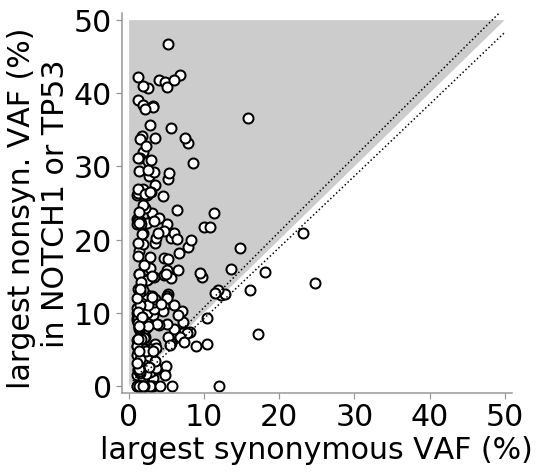

In [210]:
# NOTCH1 and TP53 as putative drivers
# conditioned on detecting >= 1 synonymous variant

import matplotlib.pyplot as plt
plt.close()

f, ax = plt.subplots(figsize=(7,7)) # set the size that you'd like (width, height)

list_largest_syn_VAF_in_order = []
largest_NOTCH1_or_TP53_nonsyn_vaf_in_order = []
print(len(Syn_in_biopsy.keys()))
for sample_ID in Syn_in_biopsy.keys():
    
    all_syn = Syn_in_biopsy[sample_ID]

    list_largest_syn_VAF_in_order.append(max(all_syn)) 
    
    if sample_ID in NOTCH1_or_TP53_in_biopsy.keys():
    
        all_nonsyn = NOTCH1_or_TP53_in_biopsy[sample_ID]
    
        largest_NOTCH1_or_TP53_nonsyn_vaf_in_order.append(max(all_nonsyn))
        
    else:
        
        largest_NOTCH1_or_TP53_nonsyn_vaf_in_order.append(0)
 
# print(len(largest_NOTCH1_or_TP53_nonsyn_vaf_in_order),'pairs of data')
print('len(largest_NOTCH1_or_TP53_nonsyn_vaf):', len(largest_NOTCH1_or_TP53_nonsyn_vaf_in_order))
print('len(list_largest_syn_VAF_in_order):', len(list_largest_syn_VAF_in_order))

num_consistency=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_vaf=list_largest_syn_VAF_in_order[index]
    nonsyn_vaf=largest_NOTCH1_or_TP53_nonsyn_vaf_in_order[index]
    if nonsyn_vaf> syn_vaf:
        num_consistency=num_consistency+1
print('In', num_consistency, 'pairs of data there is a larger nonsyn clone than the largest syn clone')

ax.set_xlabel('largest synonymous VAF (%)', fontsize=30)
ax.set_ylabel('largest nonsyn. VAF (%) \nin NOTCH1 or TP53', fontsize=30)
ax.set_xlim(-0.01, 0.5+0.01)
ax.set_ylim(-0.01, 0.5+0.01)

x_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_major_tick_labels =  [ "0","10", '20', '30', '40', '50']              
ax.set_xticks(x_major_ticks)
ax.set_xticklabels(x_major_tick_labels, fontsize = 30)
ax.xaxis.set_tick_params(width=1.2, color = grey3, length = 6)

y_major_ticks =  [0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_major_tick_labels =  ["0","10", '20', '30', '40', '50']              
ax.set_yticks(y_major_ticks)
ax.set_yticklabels(y_major_tick_labels, fontsize = 30)
ax.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

D = 870
x_axis=np.linspace(0, 0.5, 100)
upper_error=[1/(2*D*f)**0.5*f+f for f in x_axis]
lower_error=[-1/(2*D*f)**0.5*f+f for f in x_axis]
ax.plot(x_axis, upper_error, linestyle=':', color='black')
ax.plot(x_axis, lower_error, linestyle=':', color='black')

n_lower_curve=0
patients_below_lower_curve =[]
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF =  largest_NOTCH1_or_TP53_nonsyn_vaf_in_order[index]

        
    if syn_VAF - nonsyn_VAF > 1/(2*D*f)**0.5*f:
        n_lower_curve = n_lower_curve + 1
#         patients_below_lower_curve.append(patient_id)
print(n_lower_curve,'pairs lie below lower curve') 


# n_upper_curve=0
# for index in range(len(list_syn_VAF_in_order)):
#     syn_VAF = list_syn_VAF_in_order[index]
#     f = syn_VAF
#     nonsyn_VAF = list_nonsyn_VAF_in_order[index]
#     if nonsyn_VAF - syn_VAF > 1/(2*D*f)**0.5*f:
#         n_upper_curve = n_upper_curve + 1
# print(n_upper_curve,'pairs lie above upper curve') 

# # n_lower_curve=0
# # for index in range(len(list_largest_syn_VAF_in_order)):
# #     syn_VAF = list_largest_syn_VAF_in_order[index]
# #     f = syn_VAF
# #     nonsyn_VAF = largest_NOTCH1_or_TP53_nonsyn_vaf_in_order[index]
# #     if nonsyn_VAF > -1/(2*D*f)**0.5*f+f:
# #         n_lower_curve = n_lower_curve + 1
# # print(n_lower_curve,'pairs lie above lower curve') 

n_upper_curve=0
for index in range(len(list_largest_syn_VAF_in_order)):
    syn_VAF = list_largest_syn_VAF_in_order[index]
    f = syn_VAF
    nonsyn_VAF = largest_NOTCH1_or_TP53_nonsyn_vaf_in_order[index]
    if nonsyn_VAF - syn_VAF > 1/(2*D*f)**0.5*f:
        n_upper_curve = n_upper_curve + 1
print(n_upper_curve,'pairs lie above upper curve') 

ceiling = [0.5 for x in x_axis]
ax.fill_between(x_axis, ceiling, x_axis, facecolor=grey2)

 

ax.scatter(list_largest_syn_VAF_in_order, largest_NOTCH1_or_TP53_nonsyn_vaf_in_order, \
           marker='o', edgecolors='black', color='white', s=100, zorder=1, linewidth=2)


for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax.spines[axis].set_color(grey3)

# plt.savefig('Correlation_largest_syn_largest_nonsyn_NOTCH1_TP53_genes_July2020.pdf', bbox_inches='tight')

# Main analysis based on synonymous VAF spectra

In [8]:
# Setting parameters

# mappable genome size of GRCh37
haploid_genome_size = 2864785220

u_estimated_per_bp=35/(haploid_genome_size)/2    # haploid per year
print('annual haploid mutation rate per bp is', u_estimated_per_bp)
print('compared to annual haploid mutation rate per bp in healthy blood', 1.950354609929078e-09)
correction_factor_to_oesophagus = u_estimated_per_bp/1.950354609929078e-09
print('correction_factor_to_oesophagus', correction_factor_to_oesophagus)

oesophagus_target_size=330*10**3 # coding regions of the panel
u_martincorena_panel=u_estimated_per_bp*oesophagus_target_size   # haploid per year, estimated from literature
ratio_syn_total = 0.3090909090909091 # same as Illumina panel
syn_total_mut_rate_ratio = ratio_syn_total
oesophagus_nonsyn_mut_rate_per_bp = u_estimated_per_bp*(1-ratio_syn_total)
oesophagus_syn_mut_rate_per_bp = u_estimated_per_bp*(ratio_syn_total)
Martincorena_synonymous_mu = u_martincorena_panel*ratio_syn_total
u_oes_syn = Martincorena_synonymous_mu
print('estimated synonymous annual haploid rates across panel:', Martincorena_synonymous_mu)
Martincorena_nonsynonymous_mu = u_martincorena_panel*(1-ratio_syn_total)
u_oes_nonsyn = Martincorena_nonsynonymous_mu
print('estimated nonsynonymous annual haploid rates: across panel', Martincorena_nonsynonymous_mu)

# This estimate is from Lee Six et al.
# NB:  if a mutation had mutant reads in greater than 120 out of 140 clonal
# colonies we considered it as germline
# Mutations that fell within 10 base pairs of each other or within 10 base pairs of
# indels were removed.
number_of_mutation_across_haploid_genome_per_cell_doubling_in_blood = 1.84
number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus = correction_factor_to_oesophagus*number_of_mutation_across_haploid_genome_per_cell_doubling_in_blood
oesophagus_dev_synonymous_mu_LeeSix = oesophagus_target_size/haploid_genome_size*number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*ratio_syn_total
print('oesophagus_dev_synonymous_mu_LeeSix', oesophagus_dev_synonymous_mu_LeeSix)



annual haploid mutation rate per bp is 6.108660390254317e-09
compared to annual haploid mutation rate per bp in healthy blood 1.950354609929078e-09
correction_factor_to_oesophagus 3.1320767819122137
estimated synonymous annual haploid rates across panel: 0.0006230833598059403
estimated nonsynonymous annual haploid rates: across panel 0.0013927745689779844
oesophagus_dev_synonymous_mu_LeeSix 0.0002051910091986876


In [42]:
# Theory functions

import scipy.special as sc
import mpmath as mp

def Predicted_drift_with_cutoff(l, N_tau, c, t):
    return N_tau/(1-2*np.exp(l))*np.exp(-2*N_tau/(c*t)*(np.exp(l)/(1-2*np.exp(l))))

# def Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s):
#     return 2*N_tau*u_ben*(1+2*np.exp(l)/(1-2*np.exp(l)))*np.exp(- 2*N_tau*s/(np.exp(s*t)-1)*np.exp(l)/(1-2*np.exp(l))      )

def developmental_synonymous(l, u_dev, u_norm): # u_norm is the somatic synonymous mutation rates

    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return density


# beneficial-first route
def hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau
    
    #     inserted factor of 2 to account for diploidy
    expected_density=2*np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*\
    (np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
     np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

# neutral-first route
def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
    
    #     inserted factor of 2 to account for diploidy
    expected_density=2*np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

# sums up the two contributions and corrects for saturation of the first beneficial mutant
def hitchhiking_Reed_Model(l, N_tau, t, u_driver, s):

    relative_fitness=0.05
    psi = np.log((s/relative_fitness-1)*N_tau*s+1)/s
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, u_driver, s)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver, s)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s)
    
    return density


def linProbtheory_ages_dev_not_normalized(l, u_dev):

    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)            

    return density

def linProbtheory_actual_ages_hitch_by_single_s_driver(l, haploid_driver_mut_rate, nonsyn_haploid_passenger_rate, N_tau, s):
    
    result = 0
    for j in range(len(Martincorena_donor_ages)):

        t = Martincorena_donor_ages[j]
        result = result + 2*nonsyn_haploid_passenger_rate*hitchhiking_Reed_Model(l, N_tau, t, haploid_driver_mut_rate, s)*list_of_n_samples_per_person[j]/n_sample

    return result

def driver_contrib(l, haploid_driver_rate, N_tau, s_tolerance):
    
    b = 3
    d = 0.1
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)
    normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s))/d)**b)
    
    def rho(s):
        result = 0
        for j in range(len(Martincorena_donor_ages)):

            t = Martincorena_donor_ages[j]
#             no factor of 2 because data is normalized by 2mu
            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample
       
        return result

    driver_contrib = integrate.quad(rho, s_tolerance, s_max)[0]
    
    return driver_contrib

def driver_contrib_single_s_driver(l, haploid_driver_rate, N_tau, s):
    
    result = 0
    for j in range(len(Martincorena_donor_ages)):

        t = Martincorena_donor_ages[j]
#             no factor of 2 because data is normalized by 2mu
        result = result + 2*haploid_driver_rate*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample

    return result



In [15]:
# Function for generating data lists for optimization

# this is for lists that eventually are fitted to normal density
# this is divided by binsize
def not_rescaled_VAF_densities_list(trimmed_VAF_list, study_total, n_bins, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error)
    for a, b, c, d in VAF_densities_zip:
        VAF_densities.append((a, b, c, d))
        
    return VAF_densities

# this is for lists that eventually are fitted cumulatively
# this is not divided by binsize
def not_rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))

    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities

def rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))

    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities

# fit to cumulative probability not normalized by binsize but by mutation rate only
def rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    cumulative_bins = bins[0: len(bins)-1]
    bin_centres = (bins[:-1] + bins[1:])/2


    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(cumulative_bins, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities

# fit to cumulative probability not normalized by binsize nor mutation rate 
def not_rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    cumulative_bins = bins[0: len(bins)-1]
    bin_centres = (bins[:-1] + bins[1:])/2


    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(cumulative_bins, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities


In [11]:
# optimization functions
import scipy.special as sc

def squared_distance_calculation_HH(params, data, c, ages, N_tau, u_oes_syn, u_dev, s_NOTCH1, lmin, lmax, n_bins): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    s = s_NOTCH1
    
    total_square_distance = 0
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    for datapoint in data:
        if True: 
            logfreq = datapoint[0] 
#             print('VAF is', np.exp(logfreq))
            data_density = datapoint[1]
#             print('data density is ', data_density)
            predicted_density = 0
            for j in range(9):
                t=ages[j]
                theory_binned=integrate.quad(lambda l: (hitchhikers_with_cutoff(l, N_tau, t, u_driver, s)\
                                                        +minor_contribution_hitchhikers_with_cutoff(l, N_tau, t, u_driver, s)\
                                                        + developmental_synonymous(l, u_dev, u_oes_syn))/bin_size,\
                                         logfreq-bin_size/2, logfreq+bin_size/2)[0]
                predicted_density=\
                predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)
             

            predicted_log_density = np.log(predicted_density)
            square_distance = ((datapoint[1] - predicted_log_density)**2)  
#             print('square distance is', square_distance, 'at VAF', np.exp(datapoint[0]), \
#                   'where data is at', datapoint[1],'and predicted log density is at', predicted_log_density)
            upper_sigma_log = datapoint[3] 
            lower_sigma_log = datapoint[2] 
            sigma=(upper_sigma_log-lower_sigma_log)
            
            total_square_distance = total_square_distance + square_distance/sigma**2  # weighted by error
#             total_square_distance = total_square_distance + square_distance
     
    return total_square_distance

def squared_distance_calculation_nonsyn_3D_cumulative(params, data, ages, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_ben = params[0]
    
    s = params[1]
    
    N_tau = params[2]
    
    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s):

        predicted_density = 0

        for j in range(len(ages)):
            t=ages[j]
            theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
            predicted_density=predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)

        return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density


        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_nonsyn_2D_cumulative(params, N_tau, data, ages, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_ben = params[0]
    
    s = params[1]

    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s):
        
            predicted_density = 0
            
            for j in range(len(ages)):
                t=ages[j]
                theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
                predicted_density=predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)
                
            return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data


        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density
        

        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_discrete_nonsyn_driver_HH_dev_3D_cumulative(params, data, haploid_nonsyn_rate,  u_haploid_dev, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    haploid_driver_rate = params[0]
    
    s = params[1]
    
    N_tau = params[2]
    
    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l, N_tau):

        predicted_density = 0
            
        driver_contrib = driver_contrib_single_s_driver(logfreq, haploid_driver_rate, N_tau, s)

        nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate
        if nonsyn_haploid_passenger_rate> 0:

            HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, haploid_driver_rate, nonsyn_haploid_passenger_rate, N_tau, s)

        else:
            HH_contrib = 0

        dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, u_haploid_dev)

        predicted_density = driver_contrib + HH_contrib + dev_contrib

        return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density


        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative(params, N_tau, data, haploid_nonsyn_rate,  u_haploid_dev,  lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    haploid_driver_rate = params[0]
    
    s = params[1]

    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l):
        
            predicted_density = 0
            
            driver_contrib = driver_contrib_single_s_driver(logfreq, haploid_driver_rate, N_tau, s)
            
            nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate
            if nonsyn_haploid_passenger_rate> 0:
                
                HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, haploid_driver_rate, nonsyn_haploid_passenger_rate, N_tau, s)
            
            else:
                HH_contrib = 0

            dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, u_haploid_dev)
            
            predicted_density = driver_contrib + HH_contrib + dev_contrib
                
            return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data


        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density
        

        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_discrete_nonsyn_driver_HH_dev_1D_cumulative(params, mut_rate, fitness, data, haploid_nonsyn_rate,  u_haploid_dev,  lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    N_tau = params[0]
    
    haploid_driver_rate = mut_rate
    
    s = fitness

    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l):
        
            predicted_density = 0
            
            driver_contrib = driver_contrib_single_s_driver(logfreq, haploid_driver_rate, N_tau, s)
            
            nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate
            if nonsyn_haploid_passenger_rate> 0:
                
                HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, haploid_driver_rate, nonsyn_haploid_passenger_rate, N_tau, s)
            
            else:
                HH_contrib = 0

            dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, u_haploid_dev)
            
            predicted_density = driver_contrib + HH_contrib + dev_contrib
                
            return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data


        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density
        

        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_discrete_nonsyn_driver_HH_dev_3D_cumulative_shift_left(params, data, haploid_nonsyn_rate,  u_haploid_dev, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    haploid_driver_rate = params[0]
    
    s = params[1]
    
    N_tau = params[2]
    
    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l, N_tau):

        predicted_density = 0
            
        driver_contrib = driver_contrib_single_s_driver(logfreq, haploid_driver_rate, N_tau, s)

        nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate
        if nonsyn_haploid_passenger_rate> 0:

            HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, haploid_driver_rate, nonsyn_haploid_passenger_rate, N_tau, s)

        else:
            HH_contrib = 0

        dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, u_haploid_dev)

        predicted_density = driver_contrib + HH_contrib + dev_contrib

        return predicted_density
    
    
#     bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau)),\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau)),\
#                                      logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau)),\
                                     logfreq, lmax)[0]


        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance




In [12]:
# Functions for plotting

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

def plot_log_hist_data_for_plot_not_rescaled(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

    axisfont=14*1.2
    axislabelfont=15*1.2
    tpfont = 14*1.2

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-3), 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
                  
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1

def plot_log_hist_data_for_plot_synonymous_rescaled(study_VAFs, study_total, u_nonsyn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*2*u_nonsyn
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

    axisfont=14*1.2
    axislabelfont=15*1.2
    tpfont = 14*1.2

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    print('max(bin_centres_without_zero)',bin_centres_without_zero)

    
    #Plot
#     ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = 'grey', barsabove=True,\
#              elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
#              markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-3), 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
#     [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                    
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
#     ["0.01","","","","","","","","",\
                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
# #     #set panel legends
#     legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
#                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
#                               lw=0, label='Acuna-Hidalgo 2017'),
#                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Young 2016 & 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1

def plot_log_hist_data_for_plot_nonsynonymous_rescaled(study_VAFs, study_total, u_nonsyn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
   
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*2*u_nonsyn
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

    axisfont=14*1.2
    axislabelfont=15*1.2
    tpfont = 14*1.2

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2
 
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey3, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey3, markerfacecolor = color, label = study_name, zorder=3)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-3), 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
                  
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        

    return ax1



In [13]:
# functions for calculating confidence levels in 2-parameter fit
scale=1.2

def confidence_interval_95_s(x1, y1, z1, gene_color): #95% confidence interval for s
    x1y1z1 = zip(x1, y1, z1)
    
    xyz_list=[]
    for a, b, c in x1y1z1:
        xyz_list.append([a, b, c])
        
    total_prob_array=np.array([0.0 for i in range(len(xyz_list[0][0]))])
    for entry in xyz_list:
        s_array=entry[0] #i.e. x1
        prob_array=entry[2] #i.e.z1
        total_prob_array=total_prob_array+prob_array

    total_prob=sum(total_prob_array)
#     print('total_prob:', total_prob)
    normalized_prob_array=total_prob_array/total_prob
#     print('normalized_prob_array:', normalized_prob_array)
    cumulative_prob=0.0

    s_95_range=[]
    s_range_probs = []
    s_cumulative_prob_95_range=[]
    for s, p in zip(s_array, normalized_prob_array):
        s_range_probs.append((s,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            s_95_range.append(s)
            s_cumulative_prob_95_range.append((s, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_s=min(s_95_range)
    max_s=max(s_95_range)
    
    print('95% confidence interval for s: lower s =', min_s)
    print('95% confidence interval for s: upper s =', max_s)
    
    #plotting the most likely s
    xmax, ymax = np.unravel_index(np.argmax(z1), z1.shape)
    s_mle = x1[xmax, ymax]

    #plot distribution
    s_list = []
    probs_list = []
    for (s, probs) in s_range_probs:
        s_list.append(s*100)
        probs_list.append(probs)

    ax1.plot(s_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_s*100, min_s*100], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_s*100, max_s*100], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([s_mle*100, s_mle*100], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    mins = min(s_list)-0.5
    maxs = max(s_list)+0.5
    ax1.set_ylim(0, (max(probs_list)+0.01))
    ax1.set_xlim(mins, maxs)

    # Axis labels
    ax1.set_xlabel('s (%)', fontsize = 20, labelpad = 10, fontweight = 'medium')
    ax1.set_ylabel('probability', fontsize = 20, labelpad = 10, fontweight = 'medium')

    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_s, max_s

def confidence_interval_95_mut(x1, y1, z1, gene_color, label): #95% confidence interval for mutation rate increase
    x1y1z1 = zip(x1, y1, z1)
    
    xyz_list=[]
    for a, b, c in x1y1z1:
        xyz_list.append([a, b, c])
        
    total_prob_array=np.array([0.0 for i in range(len(xyz_list[0][0]))])
    for entry in xyz_list:
        mut_array=entry[0] #i.e. x2
        prob_array=entry[2] #i.e.z1
        total_prob_array=total_prob_array+prob_array

    total_prob=sum(total_prob_array)
    normalized_prob_array=total_prob_array/total_prob

    cumulative_prob=0.0

    mut_95_range=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for mut, p in zip(mut_array, normalized_prob_array):
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    print('95% confidence interval for mutation rate: lower =', min_mut)
    print('95% confidence interval for mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax, ymax = np.unravel_index(np.argmax(z1), z1.shape)
    mut_mle = x1[xmax, ymax]

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax2.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax2.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax2.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax2.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax2.set_ylim(0, (max(probs_list)+0.01))

    # Axis labels
    ax2.set_xlabel(label, fontsize = 20, labelpad = 10, fontweight = 'medium')
    ax2.set_ylabel('probability', fontsize = 20, labelpad = 10, fontweight = 'medium')

    ax2.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
    ax2.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)

    #Only show the required axis lines
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax2.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax2.spines[axis].set_color(grey3)

    return ax2, min_mut, max_mut
  

# Estimating N $\tau$ in healthy oesophagus

Optimization is based on fitting on a cumulative probability graph and weighted by squared error on this graph on log scale in the y axis.

In [37]:
# trim TP53 data
n_bins_TP53=8
trimmed_fmax=0.4999
trimmed_fmin=0.01
trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)
lmin=trimmed_lmin
lmax=trimmed_lmax

print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)
print('lmin_syn', lmin, 'lmax_syn', lmax)
print('i.e. fmin', np.exp(lmin), 'fmax', np.exp(lmax))

TP53_nonsyn_VAF_trimmed=[]
for i in TP53_nonsyn_SNV_VAF:
    if trimmed_fmin < i < trimmed_fmax:
        TP53_nonsyn_VAF_trimmed.append(i)
print('There are', len(TP53_nonsyn_VAF_trimmed),'variants after data trimming')

VAF_info_TP53 = not_rescaled_VAF_densities_list(TP53_nonsyn_VAF_trimmed, n_sample, n_bins_TP53, lmin, lmax)

VAF_info_TP53_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(TP53_nonsyn_VAF_trimmed, n_sample,\
                                                                                        n_bins_TP53, lmin, lmax)

VAF_info_TP53_cumulative_shift_left = not_rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(TP53_nonsyn_VAF_trimmed, n_sample,\
                                                                                        n_bins_TP53, lmin, lmax)

print('number of bins set:', n_bins_TP53)
print('number of non-empty bins:', len(VAF_info_TP53))


trimmed_fmax 0.4999 trimmed_fmin 0.01
lmin_syn -4.605170185988091 lmax_syn -0.6933472005626123
i.e. fmin 0.010000000000000004 fmax 0.4999
There are 372 variants after data trimming
bin_centres 7
bin_centres_without_zero 7
number of bins set: 8
number of non-empty bins: 7


In [38]:
# (Nelder-Mead) fit tp53 with 3 parameters:  beneficial mut rate, s , N tau
# estimating parameters
import pyensembl
from pyensembl import EnsemblRelease

# release 77 uses human reference genome GRCh38
# reference_assemblies={'GRCh38': (76, 97), 'GRCh37': (55, 75)}
release_76 = EnsemblRelease(76)
release_75 = EnsemblRelease(75)


canonical_CCDS_length = 0

list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name('TP53')
#         print(list_of_transcripts_of_this_gene)
# print(release_76.transcript_by_id('ENST00000264709'))
for ID in list_of_transcripts_of_this_gene:

    retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
#         print(retrieve_transcript_by_ID)
    try:
        transcript_id = retrieve_transcript_by_ID.transcript_id
        transcript_name = retrieve_transcript_by_ID.transcript_name
        gene_id = retrieve_transcript_by_ID.gene_id
        biotype = retrieve_transcript_by_ID.biotype
        contig = retrieve_transcript_by_ID.contig
        start = retrieve_transcript_by_ID.start
        end = retrieve_transcript_by_ID.end
        strand = retrieve_transcript_by_ID.strand
        retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                              contig=contig, start=start, end=end, strand=strand, genome= release_75)

        # CCDS of this transcript
        retrieved_CCDS = retrieve_Transcript.coding_sequence
#             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
        if canonical_CCDS_length < len(retrieved_CCDS):
            canonical_CCDS_length = len(retrieved_CCDS)


    except:
        pass
#             print('\n', ID, 'does not have complete CCDS information')


#         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

if canonical_CCDS_length == 0:
    print('\n Gene is non-coding.')



CCDS_of_TP53_genes = canonical_CCDS_length
print('CCDS of TP53 is', CCDS_of_TP53_genes,'bp long')


Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_TP53_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
# print('developmental mutation rate per cell doubling per haploid', Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix) 

# This estimate is different from blood
nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
Martincorena_TP53_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_TP53_genes
    
# best-fitting
import scipy

u_TP53_guess=10**-5
s_guess=0.11
N_tau_guess=10**4

initial_guess=[u_TP53_guess, s_guess, N_tau_guess]
outcome=scipy.optimize.minimize(squared_distance_calculation_discrete_nonsyn_driver_HH_dev_3D_cumulative, initial_guess, \
                                args=(VAF_info_TP53_cumulative, Martincorena_TP53_nonsyn_rate, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                      lmin, lmax, n_bins_TP53, n_sample), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000}, \
                                bounds=[(None, None),(None, None),(None, None)])
print('Success of fitting outcome is', outcome.success)

print('best-fit values for u_TP53, s, N_tau:',  outcome.x)
print('best fit value for u_TP53 is above upper bound estimate, based on full CDS, based on lower bound per bp mutation rate')



s_TP53 = outcome.x[1]
u_TP53_ben = outcome.x[0]
N_tau_fitted = outcome.x[2]



INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.ncrna.fa.gz.pickle


CCDS of TP53 is 1182 bp long
Success of fitting outcome is True
best-fit values for u_TP53, s, N_tau: [1.54770104e-05 1.00717403e-01 7.79089505e+03]
best fit value for u_TP53 is above upper bound estimate, based on full CDS, based on lower bound per bp mutation rate


hist without zero is [66, 61, 67, 55, 51, 32, 22, 18]
log_hist_for_plot is [-1.83311084 -1.91189172 -1.81807297 -2.0154324  -2.09093995 -2.55702968
 -2.93172313 -3.13239383]
errors is [(0.1313526147193682, 0.1370081494685802, 0.1303016929880898, 0.1448407862625114, 0.15085545817516355, 0.19452778497068834, 0.2397821029348699, 0.2687978542092351), (0.11608514258857983, 0.1204788475173697, 0.11526381562354926, 0.12649164759431475, 0.13105283087898356, 0.16277908665610763, 0.19326208729997685, 0.21163944036928672)]
u_TP53_ben 1.546692759227792e-05 s_TP53 0.10073335796902769


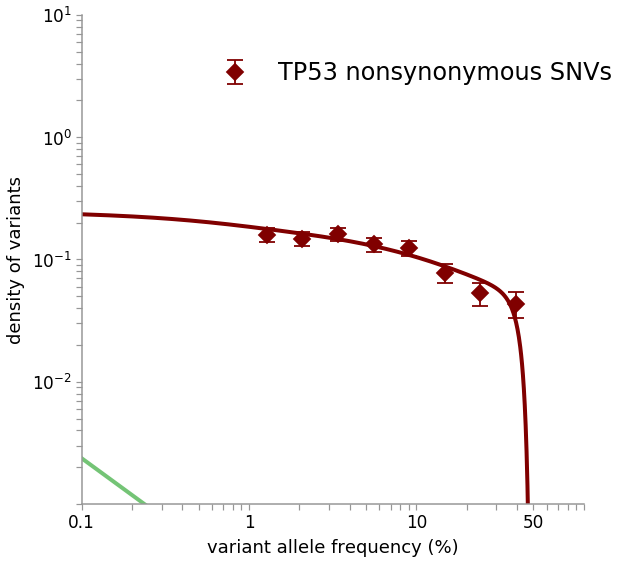

In [44]:
# plot

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(9,9))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


plot_log_hist_data_for_plot_not_rescaled(TP53_nonsyn_VAF_trimmed, n_sample, n_bins_TP53, lmin, lmax, 'TP53 nonsynonymous SNVs', 'D',\
                                          12, 'maroon')
# no need to rescale because nonsynonymous VAF densities


density_beneficial_TP53=[]
density_beneficial_TP53_log=[]
for logfreq in log_VAF:
    
    driver_contrib = driver_contrib_single_s_driver(logfreq,  u_TP53_ben, N_tau_fitted, s_TP53)
            
    nonsyn_haploid_passenger_rate_TP53 = Martincorena_TP53_nonsyn_rate - u_TP53_ben
    if nonsyn_haploid_passenger_rate_TP53 > 0:

        HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_TP53_ben, nonsyn_haploid_passenger_rate_TP53, N_tau_fitted, s_TP53)

    else:
#         print('HH_contrib = 0')
        HH_contrib = 0

    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix)

    predicted_density = driver_contrib + HH_contrib + dev_contrib

    density_beneficial_TP53_log.append(np.log(predicted_density))


ax1.plot(log_VAF, density_beneficial_TP53_log, zorder=0, color='maroon', lw=4)

density_dev_nonsyn_TP53_log=[]
for logfreq in log_VAF:
    
    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix)
    density_dev_nonsyn_TP53_log.append(np.log(dev_contrib))

ax1.plot(log_VAF, density_dev_nonsyn_TP53_log, c = green3, lw = 4)

ax1.legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize= 12*2)

ax1.set_ylim(np.log(10**-3), np.log(10))

print('u_TP53_ben', u_TP53_ben, 's_TP53', s_TP53)

# plt.savefig('TP53_gene_oesophagous_nonsyn_fitted_VAF_nonsyn_HH_dev_contrib.pdf', bbox_inches='tight')


In [24]:
def confidence_interval_95_1D(Ntau_list, z1_unnormalized, gene_color):

    cumulative_prob=0.0
    total_probability = sum(z1_unnormalized)

    Ntau_95_range=[]
    Ntau_range_probs = []
    Ntau_cumulative_prob_95_range=[]
    Ntau_cumulative_prob_above_50_range = []
    for i in range(len(z1_unnormalized)):
        Ntau=Ntau_list[i]
        p=z1_unnormalized[i]/total_probability
#         print(p)
        Ntau_range_probs.append((Ntau,p))
        cumulative_prob=cumulative_prob+p
        print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            Ntau_95_range.append(Ntau)
            Ntau_cumulative_prob_95_range.append((Ntau, p, cumulative_prob))
        if cumulative_prob>0.5:
            Ntau_cumulative_prob_above_50_range.append(Ntau)
    
#     print(s_cumulative_prob_95_range)
            
    min_Ntau=min(Ntau_95_range)
    max_Ntau=max(Ntau_95_range)
    
    
    print('95% confidence interval for Ntau: lower =', min_Ntau)
    print('95% confidence interval for Ntau: upper =', max_Ntau)
    
    #plotting the most likely s
#     xmax= np.unravel_index(np.argmax(z1_unnormalized), z1_HH.shape)
#     list_of_index=list(xmax)
#     index=list_of_index[0]
#     Ntau_mle = Ntau_list[index]
    Ntau_mle = min(Ntau_cumulative_prob_above_50_range)

    #plot distribution
    Ntau_list = []
    probs_list = []
    for (Ntau, probs) in Ntau_range_probs:
        Ntau_list.append(Ntau)
        probs_list.append(probs)

    ax1.plot(Ntau_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_Ntau, min_Ntau], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_Ntau, max_Ntau], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([Ntau_mle, Ntau_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)
    print('Ntau_mle', Ntau_mle)
    
    # Axis labels
    ax1.set_xlabel(r'$N\tau \ (\times 10^{3})$', fontsize = 20, labelpad = 10, fontweight = 'medium')
    ax1.set_ylabel('probability', fontsize = 20, labelpad = 10, fontweight = 'medium')
    
    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.01))

    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)
    

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_Ntau, max_Ntau

list_of_negative_squared_distance_N_tau [-44.86873251249426, -44.30259886718952, -43.7642426817821, -43.252779424662585, -42.76735756746032, -42.307157109578135, -41.87138818092873, -41.459289718050584, -41.07012820912252, -40.703196503707545, -40.35781268334498, -40.03331898937484, -39.72908080462491, -39.4444856858155, -39.17894244374868, -38.931880268540205, -38.702747897333325, -38.49101282209929, -38.29616053528304, -38.11769381119646, -37.95513202119307, -37.80801048078261, -37.675879826957235, -37.55830542410871, -37.45486679701435, -37.365157089462635, -37.288782547174584, -37.225362023758215, -37.17452650850715, -37.13591867492566, -37.109192448926436, -37.09401259570914, -37.09005432438468, -37.09700290946306, -37.11455332837345, -37.14240991423094, -37.180286023108714, -37.22790371511562, -37.284993448617115, -37.351293786974004, -37.42655111720745, -37.51051938002994, -37.602959810712946, -37.703640690288594, -37.81233710661079, -37.9288307248247, -38.052909566818, -38.1843

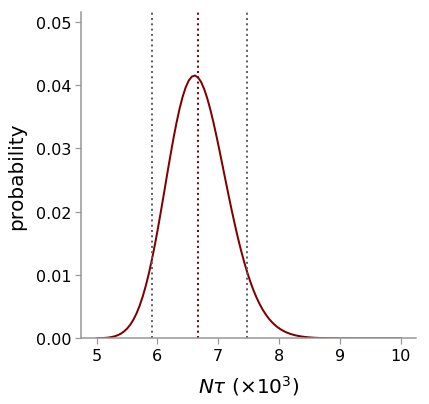

In [37]:
# Plot the distributions (longer run)
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(6, 6))
# gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])
# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])
# gs.update(wspace=0.4)
num_pts = 10
s_list=np.linspace(0.1,0.12, num_pts)
mut_list=np.linspace(0.8*10**-5, 2*10**-5, num_pts)
N_tau_list = np.linspace(5*10**3, 1.0*10**4, 100)

# MLE for increased mutation rate
# list_of_negative_squared_distance_N_tau = []
# for N_tau in N_tau_list:
#     squared_distance_N_tau = 0
#     for fitness in s_list:
#         for mut_rate in mut_list:
#             squared_distance = squared_distance_calculation_discrete_nonsyn_driver_HH_dev_1D_cumulative([N_tau], mut_rate, fitness,\
#                               VAF_info_TP53_cumulative, Martincorena_TP53_nonsyn_rate,\
#                             Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix, lmin, lmax, n_bins_TP53, n_sample)
#             squared_distance_N_tau = squared_distance_N_tau + squared_distance
     
#     list_of_negative_squared_distance_N_tau.append(-squared_distance_N_tau/(num_pts*num_pts))

print('list_of_negative_squared_distance_N_tau', list_of_negative_squared_distance_N_tau)

## S vs MUT
# Convert square distances to log probability
# print('list_of_negative_squared_distance_N_tau',list_of_negative_squared_distance_N_tau)
z_max = max(list_of_negative_squared_distance_N_tau)
# print('z_max', z_max)
probability_N_tau = np.exp(list_of_negative_squared_distance_N_tau-(z_max))
# print('probability_N_tau',probability_N_tau)


ax1, min_s, max_s = confidence_interval_95_1D(N_tau_list, probability_N_tau, 'maroon')


x_major_ticks=[5*10**3, 6*10**3, 7*10**3, 8*10**3, 9*10**3, 10*10**3]
x_major_tick_labels=['5', '6', '7', '8','9', '10' ]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)

# plt.savefig('95_CI_N_tau_TP53.pdf', bbox_inches='tight')

plt.show()

In [35]:
# Stored results

list_of_negative_squared_distance_N_tau = [-44.86873251249426, -44.30259886718952, -43.7642426817821, -43.252779424662585, -42.76735756746032, -42.307157109578135, -41.87138818092873, -41.459289718050584, -41.07012820912252, -40.703196503707545, -40.35781268334498, -40.03331898937484, -39.72908080462491, -39.4444856858155, -39.17894244374868, -38.931880268540205, -38.702747897333325, -38.49101282209929, -38.29616053528304, -38.11769381119646, -37.95513202119307, -37.80801048078261, -37.675879826957235, -37.55830542410871, -37.45486679701435, -37.365157089462635, -37.288782547174584, -37.225362023758215, -37.17452650850715, -37.13591867492566, -37.109192448926436, -37.09401259570914, -37.09005432438468, -37.09700290946306, -37.11455332837345, -37.14240991423094, -37.180286023108714, -37.22790371511562, -37.284993448617115, -37.351293786974004, -37.42655111720745, -37.51051938002994, -37.602959810712946, -37.703640690288594, -37.81233710661079, -37.9288307248247, -38.052909566818, -38.18436779924828, -38.32300552976332, -38.46862861104856, -38.62104845235611, -38.78008183818681, -38.94555075381224, -39.11728221734043, -39.29510811804304, -39.47886506067518, -39.668394215533446, -39.86354117400807, -40.06415580939924, -40.27009214277633, -40.48120821367089, -40.697365955403505, -40.91843107485392, -41.144272936493074, -41.37476445050372, -41.609781964824585, -41.84920516096071, -42.09291695340904, -42.340803392556275, -42.592753570911334, -42.848659532542115, -43.10841618559052, -43.37192121774708, -43.63907501457022, -43.909780580541, -44.183943462748964, -44.461471677108705, -44.74227563701187, -45.02626808432245, -45.31336402262813, -45.6034806526634, -45.896537309824, -46.192455403695575, -46.4911583595231, -46.79257156154949, -47.09662229815601, -47.403239708739484, -47.712354732263606, -48.02390005742427, -48.33781007437201, -48.65402082793601, -48.97246997229666, -49.29309672705573, -49.61584183465611, -49.94064751910307, -50.26745744594269, -50.59621668345391, -50.92687166501304, -51.25937015258961, -51.59366120133638]

print('list_of_negative_squared_distance_N_tau', list_of_negative_squared_distance_N_tau)

list_of_negative_squared_distance_N_tau [-44.86873251249426, -44.30259886718952, -43.7642426817821, -43.252779424662585, -42.76735756746032, -42.307157109578135, -41.87138818092873, -41.459289718050584, -41.07012820912252, -40.703196503707545, -40.35781268334498, -40.03331898937484, -39.72908080462491, -39.4444856858155, -39.17894244374868, -38.931880268540205, -38.702747897333325, -38.49101282209929, -38.29616053528304, -38.11769381119646, -37.95513202119307, -37.80801048078261, -37.675879826957235, -37.55830542410871, -37.45486679701435, -37.365157089462635, -37.288782547174584, -37.225362023758215, -37.17452650850715, -37.13591867492566, -37.109192448926436, -37.09401259570914, -37.09005432438468, -37.09700290946306, -37.11455332837345, -37.14240991423094, -37.180286023108714, -37.22790371511562, -37.284993448617115, -37.351293786974004, -37.42655111720745, -37.51051938002994, -37.602959810712946, -37.703640690288594, -37.81233710661079, -37.9288307248247, -38.052909566818, -38.1843

In [27]:
N_tau_fitted = 7790.895048199087

## Inferring DFE ('Discrete method') from nonsynonymous VAF spectra based on N $\tau$ value 

squared_distance_s [[462.53371146 450.56311768 438.88809033 ...  23.64816804  23.01506088
   22.41446575]
 [451.86441912 440.01560198 428.46151868 ...  21.7708041   21.19752867
   20.6562491 ]
 [441.48575838 429.75692628 418.32200692 ...  20.0541675   19.53983851
   19.05699682]
 ...
 [ 62.26349738  57.63086089  53.24260895 ... 152.41651381 155.38202037
  158.34898215]
 [ 61.22749374  56.64457914  52.30569728 ... 154.96164028 157.95149832
  160.94260137]
 [ 60.22006603  55.68657178  51.39676054 ... 157.51359144 160.52765298
  163.54275061]]
95% confidence interval for s: lower s = 0.09666666666666666
95% confidence interval for s: upper s = 0.10585858585858586
squared_distance_mut [[462.53371146 451.86441912 441.48575838 ...  62.26349738  61.22749374
   60.22006603]
 [450.56311768 440.01560198 429.75692628 ...  57.63086089  56.64457914
   55.68657178]
 [438.88809033 428.46151868 418.32200692 ...  53.24260895  52.30569728
   51.39676054]
 ...
 [ 23.64816804  21.7708041   20.0541675  ...

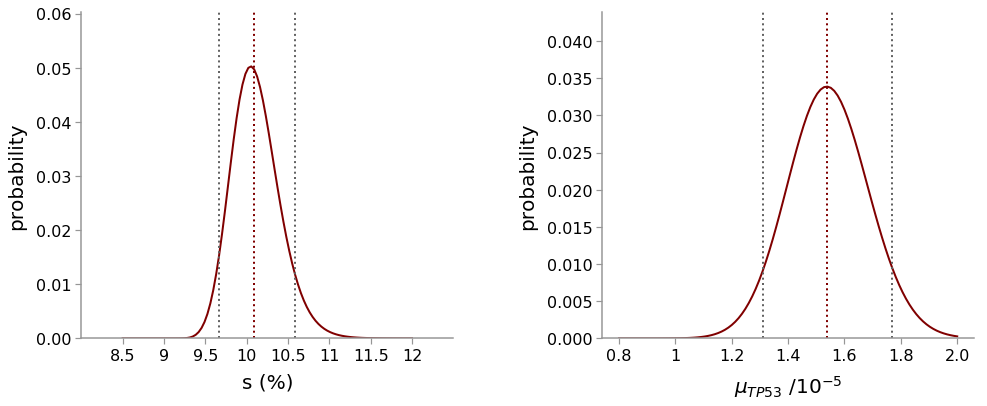

In [29]:
# Plot the distributions
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize=(16, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
gs.update(wspace=0.4)

s_list=np.linspace(0.085,0.12,100)
mut_list=np.linspace(0.8*10**-5, 2*10**-5, 100)



#MLE for increased mutation rate

squared_distance_s = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                                  N_tau_fitted, VAF_info_TP53_cumulative, Martincorena_TP53_nonsyn_rate,\
                                Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix, lmin, lmax, n_bins_TP53, n_sample) for s in s_list] for mut in mut_list])
print('squared_distance_s', squared_distance_s)

## S vs MUT
# Plot the density map using nearest-neighbor interpolation
logProbs_s = (-squared_distance_s)
max_x, max_y = np.unravel_index(np.argmax(logProbs_s), logProbs_s.shape)
z_max = logProbs_s[max_x, max_y]
z1_s = np.exp(logProbs_s-(z_max))
# print('z1_s', z1_s)


mg_s, mg_mut = np.meshgrid(s_list, mut_list)
ax1, min_s, max_s = confidence_interval_95_s(mg_s, mg_mut, z1_s, 'maroon')

x_major_ticks=[8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]
x_major_tick_labels=['8.5', '9', '9.5','10', '10.5', '11', '11.5' ,'12']
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)
# ax1.set_xlim(10, 12)

squared_distance_mut = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                                  N_tau_fitted, VAF_info_TP53_cumulative, Martincorena_TP53_nonsyn_rate,\
                                Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix, lmin, lmax, n_bins_TP53, n_sample) for mut in mut_list] for s in s_list])
print('squared_distance_mut', squared_distance_mut)

logProbs_mut = (-squared_distance_mut)
max_x, max_y = np.unravel_index(np.argmax(logProbs_mut), logProbs_mut.shape)
z_max = logProbs_mut[max_x, max_y]
z1_mut = np.exp(logProbs_mut-(z_max))

mg_mut, mg_s = np.meshgrid(mut_list, s_list)
ax2, min_mut, max_mut = confidence_interval_95_mut(mg_mut, mg_s, z1_mut, 'maroon', '${\mu_{TP53}}\ / 10^{-5}$')

# x_major_ticks=[0.5*10**-5, 10**-5, 1.5*10**-5, 2*10**-5, 2.5*10**-5, 3*10**-5, 3.5*10**-5, 4*10**-5, 4.5*10**-5]
# x_major_tick_labels=['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4','4.5' ]
x_major_ticks=[ 0.8*10**-5, 10**-5, 1.2*10**-5, 1.4*10**-5,  1.6*10**-5, 1.8*10**-5, 2.0*10**-5]
x_major_tick_labels=['0.8','1', '1.2', '1.4',  '1.6', '1.8' , '2.0']
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels)
# ax2.set_xlim(10**-5,1.5*10**-5)

# plt.savefig('CI_interval_TP53_discrete_with_HH_dev_contrib_3x_dev_rate.pdf', bbox_inches='tight')

import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

plt.show()

In [33]:
# trim NOTCH1 data

n_bins_NOTCH1=8

trimmed_fmax_NOTCH1=0.5
trimmed_fmin_NOTCH1=0.01
trimmed_lmin_NOTCH1=np.log(trimmed_fmin_NOTCH1)
trimmed_lmax_NOTCH1=np.log(trimmed_fmax_NOTCH1)
lmin_NOTCH1=trimmed_lmin_NOTCH1
lmax_NOTCH1=trimmed_lmax_NOTCH1

print('trimmed_fmax', trimmed_fmax_NOTCH1, 'trimmed_fmin', trimmed_fmin_NOTCH1)
print('lmin_syn', lmin_NOTCH1, 'lmax_syn', lmax_NOTCH1)
print('i.e. fmin', np.exp(lmin_NOTCH1), 'fmax', np.exp(lmax_NOTCH1))

NOTCH1_nonsyn_VAF_trimmed=[]
for i in NOTCH1_nonsyn_SNV_VAF:
    if trimmed_fmin_NOTCH1 < i < trimmed_fmax_NOTCH1:
        NOTCH1_nonsyn_VAF_trimmed.append(i)
print('There are', len(NOTCH1_nonsyn_VAF_trimmed),'variants after data trimming')

VAF_info_NOTCH1 = not_rescaled_VAF_densities_list(NOTCH1_nonsyn_VAF_trimmed, n_sample, n_bins_NOTCH1, lmin_NOTCH1, lmax_NOTCH1)
# not rescaled because this is nonsynonymous VAF density
VAF_info_NOTCH1_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(NOTCH1_nonsyn_VAF_trimmed, n_sample, \
                                                                                        n_bins_NOTCH1, lmin_NOTCH1, lmax_NOTCH1)

VAF_info_NOTCH1_cumulative_shift_left = not_rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(NOTCH1_nonsyn_VAF_trimmed, n_sample,\
                                                                                        n_bins_NOTCH1, lmin, lmax)

print('number of bins set:', n_bins_NOTCH1)
print('number of nonempty bins:', len(VAF_info_NOTCH1))


trimmed_fmax 0.5 trimmed_fmin 0.01
lmin_syn -4.605170185988091 lmax_syn -0.6931471805599453
i.e. fmin 0.010000000000000004 fmax 0.5
There are 1035 variants after data trimming
bin_centres 7
bin_centres_without_zero 7
number of bins set: 8
number of nonempty bins: 7


In [34]:
# fit NOTCH1 with 2 parameters:  beneficial mut rate, s
# estimating parameters
import pyensembl
from pyensembl import EnsemblRelease

# release 77 uses human reference genome GRCh38
# reference_assemblies={'GRCh38': (76, 97), 'GRCh37': (55, 75)}
release_76 = EnsemblRelease(76)
release_75 = EnsemblRelease(75)


canonical_CCDS_length = 0

list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name('NOTCH1')
#         print(list_of_transcripts_of_this_gene)
# print(release_76.transcript_by_id('ENST00000264709'))
for ID in list_of_transcripts_of_this_gene:

    retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
#         print(retrieve_transcript_by_ID)
    try:
        transcript_id = retrieve_transcript_by_ID.transcript_id
        transcript_name = retrieve_transcript_by_ID.transcript_name
        gene_id = retrieve_transcript_by_ID.gene_id
        biotype = retrieve_transcript_by_ID.biotype
        contig = retrieve_transcript_by_ID.contig
        start = retrieve_transcript_by_ID.start
        end = retrieve_transcript_by_ID.end
        strand = retrieve_transcript_by_ID.strand
        retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                              contig=contig, start=start, end=end, strand=strand, genome= release_75)

        # CCDS of this transcript
        retrieved_CCDS = retrieve_Transcript.coding_sequence
#             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
        if canonical_CCDS_length < len(retrieved_CCDS):
            canonical_CCDS_length = len(retrieved_CCDS)


    except:
        pass
#             print('\n', ID, 'does not have complete CCDS information')


#         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

if canonical_CCDS_length == 0:
    print('\n Gene is non-coding.')



CCDS_of_NOTCH1_genes = canonical_CCDS_length
print('CCDS of NOTCH1 is', CCDS_of_NOTCH1_genes,'bp long')


Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_NOTCH1_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
print('developmental mutation rate per cell doubling per haploid', Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix) 

# This estimate is different from blood
nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
Martincorena_NOTCH1_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_NOTCH1_genes
    
    
import scipy
print('N_tau fixed at:', N_tau_fitted)

u_NOTCH1_guess=10**-5
s_guess=0.11


initial_guess=[u_NOTCH1_guess, s_guess]
outcome=scipy.optimize.minimize(squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative, initial_guess, \
                                args=(N_tau_fitted, VAF_info_NOTCH1_cumulative, Martincorena_NOTCH1_nonsyn_rate, Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                      lmin_NOTCH1, lmax_NOTCH1, n_bins_NOTCH1, n_sample), method='TNC', \
                                options={'maxfev':10000000, 'maxiter':1000000},\
                                bounds=[(None, None),(None, None)])


print('Success of fitting outcome is', outcome.success)

print('best-fit values for u_NOTCH1, s:',  outcome.x)

s_NOTCH1 = outcome.x[1]
u_NOTCH1_ben = outcome.x[0]



INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.ncrna.fa.gz.pickle
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: OptimizeWarning: Unknown solver options: maxfev


CCDS of NOTCH1 is 7668 bp long
developmental mutation rate per cell doubling per haploid 1.0657642963342315e-05
N_tau fixed at: 7790.895048199087
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [3.52253748e-05 1.09899679e-01]


squared_distance_s [[1113.05213922 1074.28083236 1036.64135977 ...   43.80511643
    46.6506961    49.59710088]
 [1100.38899574 1061.8134662  1024.36841454 ...   45.52615523
    48.47504921   51.52383636]
 [1087.8876886  1049.50677848 1012.2549958  ...   47.32283961
    50.37442635   53.52497985]
 ...
 [ 393.53301136  369.80556258  347.10047649 ...  426.93386476
   437.69401854  448.48353587]
 [ 389.70969205  366.10671056  343.52514846 ...  432.21458457
   443.04005975  453.89430902]
 [ 385.93530357  362.45632204  339.99781962 ...  437.50977445
   448.40032339  459.31905915]]
95% confidence interval for s: lower s = 0.10626262626262627
95% confidence interval for s: upper s = 0.11085858585858585
squared_distance_mut [[1113.05213922 1100.38899574 1087.8876886  ...  393.53301136
   389.70969205  385.93530357]
 [1074.28083236 1061.8134662  1049.50677848 ...  369.80556258
   366.10671056  362.45632204]
 [1036.64135977 1024.36841454 1012.2549958  ...  347.10047649
   343.52514846  339.99781

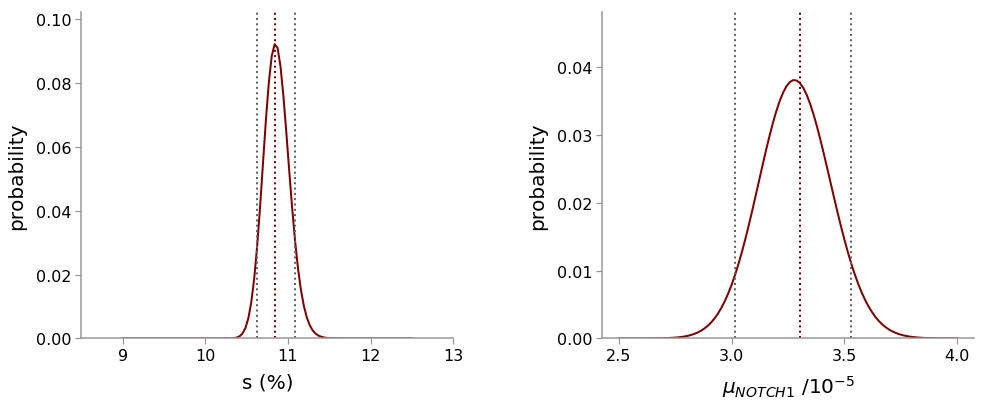

In [30]:
# Plot the distributions
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize=(16, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
gs.update(wspace=0.4)

s_list=np.linspace(0.09,0.125, 100)
mut_list=np.linspace(2.5*10**-5, 4.0*10**-5, 100)

#MLE for increased mutation rate

squared_distance_s = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                        N_tau_fitted, VAF_info_NOTCH1_cumulative, Martincorena_NOTCH1_nonsyn_rate, Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                     lmin, lmax, n_bins_NOTCH1, n_sample) for s in s_list] for mut in mut_list])
print('squared_distance_s', squared_distance_s)

## S vs MUT
# Plot the density map using nearest-neighbor interpolation
logProbs_s = (-squared_distance_s)
max_x, max_y = np.unravel_index(np.argmax(logProbs_s), logProbs_s.shape)
z_max = logProbs_s[max_x, max_y]
z1_s = np.exp(logProbs_s-(z_max))
# print('z1_s', z1_s)


mg_s, mg_mut = np.meshgrid(s_list, mut_list)
ax1, min_s, max_s = confidence_interval_95_s(mg_s, mg_mut, z1_s, 'maroon')

# x_major_ticks=[ 9, 10, 11, 12]
# x_major_tick_labels=['9.0', '10.0', '11.0', '12.0' ]
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)
# ax1.set_xlim(11,11.4)

squared_distance_mut = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                        N_tau_fitted, VAF_info_NOTCH1_cumulative, Martincorena_NOTCH1_nonsyn_rate, Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                     lmin, lmax, n_bins_NOTCH1, n_sample) for mut in mut_list] for s in s_list])
print('squared_distance_mut', squared_distance_mut)

logProbs_mut = (-squared_distance_mut)
max_x, max_y = np.unravel_index(np.argmax(logProbs_mut), logProbs_mut.shape)
z_max = logProbs_mut[max_x, max_y]
z1_mut = np.exp(logProbs_mut-(z_max))

mg_mut, mg_s = np.meshgrid(mut_list, s_list)
ax2, min_mut, max_mut = confidence_interval_95_mut(mg_mut, mg_s, z1_mut, 'maroon', '${\mu_{NOTCH1}}\ /10^{-5}$')

x_major_ticks=[2.5*10**-5, 3.0*10**-5, 3.5*10**-5, 4.0*10**-5]
x_major_tick_labels=['2.5', '3.0', '3.5', '4.0']
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels)
# ax2.set_xlim( 3*10**-5,  3.5*10**-5)

# plt.savefig('CI_interval_NOTCH1_discrete_with_HH_dev_contrib_3x_dev_rate.pdf', bbox_inches='tight')

plt.show()

In [35]:
# trim NOTCH2 data

n_bins_NOTCH2=8

trimmed_fmax_NOTCH2=0.5
trimmed_fmin_NOTCH2=0.01
trimmed_lmin_NOTCH2=np.log(trimmed_fmin_NOTCH2)
trimmed_lmax_NOTCH2=np.log(trimmed_fmax_NOTCH2)
lmin_NOTCH2=trimmed_lmin_NOTCH2
lmax_NOTCH2=trimmed_lmax_NOTCH2

print('trimmed_fmax', trimmed_fmax_NOTCH2, 'trimmed_fmin', trimmed_fmin_NOTCH2)
print('lmin_syn', lmin_NOTCH2, 'lmax_syn', lmax_NOTCH2)
print('i.e. fmin', np.exp(lmin_NOTCH2), 'fmax', np.exp(lmax_NOTCH2))

NOTCH2_nonsyn_VAF_trimmed=[]
for i in NOTCH2_nonsyn_SNV_VAF:
    if trimmed_fmin_NOTCH2 < i < trimmed_fmax_NOTCH2:
        NOTCH2_nonsyn_VAF_trimmed.append(i)
print('There are', len(NOTCH2_nonsyn_VAF_trimmed),'variants after data trimming')

VAF_info_NOTCH2 = not_rescaled_VAF_densities_list(NOTCH2_nonsyn_VAF_trimmed, n_sample, n_bins_NOTCH2, lmin_NOTCH2, lmax_NOTCH2)
# not rescaled because this is nonsynonymous VAF density
VAF_info_NOTCH2_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(NOTCH2_nonsyn_VAF_trimmed, n_sample, \
                                                                                        n_bins_NOTCH2, lmin_NOTCH2, lmax_NOTCH2)

VAF_info_NOTCH2_cumulative_shift_left = not_rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(NOTCH2_nonsyn_VAF_trimmed, n_sample,\
                                                                                        n_bins_NOTCH2, lmin, lmax)

print('number of bins set:', n_bins_NOTCH2)
print('number of nonempty bins:', len(VAF_info_NOTCH2))


trimmed_fmax 0.5 trimmed_fmin 0.01
lmin_syn -4.605170185988091 lmax_syn -0.6931471805599453
i.e. fmin 0.010000000000000004 fmax 0.5
There are 188 variants after data trimming
bin_centres 7
bin_centres_without_zero 6
number of bins set: 8
number of nonempty bins: 6


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:176: RuntimeWarning: divide by zero encountered in log


In [36]:
# fit NOTCH2 with 2 parameters:  beneficial mut rate, s
# estimating parameters
import pyensembl
from pyensembl import EnsemblRelease

# release 77 uses human reference genome GRCh38
# reference_assemblies={'GRCh38': (76, 97), 'GRCh37': (55, 75)}
release_76 = EnsemblRelease(76)
release_75 = EnsemblRelease(75)


canonical_CCDS_length = 0

list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name('NOTCH1')
#         print(list_of_transcripts_of_this_gene)
# print(release_76.transcript_by_id('ENST00000264709'))
for ID in list_of_transcripts_of_this_gene:

    retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
#         print(retrieve_transcript_by_ID)
    try:
        transcript_id = retrieve_transcript_by_ID.transcript_id
        transcript_name = retrieve_transcript_by_ID.transcript_name
        gene_id = retrieve_transcript_by_ID.gene_id
        biotype = retrieve_transcript_by_ID.biotype
        contig = retrieve_transcript_by_ID.contig
        start = retrieve_transcript_by_ID.start
        end = retrieve_transcript_by_ID.end
        strand = retrieve_transcript_by_ID.strand
        retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                              contig=contig, start=start, end=end, strand=strand, genome= release_75)

        # CCDS of this transcript
        retrieved_CCDS = retrieve_Transcript.coding_sequence
#             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
        if canonical_CCDS_length < len(retrieved_CCDS):
            canonical_CCDS_length = len(retrieved_CCDS)


    except:
        pass
#             print('\n', ID, 'does not have complete CCDS information')


#         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

if canonical_CCDS_length == 0:
    print('\n Gene is non-coding.')



CCDS_of_NOTCH2_genes = canonical_CCDS_length
print('CCDS of NOTCH2 is', CCDS_of_NOTCH2_genes,'bp long')


Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_NOTCH2_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
print('developmental mutation rate per cell doubling per haploid', Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix) 

# This estimate is different from blood
nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
Martincorena_NOTCH2_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_NOTCH2_genes
    
    
import scipy
print('N_tau fixed at:', N_tau_fitted)

u_NOTCH2_guess=10**-5
s_guess=0.11


initial_guess=[u_NOTCH2_guess, s_guess]
outcome=scipy.optimize.minimize(squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative, initial_guess, \
                                args=(N_tau_fitted, VAF_info_NOTCH2_cumulative, Martincorena_NOTCH2_nonsyn_rate, Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                      lmin_NOTCH2, lmax_NOTCH2, n_bins_NOTCH2, n_sample), method='Nelder-Mead', \
                                options={'maxfev':10000000, 'maxiter':1000000},\
                                bounds=[(None, None),(None, None)])


print('Success of fitting outcome is', outcome.success)

print('best-fit values for u_NOTCH2, s:',  outcome.x)

s_NOTCH2 = outcome.x[1]
u_NOTCH2_ben = outcome.x[0]



INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.ncrna.fa.gz.pickle


CCDS of NOTCH2 is 7668 bp long
developmental mutation rate per cell doubling per haploid 1.0657642963342315e-05
N_tau fixed at: 7790.895048199087
Success of fitting outcome is True
best-fit values for u_NOTCH2, s: [1.52059098e-05 6.85795698e-02]


squared_distance_s [[458.74386355 447.25811361 435.92907487 ...  16.01133032  15.45446308
   14.93129372]
 [447.61668882 436.2347215  425.01179806 ...  14.23545683  13.74821768
   13.29428797]
 [436.93723325 425.65745507 414.538957   ...  12.67566944  12.25609505
   11.86945173]
 ...
 [ 97.06404649  91.52905403  86.21345825 ... 113.30823554 115.98318546
  118.6731612 ]
 [ 95.96490635  90.4681366   85.1907742  ... 114.88386681 117.57696618
  120.28498409]
 [ 94.8847871   89.42598507  84.18659624 ... 116.4588626  119.16997344
  121.89589632]]
95% confidence interval for s: lower s = 0.06737373737373738
95% confidence interval for s: upper s = 0.0794949494949495
squared_distance_mut [[458.74386355 447.61668882 436.93723325 ...  97.06404649  95.96490635
   94.8847871 ]
 [447.25811361 436.2347215  425.65745507 ...  91.52905403  90.4681366
   89.42598507]
 [435.92907487 425.01179806 414.538957   ...  86.21345825  85.1907742
   84.18659624]
 ...
 [ 16.01133032  14.23545683  12.67566944 ... 11

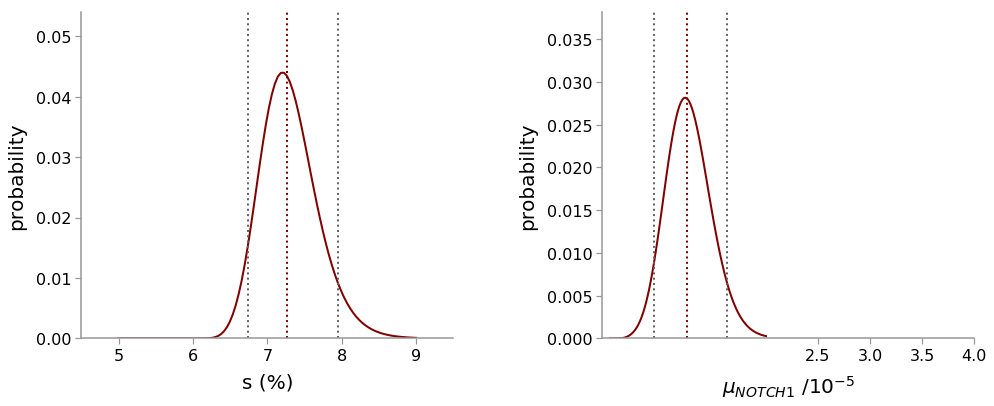

In [201]:
# Plot the distributions
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex = True, figsize=(16, 6))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
gs.update(wspace=0.4)

s_list=np.linspace(0.05,0.09, 100)
mut_list=np.linspace(0.5*10**-5, 2.0*10**-5, 100)

#MLE for increased mutation rate

squared_distance_s = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                        N_tau_fitted, VAF_info_NOTCH2_cumulative, Martincorena_NOTCH2_nonsyn_rate, Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                     lmin, lmax, n_bins_NOTCH2, n_sample) for s in s_list] for mut in mut_list])
print('squared_distance_s', squared_distance_s)

## S vs MUT
# Plot the density map using nearest-neighbor interpolation
logProbs_s = (-squared_distance_s)
max_x, max_y = np.unravel_index(np.argmax(logProbs_s), logProbs_s.shape)
z_max = logProbs_s[max_x, max_y]
z1_s = np.exp(logProbs_s-(z_max))
# print('z1_s', z1_s)


mg_s, mg_mut = np.meshgrid(s_list, mut_list)
ax1, min_s, max_s = confidence_interval_95_s(mg_s, mg_mut, z1_s, 'maroon')

# x_major_ticks=[ 9, 10, 11, 12]
# x_major_tick_labels=['9.0', '10.0', '11.0', '12.0' ]
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)
# ax1.set_xlim(11,11.4)

squared_distance_mut = np.array([[squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative([mut, s],\
                        N_tau_fitted, VAF_info_NOTCH2_cumulative, Martincorena_NOTCH2_nonsyn_rate, Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                     lmin, lmax, n_bins_NOTCH2, n_sample) for mut in mut_list] for s in s_list])
print('squared_distance_mut', squared_distance_mut)

logProbs_mut = (-squared_distance_mut)
max_x, max_y = np.unravel_index(np.argmax(logProbs_mut), logProbs_mut.shape)
z_max = logProbs_mut[max_x, max_y]
z1_mut = np.exp(logProbs_mut-(z_max))

mg_mut, mg_s = np.meshgrid(mut_list, s_list)
ax2, min_mut, max_mut = confidence_interval_95_mut(mg_mut, mg_s, z1_mut, 'maroon', '${\mu_{NOTCH1}}\ /10^{-5}$')

x_major_ticks=[2.5*10**-5, 3.0*10**-5, 3.5*10**-5, 4.0*10**-5]
x_major_tick_labels=['2.5', '3.0', '3.5', '4.0']
ax2.set_xticks(x_major_ticks)
ax2.set_xticklabels(x_major_tick_labels)
# ax2.set_xlim( 3*10**-5,  3.5*10**-5)

# plt.savefig('CI_interval_NOTCH2_discrete_with_HH_dev_contrib_3x_dev_rate.pdf', bbox_inches='tight')

plt.show()

Applying the `Discrete method' to all genes on the panel

In [21]:
def best_fitting_driver_VAF(gene, gene_nonsyn_SNV_VAF):
    
    # set up parameters
    canonical_CCDS_length = 0

    list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name(gene)
    #         print(list_of_transcripts_of_this_gene)
    # print(release_76.transcript_by_id('ENST00000264709'))
    for ID in list_of_transcripts_of_this_gene:

        retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
    #         print(retrieve_transcript_by_ID)
        try:
            transcript_id = retrieve_transcript_by_ID.transcript_id
            transcript_name = retrieve_transcript_by_ID.transcript_name
            gene_id = retrieve_transcript_by_ID.gene_id
            biotype = retrieve_transcript_by_ID.biotype
            contig = retrieve_transcript_by_ID.contig
            start = retrieve_transcript_by_ID.start
            end = retrieve_transcript_by_ID.end
            strand = retrieve_transcript_by_ID.strand
            retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                                  contig=contig, start=start, end=end, strand=strand, genome= release_75)

            # CCDS of this transcript
            retrieved_CCDS = retrieve_Transcript.coding_sequence
    #             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
            if canonical_CCDS_length < len(retrieved_CCDS):
                canonical_CCDS_length = len(retrieved_CCDS)


        except:
            pass
    #             print('\n', ID, 'does not have complete CCDS information')


    #         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

    if canonical_CCDS_length == 0:
        print('\n Gene is non-coding.')



    CCDS_of_this_gene = canonical_CCDS_length
    print('CCDS is', CCDS_of_this_gene,'bp long')

    
    Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_this_gene/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
    print('developmental mutation rate per cell doubling per haploid', Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix) 

    # This estimate is different from blood
    nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
    Martincorena_this_gene_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_this_gene

    #   trimming
    n_bins=8
    trimmed_fmax=0.5
    trimmed_fmin=0.01
    trimmed_lmin=np.log(trimmed_fmin)
    trimmed_lmax=np.log(trimmed_fmax)
    lmin=trimmed_lmin
    lmax=trimmed_lmax

    print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)
    print('lmin_syn', lmin, 'lmax_syn', lmax)
    print('i.e. fmin', np.exp(lmin), 'fmax', np.exp(lmax))

    gene_nonsyn_VAF_trimmed=[]
    for i in gene_nonsyn_SNV_VAF:
        if trimmed_fmin < i < trimmed_fmax:
            gene_nonsyn_VAF_trimmed.append(i)
    print('There are', len(gene_nonsyn_VAF_trimmed),'variants after data trimming')

    VAF_info_gene = not_rescaled_VAF_densities_list(gene_nonsyn_VAF_trimmed, n_sample, n_bins, lmin, lmax)
    # not rescaled because this is nonsynonymous VAF density
    VAF_info_gene_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(gene_nonsyn_VAF_trimmed, n_sample, \
                                                                                            n_bins, lmin, lmax)
    VAF_info_gene_cumulative_without_inf = []    #remove the densities for the VAF bins for which there were no densities
    for i in VAF_info_gene_cumulative:
        if i[1] != -(float('inf')):
            VAF_info_gene_cumulative_without_inf.append(i)

    print('number of bins set:', n_bins)
    print('number of nonempty bins:', len(VAF_info_gene))


    #     fitting
    import scipy
    print('N_tau fixed at:', N_tau_fitted)

    u_guess=10**-5
    s_guess=0.11


    initial_guess=[u_guess, s_guess]
    outcome=scipy.optimize.minimize(squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative, initial_guess, \
                                    args=(N_tau_fitted, VAF_info_gene_cumulative, Martincorena_this_gene_nonsyn_rate, Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                          lmin, lmax, n_bins, n_sample), method='Nelder-Mead', \
                                    options={'maxfev':10000000, 'maxiter':1000000},\
                                    bounds=[(None, None),(None, None)])


    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for u_NOTCH1, s:',  outcome.x)
    
    return outcome

In [22]:
def best_fitting_driver_VAF_print_less(gene, gene_nonsyn_SNV_VAF):
    
    # set up parameters
    canonical_CCDS_length = 0

    list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name(gene)
    #         print(list_of_transcripts_of_this_gene)
    # print(release_76.transcript_by_id('ENST00000264709'))
    for ID in list_of_transcripts_of_this_gene:

        retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
    #         print(retrieve_transcript_by_ID)
        try:
            transcript_id = retrieve_transcript_by_ID.transcript_id
            transcript_name = retrieve_transcript_by_ID.transcript_name
            gene_id = retrieve_transcript_by_ID.gene_id
            biotype = retrieve_transcript_by_ID.biotype
            contig = retrieve_transcript_by_ID.contig
            start = retrieve_transcript_by_ID.start
            end = retrieve_transcript_by_ID.end
            strand = retrieve_transcript_by_ID.strand
            retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                                  contig=contig, start=start, end=end, strand=strand, genome= release_75)

            # CCDS of this transcript
            retrieved_CCDS = retrieve_Transcript.coding_sequence
    #             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
            if canonical_CCDS_length < len(retrieved_CCDS):
                canonical_CCDS_length = len(retrieved_CCDS)


        except:
            pass
    #             print('\n', ID, 'does not have complete CCDS information')


    #         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

    if canonical_CCDS_length == 0:
        print('\n Gene is non-coding.')



    CCDS_of_this_gene = canonical_CCDS_length
    print('CCDS is', CCDS_of_this_gene,'bp long')

    
    Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_this_gene/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
    print('developmental mutation rate per cell doubling per haploid', Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix) 

    # This estimate is different from blood
    nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
    Martincorena_this_gene_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_this_gene

    #   trimming
    n_bins=8
    trimmed_fmax=0.5
    trimmed_fmin=0.01
    trimmed_lmin=np.log(trimmed_fmin)
    trimmed_lmax=np.log(trimmed_fmax)
    lmin=trimmed_lmin
    lmax=trimmed_lmax

#     print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)
#     print('lmin_syn', lmin, 'lmax_syn', lmax)
#     print('i.e. fmin', np.exp(lmin), 'fmax', np.exp(lmax))

    gene_nonsyn_VAF_trimmed=[]
    for i in gene_nonsyn_SNV_VAF:
        if trimmed_fmin < i < trimmed_fmax:
            gene_nonsyn_VAF_trimmed.append(i)
    print('There are', len(gene_nonsyn_VAF_trimmed),'variants after data trimming')

    VAF_info_gene = not_rescaled_VAF_densities_list(gene_nonsyn_VAF_trimmed, n_sample, n_bins, lmin, lmax)
    # not rescaled because this is nonsynonymous VAF density
    VAF_info_gene_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(gene_nonsyn_VAF_trimmed, n_sample, \
                                                                                            n_bins, lmin, lmax)
    VAF_info_gene_cumulative_without_inf = []    #remove the densities for the VAF bins for which there were no densities
    for i in VAF_info_gene_cumulative:
        if i[1] != -(float('inf')):
            VAF_info_gene_cumulative_without_inf.append(i)

#     print('number of bins set:', n_bins)
#     print('number of nonempty bins:', len(VAF_info_gene))


    #     fitting
    import scipy
#     print('N_tau fixed at:', N_tau_fitted)

    u_guess=10**-5
    s_guess=0.11


    initial_guess=[u_guess, s_guess]
    outcome=scipy.optimize.minimize(squared_distance_calculation_discrete_nonsyn_driver_HH_dev_2D_cumulative, initial_guess, \
                                    args=(N_tau_fitted, VAF_info_gene_cumulative, Martincorena_this_gene_nonsyn_rate, Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix,\
                                          lmin, lmax, n_bins, n_sample), method='Nelder-Mead', \
                                    options={'maxfev':10000000, 'maxiter':1000000},\
                                    bounds=[(None, None),(None, None)])


    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for u_NOTCH1, s:',  outcome.x)
    
    return outcome

In [23]:
dictionary_bestfit_u = {}
dictionary_bestfit_s = {}
list_of_failures = []
for gene_name in list_of_genes_in_nonsyn_mutation_freq_order:
    outcome = best_fitting_driver_VAF_print_less(gene_name, all_genes_nonsyn_SNV_VAF[gene_name])
    
    if outcome.success == True:

        dictionary_bestfit_u[gene_name] = outcome.x[0]
        dictionary_bestfit_s[gene_name] = outcome.x[1]
        
    else:
        print('\n', gene_name, 'fail to arrive at bestfit')
        list_of_failures.append(gene_name)

print(list_of_failures)

    


CCDS is 7668 bp long
developmental mutation rate per cell doubling per haploid 1.0657642963342315e-05
There are 1035 variants after data trimming
bin_centres 7
bin_centres_without_zero 7
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [4.14355668e-05 1.03722573e-01]
CCDS is 1182 bp long
developmental mutation rate per cell doubling per haploid 1.6428448073383693e-06
There are 372 variants after data trimming
bin_centres 7
bin_centres_without_zero 7
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.54602262e-05 1.00750246e-01]
CCDS is 7416 bp long
developmental mutation rate per cell doubling per haploid 1.0307391786143273e-05
There are 188 variants after data trimming
bin_centres 7
bin_centres_without_zero 6


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.51739293e-05 6.85980196e-02]
CCDS is 6966 bp long
developmental mutation rate per cell doubling per haploid 9.681943255430695e-06
There are 186 variants after data trimming
bin_centres 7
bin_centres_without_zero 7


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:363: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.49957664e-05 7.01805796e-02]
CCDS is 13767 bp long
developmental mutation rate per cell doubling per haploid 1.9134555382933443e-05
There are 149 variants after data trimming
bin_centres 7
bin_centres_without_zero 7


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.35610949e-05 6.85181501e-02]
CCDS is 13482 bp long
developmental mutation rate per cell doubling per haploid 1.8738437980148815e-05
There are 27 variants after data trimming
bin_centres 7
bin_centres_without_zero 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.45220811e-06 8.04062039e-02]
CCDS is 16614 bp long
developmental mutation rate per cell doubling per haploid 2.3091559753908348e-05
There are 47 variants after data trimming
bin_centres 7
bin_centres_without_zero 5
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [6.84408742e-06 5.22864386e-02]
CCDS is 14946 bp long
developmental mutation rate per cell doubling per haploid 2.07732305334004e-05
There are 27 variants after data trimming
bin_centres 7
bin_centres_without_zero 4
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [4.52947690e-06 4.72049599e-02]
CCDS is 11919 bp long
developmental mutation

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:356: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.35897022e-06 7.48003530e-02]
CCDS is 7329 bp long
developmental mutation rate per cell doubling per haploid 1.0186471736872174e-05
There are 44 variants after data trimming
bin_centres 7
bin_centres_without_zero 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [2.64736948e-06 7.85740613e-02]
CCDS is 6858 bp long
developmental mutation rate per cell doubling per haploid 9.531835608059676e-06
There are 31 variants after data trimming
bin_centres 7
bin_centres_without_zero 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [3.11307298e-06 6.16022248e-02]
CCDS is 3207 bp long
developmental mutation rate per cell doubling per haploid 4.457363195544967e-06
There are 34 variants after data trimming
bin_centres 7
bin_centres_without_zero 7
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.45505176e-06 1.02500931e-01]
CCDS is 4569 bp long
developmental mutation rat

Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.67031075e-06 5.03190055e-02]
CCDS is 6018 bp long
developmental mutation rate per cell doubling per haploid 8.364331684062867e-06
There are 11 variants after data trimming
bin_centres 7
bin_centres_without_zero 4
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [9.23188254e-07 6.83112943e-02]
CCDS is 4227 bp long
developmental mutation rate per cell doubling per haploid 5.8750465318268075e-06
There are 10 variants after data trimming
bin_centres 7
bin_centres_without_zero 5
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [3.01832102e-07 1.15593076e-01]
CCDS is 2469 bp long
developmental mutation rate per cell doubling per haploid 3.4316276051763404e-06
There are 10 variants after data trimming
bin_centres 7
bin_centres_without_zero 4
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [4.81676948e-07 8.48722478e-02]
CCDS is 2931 bp long
developmental mutation ra

Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.0e-05 1.1e-01]
CCDS is 570 bp long
developmental mutation rate per cell doubling per haploid 7.922348055692643e-07
There are 2 variants after data trimming
bin_centres 7
bin_centres_without_zero 1
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.13699589e-05 1.70190659e-02]
CCDS is 570 bp long
developmental mutation rate per cell doubling per haploid 7.922348055692643e-07
There are 1 variants after data trimming
bin_centres 7
bin_centres_without_zero 1
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.0e-05 1.1e-01]
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 1 variants after data trimming
bin_centres 7
bin_centres_without_zero 1
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.0e-05 1.1e-01]
[]


In [34]:
print('dictionary_bestfit_u ', dictionary_bestfit_u )
print('dictionary_bestfit_s', dictionary_bestfit_s)

dictionary_bestfit_u  {'NOTCH1': 4.143556679893745e-05, 'TP53': 1.5460226237773928e-05, 'NOTCH2': 1.517392931226637e-05, 'NOTCH3': 1.499576640232589e-05, 'FAT1': 1.3561094857752296e-05, 'MUC17': 1.4522081112515503e-06, 'KMT2D': 6.844087417509559e-06, 'FAT4': 4.5294768979984e-06, 'KMT2A': 2.05471558142819e-06, 'APOB': 4.45254375539667e-06, 'KMT2C': 1.3589702196186598e-06, 'CREBBP': 2.647369482976524e-06, 'ARID1A': 3.1130729777232853e-06, 'PIK3CA': 1.4550517588042662e-06, 'BAI3': 1.1576091390090314e-06, 'SALL1': 8.964151045728308e-07, 'PTPRT': 2.976311023766538e-06, 'CUL3': 8.021369831662861e-07, 'SCN1A': 9.922891479623755e-07, 'SPHKAP': 1.212256747654006e-06, 'SETD2': 8.359809241001312e-07, 'NF1': 2.3559878714586575e-06, 'ARID2': 1.8489503315652201e-06, 'TP63': 8.238563423729364e-07, 'FLG2': 2.313395053555626e-06, 'NSD1': 1.1765279899634715e-06, 'AJUBA': 6.595947812207544e-06, 'SCN11A': 1.8711721631286866e-06, 'TRIOBP': 7.0780434444981e-07, 'NFE2L2': 1.4463662241041259e-06, 'GRIN2A': 1.

### Plotting the best-fit

In [25]:
linear_VAF=np.array(np.linspace(0.001, 0.499, 1000))
log_VAF=np.array(np.linspace(np.log(0.001), np.log(0.499), 1000))

NOTCH1 nonsynonymous variants VAF 

hist without zero is [166, 162, 171, 157, 143, 102, 85, 49]
log_hist_for_plot is [-0.9107778  -0.93516925 -0.88110203 -0.96651978 -1.05992096 -1.39779277
 -1.58011433 -2.13094529]
errors is [(0.08079262907916929, 0.08182566801257829, 0.07955406431018897, 0.08317368321662633, 0.08732873752574966, 0.10426639697698792, 0.11481083953356586, 0.1541506798272585), (0.07475031462320669, 0.07563369776465712, 0.07368894485779098, 0.0767838851178555, 0.0803111648671031, 0.09441410053397625, 0.102976381886563, 0.13353139262452274)]
bestfit mutational rate: 3.351428186853982e-05
bestfit fitness 0.10732328615861789
N tau : 10000.478035954438
u_NOTCH1_ben 3.351428186853982e-05 s_NOTCH1 0.10732328615861789


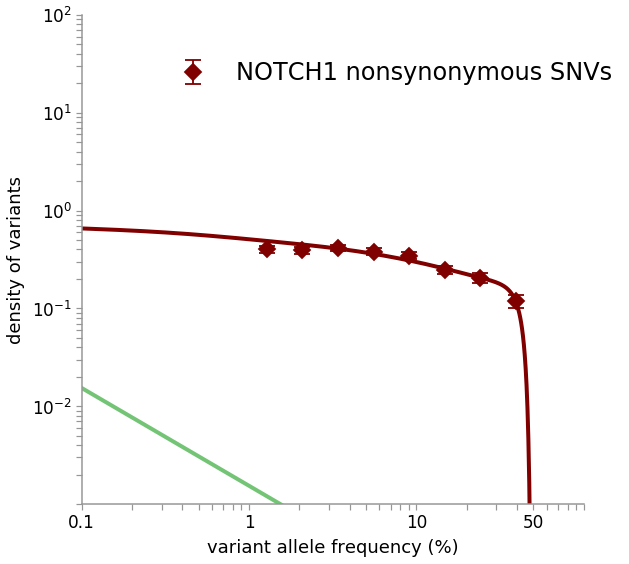

In [88]:
# plot
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(9,9))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]

# nonsynonymous VAF densities are not rescaled
plot_log_hist_data_for_plot_not_rescaled(NOTCH1_nonsyn_VAF_trimmed, n_sample, n_bins_NOTCH1, lmin_NOTCH1, lmax_NOTCH1, 'NOTCH1 nonsynonymous SNVs', 'D',\
                                          12, 'maroon')

print('bestfit mutational rate:', u_NOTCH1_ben)
print('bestfit fitness', s_NOTCH1)

density_beneficial_NOTCH1=[]
density_beneficial_NOTCH1_log=[]
for logfreq in log_VAF:
    
    driver_contrib = driver_contrib_single_s_driver(logfreq,  u_NOTCH1_ben, N_tau_fitted, s_NOTCH1)
            
    nonsyn_haploid_passenger_rate_NOTCH1 = Martincorena_TP53_nonsyn_rate - u_NOTCH1_ben
    if nonsyn_haploid_passenger_rate_NOTCH1 > 0:

        HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_NOTCH1_ben, nonsyn_haploid_passenger_rate_NOTCH1, N_tau_fitted, s_NOTCH1)

    else:
#         print('HH_contrib = 0')
        HH_contrib = 0

    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix)

    predicted_density = driver_contrib + HH_contrib + dev_contrib

    density_beneficial_NOTCH1_log.append(np.log(predicted_density))
    
ax1.plot(log_VAF, density_beneficial_NOTCH1_log, zorder=0, color='maroon', lw=4)

density_dev_nonsyn_NOTCH1_log=[]
for logfreq in log_VAF:
    
    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_NOTCH1_dev_per_doubling_nonsynonymous_mu_LeeSix)
    density_dev_nonsyn_NOTCH1_log.append(np.log(dev_contrib))

ax1.plot(log_VAF, density_dev_nonsyn_NOTCH1_log, c = green3, lw = 4)
ax1.legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize = 12*2)

print('N tau :', N_tau_fitted)
print('u_NOTCH1_ben', u_NOTCH1_ben, 's_NOTCH1', s_NOTCH1)

# plt.savefig('NOTCH1_gene_oesophagous_nonsyn_fitted_VAF_nonsyn_HH_dev_contrib.pdf', bbox_inches='tight')


TP53 nonsynonymous variant VAF

hist without zero is [66, 61, 67, 55, 51, 32, 22, 18]
log_hist_for_plot is [-1.83311084 -1.91189172 -1.81807297 -2.0154324  -2.09093995 -2.55702968
 -2.93172313 -3.13239383]
errors is [(0.1313526147193682, 0.1370081494685802, 0.1303016929880898, 0.1448407862625114, 0.15085545817516355, 0.19452778497068834, 0.2397821029348699, 0.2687978542092351), (0.11608514258857983, 0.1204788475173697, 0.11526381562354926, 0.12649164759431475, 0.13105283087898356, 0.16277908665610763, 0.19326208729997685, 0.21163944036928672)]
u_TP53_ben 1.2118728691123377e-05 s_TP53 0.10545427597764856


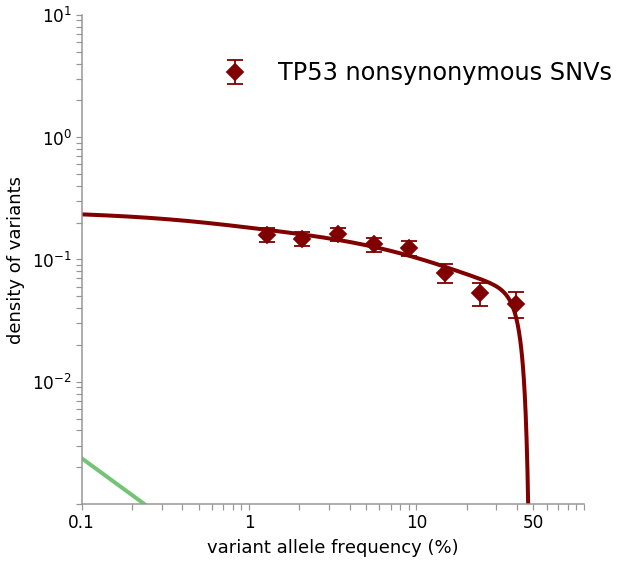

In [89]:
# plot

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(9,9))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]

# nonsynonymous VAF densities are not rescaled
plot_log_hist_data_for_plot_not_rescaled(TP53_nonsyn_VAF_trimmed, n_sample, n_bins_TP53, lmin, lmax, 'TP53 nonsynonymous SNVs', 'D',\
                                          12, 'maroon')



density_beneficial_TP53=[]
density_beneficial_TP53_log=[]
for logfreq in log_VAF:
    
    driver_contrib = driver_contrib_single_s_driver(logfreq,  u_TP53_ben, N_tau_fitted, s_TP53)
            
    nonsyn_haploid_passenger_rate_TP53 = Martincorena_TP53_nonsyn_rate - u_TP53_ben
    if nonsyn_haploid_passenger_rate_TP53 > 0:

        HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_TP53_ben, nonsyn_haploid_passenger_rate_TP53, N_tau_fitted, s_TP53)

    else:
#         print('HH_contrib = 0')
        HH_contrib = 0

    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix)

    predicted_density = driver_contrib + HH_contrib + dev_contrib

    density_beneficial_TP53_log.append(np.log(predicted_density))


ax1.plot(log_VAF, density_beneficial_TP53_log, zorder=0, color='maroon', lw=4)

density_dev_nonsyn_TP53_log=[]
for logfreq in log_VAF:
    
    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix)
    density_dev_nonsyn_TP53_log.append(np.log(dev_contrib))

ax1.plot(log_VAF, density_dev_nonsyn_TP53_log, c = green3, lw = 4)

ax1.legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize= 12*2)

ax1.set_ylim(np.log(10**-3), np.log(10))

print('u_TP53_ben', u_TP53_ben, 's_TP53', s_TP53)

# plt.savefig('TP53_gene_oesophagous_nonsyn_fitted_VAF_nonsyn_HH_dev_contrib.pdf', bbox_inches='tight')


NOTCH2 nonsynonymous variant VAF

hist without zero is [77, 40, 32, 17, 15, 3, 4]
log_hist_for_plot is [-1.67896016 -2.33388613 -2.55702968 -3.18955224 -3.31471538 -4.9241533
 -4.63647122]
errors is [(0.12099383327176105, 0.17211052686643935, 0.19452778497068834, 0.27777877245548055, 0.2986741172267169, 0.8612115025164906, 0.6931471805599454), (0.10792175170440843, 0.1467927188821494, 0.16277908665610763, 0.21715415063904642, 0.22968124573976523, 0.455746394408326, 0.4054651081081646)]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


u_NOTCH2_ben 1.2442051104122569e-05 s_NOTCH2 0.07261957292026648


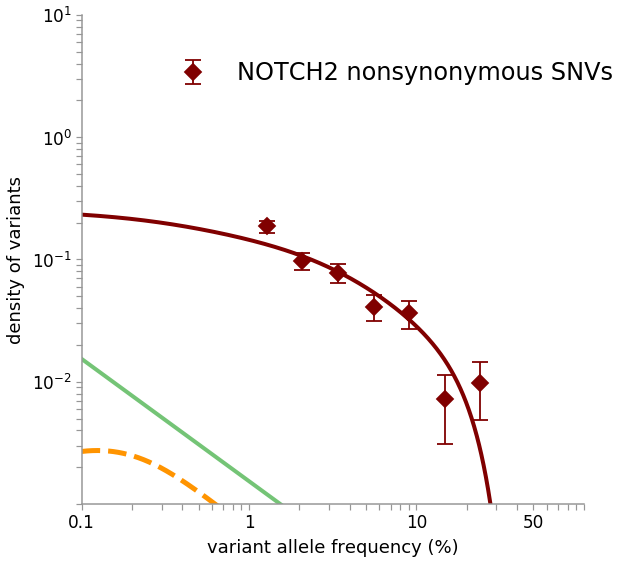

In [90]:
# plot

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(9,9))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]

n_bins_NOTCH2 = 8

# nonsynonymous VAF densities are not rescaled
plot_log_hist_data_for_plot_not_rescaled(NOTCH2_nonsyn_VAF_trimmed, n_sample, n_bins_NOTCH2, lmin, lmax, 'NOTCH2 nonsynonymous SNVs', 'D',\
                                          12, 'maroon')


density_beneficial_NOTCH2=[]
density_beneficial_NOTCH2_log=[]
for logfreq in log_VAF:
    
    driver_contrib = driver_contrib_single_s_driver(logfreq,  u_NOTCH2_ben, N_tau_fitted, s_NOTCH2)
            
    nonsyn_haploid_passenger_rate_NOTCH2 = Martincorena_NOTCH2_nonsyn_rate - u_NOTCH2_ben
    
    if nonsyn_haploid_passenger_rate_NOTCH2 > 0:

        HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_NOTCH2_ben, nonsyn_haploid_passenger_rate_NOTCH2, N_tau_fitted, s_NOTCH2)

    else:
#         print('HH_contrib = 0')
        HH_contrib = 0

    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_TP53_dev_per_doubling_nonsynonymous_mu_LeeSix)

    predicted_density = driver_contrib + HH_contrib + dev_contrib

    density_beneficial_NOTCH2_log.append(np.log(predicted_density))


ax1.plot(log_VAF, density_beneficial_NOTCH2_log, zorder=0, color='maroon', lw=4)

density_dev_nonsyn_NOTCH2_log=[]
for logfreq in log_VAF:
    
    dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_NOTCH2_dev_per_doubling_nonsynonymous_mu_LeeSix)
    density_dev_nonsyn_NOTCH2_log.append(np.log(dev_contrib))

ax1.plot(log_VAF, density_dev_nonsyn_NOTCH2_log, c = green3, lw = 4)


density_nonsyn_HH_NOTCH2_log=[]
for logfreq in log_VAF:
    
    nonsyn_haploid_passenger_rate_NOTCH2 = Martincorena_NOTCH2_nonsyn_rate - u_NOTCH2_ben
    
    if nonsyn_haploid_passenger_rate_NOTCH2 > 0:

        HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_NOTCH2_ben, nonsyn_haploid_passenger_rate_NOTCH2, N_tau_fitted, s_NOTCH2)

        density_nonsyn_HH_NOTCH2_log.append(np.log(HH_contrib))
ax1.plot(log_VAF, density_nonsyn_HH_NOTCH2_log, c = c3, lw = 5, linestyle='--')

ax1.legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize= 12*2)

ax1.set_ylim(np.log(10**-3), np.log(10))

print('u_NOTCH2_ben', u_NOTCH2_ben, 's_NOTCH2', s_NOTCH2)

# plt.savefig('NOTCH2_gene_oesophagous_nonsyn_fitted_VAF_nonsyn_HH_dev_contrib.pdf', bbox_inches='tight')


In [19]:
def plot_log_hist_data_for_plot_solid_no_normalization_subplot(study_VAFs, study_total, n_bins, study_name, marker_name, marker_size, color, m, n, scale):
    # study_VAFs is a list of strings
    print('plot_log_hist_data_for_plot_solid_no_normalization')
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1[m][n].errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
#     ax1[m][n].set_ylim(np.log(10**-8), np.log(10**-2))
#     ax1[m][n].set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
#     ax1[m][n].set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
# #     ax1[m][n].set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
#     ax1[m][n].set_ylabel('density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    
    
    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
                  
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1[m][n].set_xticks(x_major_ticks)
    ax1[m][n].set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1[m][n].xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1[m][n].set_yticks(y_major_ticks)
    ax1[m][n].set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1[m][n].yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1[m][n].spines['top'].set_visible(False)
    ax1[m][n].spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1


CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 188 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 186 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 149 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 27 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykerne

CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 47 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 27 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 35 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization
CCDS is 522 bp long
developmental mutation rate per cell doubling per haploid 7.255202956265896e-07
There are 39 variants after data trimming
plot_log_hist_data_for_plot_solid_no_normalization


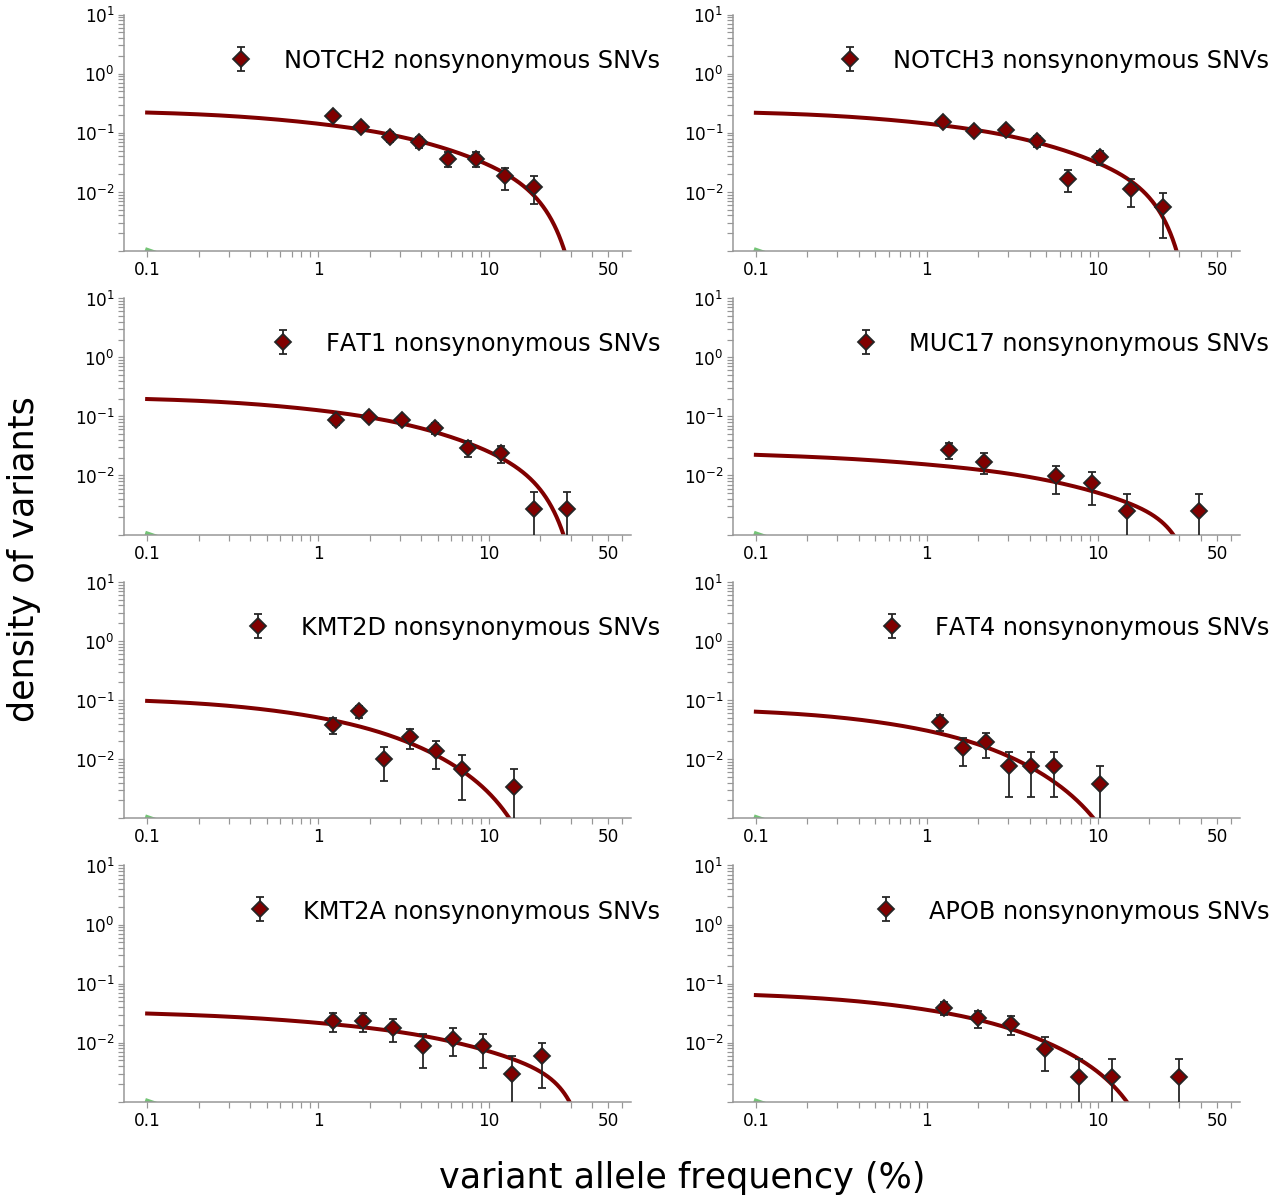

In [26]:
# Plotting nonsynonymous VAF spectra of the 3rd-10th genes

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(4, 2, sharey=False, sharex=False, figsize=(20, 20))

font = {'weight' : 'normal','size'   : 16}



count = 0
m = 0
n = 0

for gene_name in list_of_genes_in_nonsyn_mutation_freq_order[2:10]:
    
#     plot data
    # set up parameters
    canonical_CCDS_length = 0

    list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name(gene)
    #         print(list_of_transcripts_of_this_gene)
    # print(release_76.transcript_by_id('ENST00000264709'))
    for ID in list_of_transcripts_of_this_gene:

        retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
    #         print(retrieve_transcript_by_ID)
        try:
            transcript_id = retrieve_transcript_by_ID.transcript_id
            transcript_name = retrieve_transcript_by_ID.transcript_name
            gene_id = retrieve_transcript_by_ID.gene_id
            biotype = retrieve_transcript_by_ID.biotype
            contig = retrieve_transcript_by_ID.contig
            start = retrieve_transcript_by_ID.start
            end = retrieve_transcript_by_ID.end
            strand = retrieve_transcript_by_ID.strand
            retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                                  contig=contig, start=start, end=end, strand=strand, genome= release_75)

            # CCDS of this transcript
            retrieved_CCDS = retrieve_Transcript.coding_sequence
    #             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
            if canonical_CCDS_length < len(retrieved_CCDS):
                canonical_CCDS_length = len(retrieved_CCDS)


        except:
            pass
    #             print('\n', ID, 'does not have complete CCDS information')


    #         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

    if canonical_CCDS_length == 0:
        print('\n Gene is non-coding.')



    CCDS_of_this_gene = canonical_CCDS_length
    print('CCDS is', CCDS_of_this_gene,'bp long')

    
    Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_this_gene/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
    print('developmental mutation rate per cell doubling per haploid', Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix) 

    # This estimate is different from blood
    nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
    Martincorena_this_gene_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_this_gene

    #   trimming
    n_bins=8
    trimmed_fmax=0.5
    trimmed_fmin=0.01
    trimmed_lmin=np.log(trimmed_fmin)
    trimmed_lmax=np.log(trimmed_fmax)
    lmin=trimmed_lmin
    lmax=trimmed_lmax

    gene_nonsyn_VAF_trimmed=[]
    for i in all_genes_nonsyn_SNV_VAF[gene_name]:
        if trimmed_fmin < i < trimmed_fmax:
            gene_nonsyn_VAF_trimmed.append(i)
    print('There are', len(gene_nonsyn_VAF_trimmed),'variants after data trimming')
    
    n_bins_this_gene = 8

    plot_log_hist_data_for_plot_solid_no_normalization_subplot(gene_nonsyn_VAF_trimmed, n_sample, n_bins, gene_name+' nonsynonymous SNVs', 'D',\
                                          12, 'maroon', m, n, scale)
    
#     plot predictions
    u_this_gene_ben = dictionary_bestfit_u[gene_name]
    s_this_gene = dictionary_bestfit_s[gene_name]
    
    density_beneficial_this_gene=[]
    density_beneficial_this_gene_log=[]
    for logfreq in log_VAF:

        driver_contrib = driver_contrib_single_s_driver(logfreq,  u_this_gene_ben, N_tau_fitted, s_this_gene)

        nonsyn_haploid_passenger_rate_this_gene = Martincorena_this_gene_nonsyn_rate - u_this_gene_ben

        if nonsyn_haploid_passenger_rate_this_gene > 0:

            HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_this_gene_ben, nonsyn_haploid_passenger_rate_this_gene, N_tau_fitted, s_this_gene)

        else:
    #         print('HH_contrib = 0')
            HH_contrib = 0

        dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix)

        predicted_density = driver_contrib + HH_contrib + dev_contrib

        density_beneficial_this_gene_log.append(np.log(predicted_density))


    ax1[m][n].plot(log_VAF, density_beneficial_this_gene_log, zorder=0, color='maroon', lw=4)

    density_dev_nonsyn_this_gene_log=[]
    for logfreq in log_VAF:

        dev_contrib = linProbtheory_ages_dev_not_normalized(logfreq, Martincorena_this_gene_dev_per_doubling_nonsynonymous_mu_LeeSix)
        density_dev_nonsyn_this_gene_log.append(np.log(dev_contrib))

    ax1[m][n].plot(log_VAF, density_dev_nonsyn_this_gene_log, c = green3, lw = 4)


    density_nonsyn_HH_this_gene_log=[]
    for logfreq in log_VAF:

        nonsyn_haploid_passenger_rate_this_gene = Martincorena_this_gene_nonsyn_rate - u_this_gene_ben

        if nonsyn_haploid_passenger_rate_this_gene > 0:

            HH_contrib = linProbtheory_actual_ages_hitch_by_single_s_driver(logfreq, u_this_gene_ben, nonsyn_haploid_passenger_rate_this_gene, N_tau_fitted, s_this_gene)

            density_nonsyn_HH_this_gene_log.append(np.log(HH_contrib))
            
    if nonsyn_haploid_passenger_rate_this_gene > 0:        
        ax1[m][n].plot(log_VAF, density_nonsyn_HH_this_gene_log, c = c3, lw = 5, linestyle='--')

    ax1[m][n].legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize= 12*2)

    ax1[m][n].set_ylim(np.log(10**-3), np.log(10))
    
    if n < 2:
        n = n + 1
    if n == 2:
        m = m + 1
        n = 0

    count = count + 1

f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('variant allele frequency (%)', fontsize = 35, labelpad = 6*7, fontweight = 'medium')
#     ax1[m][n].set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
plt.ylabel('density of variants', fontsize = 35, labelpad = 6*10, fontweight = 'medium')



plt.show()


In [27]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

# Quantifying explained positive selection from the synonymous VAF spectra

Based on 'Discrete method'

In [30]:
# fitting on cumulative probability graph (not divided by binsize nor mutation rates), shift left

def squared_distance_calculation_HH_top_x_drivers_cumulative_shift_left(params, data, ages, N_tau, list_of_fitness, list_of_mut, u_dev, u_oes_syn, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    fold_increase = params[0]

    def linear_HH_density_single_s_actual_ages(l):
        
            predicted_density = 0
            
            for j in range(len(ages)):
                t=ages[j]
                
                theory_binned = developmental_synonymous(l, u_dev, u_oes_syn)
                
                for i in range(len(list_of_fitness)):
                    fitness = list_of_fitness[i]
                    mut_rate = list_of_mut[i]
                    theory_binned = theory_binned + hitchhiking_Reed_Model(l, N_tau, t, fold_increase*mut_rate, fitness)\
                
                predicted_density=\
                predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)
                
            return predicted_density
    
    total_square_distance = 0
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linear_HH_density_single_s_actual_ages(l)),\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linear_HH_density_single_s_actual_ages(l)),\
#                                      logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = integrate.quad(lambda l: (linear_HH_density_single_s_actual_ages(l)),\
                                     logfreq, lmax)[0]



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def squared_distance_calculation_HH_top_x_drivers_cumulative(params, data, ages, N_tau, list_of_fitness, list_of_mut, u_dev, u_oes_syn, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    fold_increase = params[0]

    def linear_HH_density_single_s_actual_ages(l):
        
            predicted_density = 0
            
            for j in range(len(ages)):
                t=ages[j]
                
                theory_binned = developmental_synonymous(l, u_dev, u_oes_syn)
                
                for i in range(len(list_of_fitness)):
                    fitness = list_of_fitness[i]
                    mut_rate = list_of_mut[i]
                    theory_binned = theory_binned + hitchhiking_Reed_Model(l, N_tau, t, fold_increase*mut_rate, fitness)\
                
                predicted_density=\
                predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)
                
            return predicted_density
    
    total_square_distance = 0
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        if logfreq+bin_size/2<np.log(0.5):
            predicted_density=integrate.quad(lambda l: (linear_HH_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        else:
            predicted_density=integrate.quad(lambda l: (linear_HH_density_single_s_actual_ages(l)),\
                                     logfreq-bin_size/2, lmax)[0]

        predicted_cumulative_density = predicted_cumulative_density + predicted_density



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance



top 10 in order: 'NOTCH1', 'TP53', 'NOTCH2', 'NOTCH3', 'FAT1', 'MUC17', 'KMT2D', 'FAT4', 'KMT2A', 'APOB'

In [39]:
list_of_top_10_fitness = [s_NOTCH1,s_TP53,s_NOTCH2, dictionary_bestfit_s['NOTCH3'], dictionary_bestfit_s['FAT1'], \
                          dictionary_bestfit_s['MUC17'],dictionary_bestfit_s['KMT2D'],dictionary_bestfit_s['FAT4'],\
                          dictionary_bestfit_s['KMT2A'], dictionary_bestfit_s['APOB']]
list_of_top_10_mut = [u_NOTCH1_ben,u_TP53_ben,u_NOTCH2_ben, dictionary_bestfit_u['NOTCH3'],\
                      dictionary_bestfit_u['FAT1'],dictionary_bestfit_u['MUC17'], dictionary_bestfit_u['KMT2D'],\
                      dictionary_bestfit_u['FAT4'], dictionary_bestfit_u['KMT2A'],dictionary_bestfit_u['APOB']]


In [40]:
# trim synonymous data (including merged calls with unmodified vaf)
n_bins_syn = 10

trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)
lmin_syn = trimmed_lmin
lmax_syn = trimmed_lmax

print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)
print('lmin_syn', lmin_syn, 'lmax_syn', lmax_syn)
print('i.e. fmin_syn', np.exp(lmin_syn), 'fmax_syn', np.exp(lmax_syn))


list_of_syn_SNV_vaf_Martincorena_trimmed=[]
for i in list_of_syn_SNV_vaf_Martincorena:
    if trimmed_fmin < i < trimmed_fmax:
        list_of_syn_SNV_vaf_Martincorena_trimmed.append(i)


VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(list_of_syn_SNV_vaf_Martincorena_trimmed, n_sample, Martincorena_synonymous_mu,\
                                                                                        n_bins_syn, lmin_syn, lmax_syn)

VAF_info_syn_cumulative_shift_to_left = rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(list_of_syn_SNV_vaf_Martincorena_trimmed, n_sample, Martincorena_synonymous_mu,\
                                                                                        n_bins_syn, lmin_syn, lmax_syn)

print('\nnumber of bins set is', n_bins_syn)
print('\nVAF_info_syn_cumulative', VAF_info_syn_cumulative)
print('\nVAF_info_syn_cumulative_shift_to_left', VAF_info_syn_cumulative_shift_to_left)

VAF_info_syn_cumulative_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in VAF_info_syn_cumulative:
    if i[1] != -(float('inf')):
        VAF_info_syn_cumulative_without_inf.append(i)
        
print('\nVAF_info_syn_cumulative_without_inf', VAF_info_syn_cumulative_without_inf)        
print('\nmax VAF is', np.exp(VAF_info_syn_cumulative[len(VAF_info_syn_cumulative)-1][0]))

VAF_info_syn_cumulative_shift_to_left_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in VAF_info_syn_cumulative_shift_to_left:
    if i[1] != -(float('inf')):
        VAF_info_syn_cumulative_shift_to_left_without_inf.append(i)
        


trimmed_fmax 0.4999 trimmed_fmin 0.01
lmin_syn -4.605170185988091 lmax_syn -0.6933472005626123
i.e. fmin_syn 0.010000000000000004 fmax_syn 0.4999
bin_centres 9
bin_centres_without_zero 8

number of bins set is 10

VAF_info_syn_cumulative [(-4.387846686797786, 4.622359403571901, 107), (-3.953199688417178, 4.154223188500961, 67), (-3.518552690036569, 3.9007742876914215, 52), (-3.0839056916559606, 3.3507279507721495, 30), (-2.6492586932753515, 2.9940530068334175, 21), (-2.214611694894743, 2.588587898725253, 14), (-1.7799646965141342, 2.3474258419083647, 11), (-1.3453176981335255, 1.048142857778104, 3), (-0.9106706997529168, -inf, 0)]

VAF_info_syn_cumulative_shift_to_left [(-4.605170185988091, 4.622359403571901, 107), (-4.170523187607483, 4.154223188500961, 67), (-3.7358761892268735, 3.9007742876914215, 52), (-3.3012291908462648, 3.3507279507721495, 30), (-2.866582192465656, 2.9940530068334175, 21), (-2.4319351940850473, 2.588587898725253, 14), (-1.9972881957044386, 2.3474258419083647, 11

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in log


In [43]:
#  to determine best-fit fold increase for top 1st-10th genes
import scipy
print('N_tau fixed at:', N_tau_fitted)

fold_increase_top_x_gene = {}

for x in range(11):
    
    list_of_top_x_fitness = list_of_top_10_fitness[0:x]
    list_of_top_x_mut = list_of_top_10_mut[0:x]
    print('top x genes:', len(list_of_top_x_fitness))

    fold_increase_guess = 1.7
    initial_guess = [fold_increase_guess]

    outcome=scipy.optimize.minimize(squared_distance_calculation_HH_top_x_drivers_cumulative_shift_left, fold_increase_guess, \
                                    args=(VAF_info_syn_cumulative_shift_to_left_without_inf, ages, N_tau_fitted, \
                                          list_of_top_x_fitness, list_of_top_x_mut, \
                                          oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu, lmin_syn, lmax_syn, n_bins_syn, n_sample), method='Nelder-Mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values fold_increase:',  outcome.x)
    
    if x != 0:
        fold_increase_top_x_gene[x] = outcome.x[0]
        
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

N_tau fixed at: 7790.895048199087
top x genes: 0
Success of fitting outcome is True
best-fit values fold_increase: [1.7]
top x genes: 1
Success of fitting outcome is True
best-fit values fold_increase: [2.56146545]
top x genes: 2
Success of fitting outcome is True
best-fit values fold_increase: [1.87981049]
top x genes: 3
Success of fitting outcome is True
best-fit values fold_increase: [1.75280594]
top x genes: 4
Success of fitting outcome is True
best-fit values fold_increase: [1.63408661]
top x genes: 5
Success of fitting outcome is True
best-fit values fold_increase: [1.54773773]
top x genes: 6
Success of fitting outcome is True
best-fit values fold_increase: [1.53117378]
top x genes: 7
Success of fitting outcome is True
best-fit values fold_increase: [1.52377441]
top x genes: 8


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values fold_increase: [1.51593018]
top x genes: 9
Success of fitting outcome is True
best-fit values fold_increase: [1.49378265]
top x genes: 10
Success of fitting outcome is True
best-fit values fold_increase: [1.48062332]


In [44]:
# Storing the results
passenger_contribution_x_discrete_HH_dev_contrib = [0]
passenger_contribution_y_discrete_HH_dev_contrib = [0]
for x, fold_increase in fold_increase_top_x_gene.items():
    passenger_contribution_x_discrete_HH_dev_contrib.append(x)
    passenger_contribution_y_discrete_HH_dev_contrib.append((1/fold_increase))


## creating the pie chart (Figure 4B) 

In [45]:
#  to determine best-fit fold increase for top 10 genes
import scipy
print('N_tau fixed at:', N_tau_fitted)

for x in [10]:
    
    list_of_top_x_fitness = list_of_top_10_fitness[0:x]
    list_of_top_x_mut = list_of_top_10_mut[0:x]
    print('top x genes:', len(list_of_top_x_fitness))

    fold_increase_guess = 1.7
    initial_guess = [fold_increase_guess]

    outcome=scipy.optimize.minimize(squared_distance_calculation_HH_top_x_drivers_cumulative_shift_left, fold_increase_guess, \
                                    args=(VAF_info_syn_cumulative_shift_to_left_without_inf, ages, N_tau_fitted, \
                                          list_of_top_x_fitness, list_of_top_x_mut, \
                                          oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu, lmin_syn, lmax_syn, n_bins_syn, n_sample), method='Nelder-Mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values fold_increase:',  outcome.x)
    
    fold_increase_top_10_genes_discrete = outcome.x[0]

N_tau fixed at: 7790.895048199087
top x genes: 10


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values fold_increase: [1.48062332]


In [157]:
#  to determine dev contrib for estimate based on 3x dev rate and shift left
import scipy
print('N_tau fixed at:', N_tau_fitted)

for x in [10]:
    
    list_of_top_x_fitness = list_of_top_10_fitness[0:x]
    list_of_top_x_mut = list_of_top_10_mut[0:x]
    print('top x genes:', len(list_of_top_x_fitness))

    fold_increase_guess = 1.7
    initial_guess = [fold_increase_guess]

    outcome=scipy.optimize.minimize(squared_distance_calculation_HH_top_x_drivers_cumulative_shift_left, fold_increase_guess, \
                                    args=(VAF_info_syn_cumulative_shift_to_left_without_inf, ages, N_tau_fitted, \
                                          list_of_top_x_fitness, list_of_top_x_mut, \
                                          0, Martincorena_synonymous_mu, lmin_syn, lmax_syn, n_bins_syn, n_sample), method='Nelder-Mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values fold_increase:',  outcome.x)
    
    total_amplitude_top_10_genes_discrete = outcome.x[0]

N_tau fixed at: 7790.895048199087
top x genes: 10


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values fold_increase: [1.58660225]


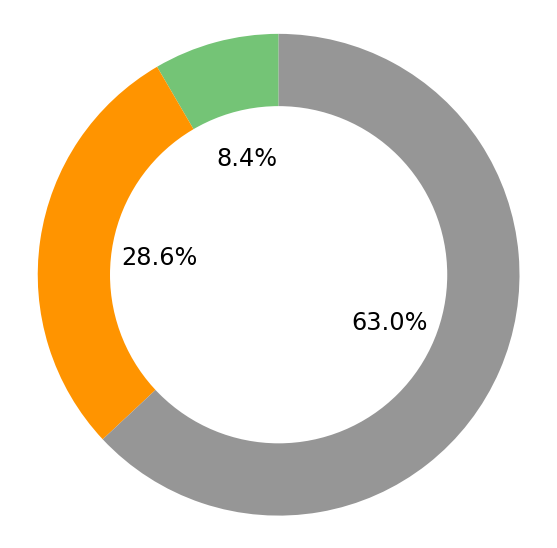

In [159]:
# Plot pie chart for fraction of position selection explained by top 10 genes
import matplotlib.pyplot as plt
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8*scale, 8*scale))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'developmental', 'unexplained\npositive selection', 'explained\npositive selection'

dev_contrib =  total_amplitude_top_10_genes_discrete - fold_increase_top_10_genes_discrete
sizes = [dev_contrib, fold_increase_top_10_genes_discrete-1, 1]
sizes = [c/sum(sizes)*100 for c in sizes]

# explode = (0.05,0.05,0.05)
explode = (0, 0, 0)  


colors = [green3, c3, grey3]

patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.5,
        labeldistance = 1.1, shadow=False, startangle=90, colors = colors)
for i in [0,1,2]:
    texts[i].set_fontsize(24)
    autotexts[i].set_fontsize(24)

# Add a circle to make a torus
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig('Pie_chart_driver_analysis_dev_and_HH_contrib_top_10_genes_as_discrete_drivers.pdf', bbox_inches='tight')
plt.show()

In [63]:
def Predicted_syn_VAF_for_HH_with_discrete_drivers_with_dev(l, ages, list_of_n_samples_per_person, n_sample, N_tau_fitted, u_dev, u_oes_syn, list_of_fitness, list_of_mut, fold_increase):
        
    predicted_density = 0

    for j in range(len(ages)):
        t=ages[j]

        theory_binned = developmental_synonymous(l, u_dev, u_oes_syn)

        for i in range(len(list_of_fitness)):
            fitness = list_of_fitness[i]
            mut_rate = list_of_mut[i]
            theory_binned = theory_binned + hitchhiking_Reed_Model(l, N_tau_fitted, t, fold_increase*mut_rate, fitness)\

        predicted_density=\
        predicted_density+(theory_binned*list_of_n_samples_per_person[j]/n_sample)

    return predicted_density

hist without zero is [103, 63, 44, 32, 28, 16, 8, 9, 2]
max(bin_centres_without_zero) [-4.409579036716817, -4.018396738174269, -3.6272144396317216, -3.2360321410891735, -2.8448498425466258, -2.4536675440040776, -2.06248524546153, -1.6713029469189822, -1.2801206483764345]
log_hist_for_plot is [5.52284115 5.03124689 4.67230179 4.35384806 4.22031667 3.66070088
 2.9675537  3.08533674 1.58125934]
errors is [(0.10373176259256223, 0.13466135384144273, 0.16340835113817587, 0.19452778497068834, 0.20946532190636624, 0.28768207245178123, 0.4362646682381306, 0.4054651081081646, 1.2279471772995156), (0.09397558764719705, 0.11866101249500094, 0.14041883291347723, 0.16277908665610763, 0.17309767773549112, 0.2231435513142097, 0.30273327561360786, 0.2876820724517808, 0.5347999967395705)]
hist without zero is [166, 162, 171, 157, 143, 102, 85, 49]
log_hist_for_plot is [8.48744597 8.46305451 8.51712173 8.43170398 8.33830281 8.00043099
 7.81810943 7.26727848]
errors is [(0.08079262907916807, 0.08182566801

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


For top 10 genes density_hitchhiker [254.57531737919712, 244.585527410083, 234.97064933776005, 225.71724346713245, 216.81220027557475, 208.2427686146946, 199.99657508534435, 192.06163608343525, 184.42636385255753, 177.0795677202492, 170.0104515395509, 163.20860820834122, 156.66401199843872, 150.36700929707686, 144.30830824719834, 138.47896767139682, 132.87038557771996, 127.47428747355997, 122.28271465548693, 117.28801259663496, 112.48281951745207, 107.86005519854886, 103.41291007438929, 99.13483463219563, 95.01952913041623, 91.06093364435179, 87.25321844217905, 83.59077469191838, 80.06820549832186, 76.68031726776543, 73.4221113987124, 70.2887762949559, 67.27567969851295, 64.37836133866064, 61.592525893147474, 58.9140362570889, 56.338907114486986, 53.86329880673417, 51.48351149190496, 49.19597958813681, 46.997266493969704, 44.884059578165775, 42.853165431257594, 40.90150537086027, 39.02611119260127, 37.224121158333034, 35.492776213058825, 33.82941642167443, 32.23147761617268, 30.6964882

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log


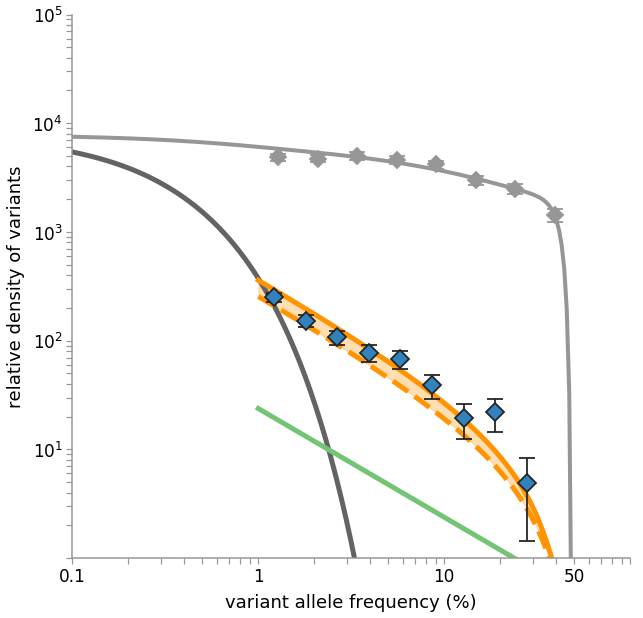

In [166]:
# Plotting the synonymous VAF spectrum for top 10 genes as discrete drivers against best-fit fold increase
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]

Martincorenamarkersize=14*0.9

scale=1.2
plot_log_hist_data_for_plot_synonymous_rescaled(list_of_syn_SNV_vaf_Martincorena_trimmed, n_sample, Martincorena_synonymous_mu, \
                                                n_bins_syn, lmin_syn, lmax_syn, 'all synonymous variants', 'D', Martincorenamarkersize, blue4)

plot_log_hist_data_for_plot_nonsynonymous_rescaled(NOTCH1_nonsyn_VAF_trimmed, n_sample,  u_NOTCH1_ben, \
                                     n_bins_NOTCH1, lmin_NOTCH1, lmax_NOTCH1, 'NOTCH1 non-synonymous variants', 'D', 12, grey3)


phi=1/100
log_VAF_passenger=np.array(np.linspace(np.log(phi), lmax_syn, 100))
log_VAF=np.array(np.linspace(np.log(0.1/100), lmax_syn, 100))

# logged in y axis
density_drift_log=[]
for l in log_VAF:
    density_drift_contributed_by_diff_ages=0
    for j in range(len(Martincorena_donor_ages)):
        t = Martincorena_donor_ages[j]
        density_drift_contributed_by_diff_ages=density_drift_contributed_by_diff_ages+(Predicted_drift_with_cutoff(l, N_tau_fitted, c, t)*list_of_n_samples_per_person[j]/n_sample)
#         print('t is',t)
    density_drift_log.append(np.log(density_drift_contributed_by_diff_ages))
ax1.plot(log_VAF, density_drift_log, zorder=2, color=grey4, lw=5, label='neutral drift theory')
print('density_drift_log', density_drift_log)

fold_increase = 1
   
list_of_top_x_fitness = list_of_top_10_fitness[0:11]
list_of_top_x_mut = list_of_top_10_mut[0:11]
    
density_hitchhiker=[]
density_hitchhiker_log=[]
for l in log_VAF_passenger:
    result = Predicted_syn_VAF_for_HH_with_discrete_drivers_with_dev(l, Martincorena_donor_ages, list_of_n_samples_per_person, \
                                                                     n_sample, N_tau_fitted, \
                                                                     oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu, \
                                                                     list_of_top_x_fitness, list_of_top_x_mut, fold_increase)
    density_hitchhiker.append(result)
    density_hitchhiker_log.append(np.log(result))
ax1.plot(log_VAF_passenger, density_hitchhiker_log, color=c3, linestyle='--', lw=5, zorder=2, label='hitchhiker theory')
print('For top 10 genes density_hitchhiker', density_hitchhiker)

fold_increase = fold_increase_top_10_genes_discrete

density_hitchhiker_bestfit=[]
density_hitchhiker_bestfit_log=[]
for l in log_VAF_passenger:
    result = Predicted_syn_VAF_for_HH_with_discrete_drivers_with_dev(l, Martincorena_donor_ages, list_of_n_samples_per_person, \
                                                                     n_sample, N_tau_fitted, \
                                                                     oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu, \
                                                                     list_of_top_x_fitness, list_of_top_x_mut, fold_increase)
    density_hitchhiker_bestfit.append(result)
    density_hitchhiker_bestfit_log.append(np.log(result))
print('discrete drivers (top 10 genes): density_hitchhiker_bestfit_log', density_hitchhiker_bestfit_log)
ax1.plot(log_VAF_passenger, density_hitchhiker_bestfit_log, color=c3, lw=5, zorder=2, label='hitchhiker best-fit')

ax1.fill_between(log_VAF_passenger, density_hitchhiker_bestfit_log, y2=density_hitchhiker_log, \
                color = c3, alpha = 0.3, edgecolor = 'white')

density_developmental=[]
density_developmental_log=[]
for l in log_VAF_passenger:
    density_developmental_contributed_by_diff_ages=0
    for j in range(9):
        t=ages[j]
        density_developmental_contributed_by_diff_ages=\
        density_developmental_contributed_by_diff_ages+developmental_synonymous(l, oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu)/9

    density_developmental.append(density_developmental_contributed_by_diff_ages)
    density_developmental_log.append(np.log(density_developmental_contributed_by_diff_ages))
print('density_developmental_log', density_developmental_log)
ax1.plot(log_VAF_passenger, density_developmental_log, color=green3, lw=5, zorder=2, label='developmental theory')

density_beneficial_NOTCH1=[]
density_beneficial_NOTCH1_log=[]
log_VAF_ben=np.array(np.linspace(np.log(0.1/100), lmax_syn, 200))
for l in log_VAF_ben:
    density_beneficial_contributed_by_diff_ages=0
    for j in range(9):
        t=ages[j]

        density_beneficial_contributed_by_diff_ages=density_beneficial_contributed_by_diff_ages+\
        (Predicted_beneficial_with_cutoff(l, N_tau_fitted, t, u_NOTCH1_ben, s_NOTCH1)*list_of_n_samples_per_person[j]/n_sample)
    
    density_beneficial_NOTCH1.append(density_beneficial_contributed_by_diff_ages)
    density_beneficial_NOTCH1_log.append(np.log(density_beneficial_contributed_by_diff_ages/(2*u_NOTCH1_ben)))
print('density_beneficial_NOTCH1_log', density_beneficial_NOTCH1_log)    
ax1.plot(log_VAF_ben, density_beneficial_NOTCH1_log, zorder=0, color=grey3, lw=4, label='Prediction for NOTCH1')


# plt.savefig('Passenger_prediction_Martincorena_top_10_genes_as_discrete_drivers.pdf',bbox_inches='tight')


## Observed drivers on a parametrized DFE

Based on 'Parametrized method'

In [69]:
filename = 'Martincorena_gene_list.csv'

list_of_74_Martincorena_genes = []

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        if row_count == 0:
            for i in range(74):
                list_of_74_Martincorena_genes.append(row[i])
        row_count = row_count + 1
        
print('list_of_74_Martincorena_genes', len(list_of_74_Martincorena_genes))

list_of_74_Martincorena_genes 74


In [70]:
# import CCDS for the 74 genes in order to account for dev and HH contrib
import pyensembl
from pyensembl import EnsemblRelease

top_x_gene_name_list = [list_of_74_Martincorena_genes]
top_x_gene_CCDS_total_length = {}

# release 77 uses human reference genome GRCh38
# reference_assemblies={'GRCh38': (76, 97), 'GRCh37': (55, 75)}
release_76 = EnsemblRelease(76)
release_75 = EnsemblRelease(75)

for x in range(75):
#     top x genes
    genes_concerned = list_of_genes_in_nonsyn_mutation_freq_order[0:x]
    combined_CCDS_length = 0

    for gene in genes_concerned:

#         if gene in genes_with_alternative_names.keys():
#             gene = genes_with_alternative_names[gene]
        # gene = 'DNMT3A'
        canonical_CCDS_length = 0

        list_of_transcripts_of_this_gene = release_75.transcript_ids_of_gene_name(gene)
#         print(list_of_transcripts_of_this_gene)
        # print(release_76.transcript_by_id('ENST00000264709'))
        for ID in list_of_transcripts_of_this_gene:

            retrieve_transcript_by_ID = release_75.transcript_by_id(ID)
    #         print(retrieve_transcript_by_ID)
            try:
                transcript_id = retrieve_transcript_by_ID.transcript_id
                transcript_name = retrieve_transcript_by_ID.transcript_name
                gene_id = retrieve_transcript_by_ID.gene_id
                biotype = retrieve_transcript_by_ID.biotype
                contig = retrieve_transcript_by_ID.contig
                start = retrieve_transcript_by_ID.start
                end = retrieve_transcript_by_ID.end
                strand = retrieve_transcript_by_ID.strand
                retrieve_Transcript = pyensembl.transcript.Transcript(transcript_id=transcript_id, transcript_name=transcript_name, gene_id=gene_id, biotype=biotype, \
                                                      contig=contig, start=start, end=end, strand=strand, genome= release_75)

                # CCDS of this transcript
                retrieved_CCDS = retrieve_Transcript.coding_sequence
    #             print('\nlength of this transcript ID:', ID,'is', len(retrieved_CCDS))
                if canonical_CCDS_length < len(retrieved_CCDS):
                    canonical_CCDS_length = len(retrieved_CCDS)


            except:
                pass
    #             print('\n', ID, 'does not have complete CCDS information')


#         print("\nthe longest CCDS corresponding to gene", gene, 'is ', canonical_CCDS_length,'nucleotides long.')

        if canonical_CCDS_length == 0:
            print('\n Gene is non-coding.')

        combined_CCDS_length = combined_CCDS_length + canonical_CCDS_length

#     print('combined_CCDS_length', combined_CCDS_length)

    top_x_gene_CCDS_total_length[x] = combined_CCDS_length
    
print('top_x_gene_CCDS_total_length', top_x_gene_CCDS_total_length)

INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from C:\Users\chickchick\AppData\Local\pyensembl\GRCh37\ensembl75\pyensembl\GRCh37\ensembl75\Cache\Homo_sapiens.GRCh37.75.ncrna.fa.gz.pickle


top_x_gene_CCDS_total_length {0: 0, 1: 7668, 2: 8850, 3: 16266, 4: 23232, 5: 36999, 6: 50481, 7: 67095, 8: 82041, 9: 93960, 10: 107652, 11: 122559, 12: 129888, 13: 136746, 14: 139953, 15: 144522, 16: 148497, 17: 152880, 18: 155187, 19: 161217, 20: 166320, 21: 174015, 22: 182535, 23: 188043, 24: 190086, 25: 197262, 26: 205353, 27: 206970, 28: 212346, 29: 219444, 30: 221262, 31: 225657, 32: 229290, 33: 231753, 34: 235419, 35: 239763, 36: 242412, 37: 243300, 38: 249069, 39: 251709, 40: 253833, 41: 259851, 42: 264078, 43: 266547, 44: 269478, 45: 274299, 46: 278226, 47: 279630, 48: 281931, 49: 285210, 50: 288003, 51: 290367, 52: 293736, 53: 297765, 54: 300732, 55: 303519, 56: 306081, 57: 307956, 58: 310212, 59: 313863, 60: 317631, 61: 320058, 62: 321717, 63: 322929, 64: 324375, 65: 325674, 66: 327291, 67: 328503, 68: 329073, 69: 330516, 70: 331470, 71: 332040, 72: 332610, 73: 333132, 74: 333132}


In [71]:
# def squared_distance_calculation_nonsyn_parametrized_DFE_cumulative(params, N_tau, data, ages, lmin, lmax, n_bins, study_total):
#     "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    
#     diploid_rate = params[0]

#     total_square_distance = 0
    
#     def linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate):
#             total_density=0.0
#             s_peak = 0.0
#             b = 3
#             d = 0.1
#             diploid_rate = params[0]
#             s_max = float('inf')


#             weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#         #     print(s_max)
#             normalization=integrate.quad(weight_s, 0.0, s_max)
#             normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)

#             def rho(s):
#                 result = 0
#                 for j in range(len(ages)):
#                     t=ages[j]
#         #             no factor of 2 because data is normalized by 2mu
#                     result = result + diploid_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*\
#             np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample

#                 return result

#             total_density=integrate.quad(rho, 0.0, s_max)

#             return total_density[0]

        
    
    
#     bin_size=(lmax-lmin)/(n_bins-1)
    
#     normed_value = study_total
    
#     total_square_distance = 0
    
#     predicted_cumulative_density = 0
    
#     cumulative_data_density = 0
    
#     cumulative_num_data = 0
    
    
#     for datapoint in reversed(data):
        
#         num_data = datapoint[2]

#         logfreq = datapoint[0] 

#         data_density = datapoint[1]

#         cumulative_num_data = cumulative_num_data + num_data


#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate)),\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate)),\
#                                      logfreq-bin_size/2, lmax)[0]

#         predicted_cumulative_density = predicted_cumulative_density + predicted_density
        

#         if data_density!= -(float('inf')):

#             cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

#             square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

# #             if square_distance!=square_distance:
# #                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
#             SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
#             sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
#             if sigma_cumulative == sigma_cumulative:

# #                 if cumulative_data_density != cumulative_data_density:
# #                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

#                 total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
#             else:
#                 total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

#     return total_square_distance

# def linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate, ages):
#             total_density=0.0
#             s_peak = 0.0
#             b = 3
#             d = 0.1
            
#             s_max = float('inf')


#             weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#         #     print(s_max)
#             normalization=integrate.quad(weight_s, 0.0, s_max)
#             normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)

#             def rho(s):
#                 result = 0
#                 for j in range(len(ages)):
#                     t=ages[j]
#         #             no factor of 2 because data is normalized by 2mu
#                     result = result + diploid_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*\
#             np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample

#                 return result

#             total_density=integrate.quad(rho, 0.0, s_max)

#             return total_density[0]

# def squared_distance_calculation_nonsyn_3_free_param_parametrized_DFE_cumulative(params, N_tau, data, ages, lmin, lmax, n_bins, study_total):
#     "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    
#     diploid_rate = params[2]

#     total_square_distance = 0
    
#     def linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate):
#             total_density=0.0
#             s_peak = 0.0
#             b = params[0]
#             d = params[1]
#             diploid_rate = params[0]
#             s_max = float('inf')


#             weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#         #     print(s_max)
#             normalization=integrate.quad(weight_s, 0.0, s_max)
#             normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)

#             def rho(s):
#                 result = 0
#                 for j in range(len(ages)):
#                     t=ages[j]
#         #             no factor of 2 because data is normalized by 2mu
#                     result = result + diploid_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*\
#             np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample

#                 return result

#             total_density=integrate.quad(rho, 0.0, s_max)

#             return total_density[0]

        
    
    
#     bin_size=(lmax-lmin)/(n_bins-1)
    
#     normed_value = study_total
    
#     total_square_distance = 0
    
#     predicted_cumulative_density = 0
    
#     cumulative_data_density = 0
    
#     cumulative_num_data = 0
    
    
#     for datapoint in reversed(data):
        
#         num_data = datapoint[2]

#         logfreq = datapoint[0] 

#         data_density = datapoint[1]

#         cumulative_num_data = cumulative_num_data + num_data


#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate)),\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, diploid_rate)),\
#                                      logfreq-bin_size/2, lmax)[0]

#         predicted_cumulative_density = predicted_cumulative_density + predicted_density
        

#         if data_density!= -(float('inf')):

#             cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

#             square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

# #             if square_distance!=square_distance:
# #                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
#             SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
#             sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
#             if sigma_cumulative == sigma_cumulative:

# #                 if cumulative_data_density != cumulative_data_density:
# #                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

#                 total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
#             else:
#                 total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

#     return total_square_distance


In [72]:
# include dev contrib and HH contrib

# Martincorena_donor_ages = ages
def linProbtheory_actual_ages_hitch(l, haploid_driver_mut_rate, nonsyn_haploid_passenger_rate, N_tau, s_lower, s_upper, b, d, s_max):
    
    weight_s= lambda s: np.exp(-((abs(s))/d)**b)
    normalization=integrate.quad(weight_s, 0.0, s_max)
    normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s))/d)**b)

    def rho(s):
        result = 0
        for j in range(len(Martincorena_donor_ages)):

            t = Martincorena_donor_ages[j]
            result = result + 2*nonsyn_haploid_passenger_rate*hitchhiking_Reed_Model(l, N_tau, t, haploid_driver_mut_rate*normalized_rho_s(s), s)*list_of_n_samples_per_person[j]/n_sample

        return result

    passenger_contrib = integrate.quad(rho, s_lower, s_upper)[0]

    return passenger_contrib
                                                                                                     
def logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(l, params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    
    s_peak = 0.0
    b = 3
    d = 0.1
#     driver rate
    haploid_driver_rate = params[0]
    s_max = float('inf')

    
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)
    normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    
    def rho(s):
        result = 0
        for j in range(len(Martincorena_donor_ages)):

            t = Martincorena_donor_ages[j]
#             no factor of 2 because data is normalized by 2mu
            result = result + 2*haploid_driver_rate*normalized_rho_s(s)*N_tau/(1-2*np.exp(l))*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*(s/(np.exp(s*t)-1)))*list_of_n_samples_per_person[j]/n_sample
       
        return result

    driver_contrib = integrate.quad(rho, s_lower, s_max)[0]
    
    nonsyn_haploid_passenger_rate = haploid_nonsyn_rate - haploid_driver_rate*fraction_of_drivers_that_matters
    
    if nonsyn_haploid_passenger_rate> 0:
        HH_contrib = linProbtheory_actual_ages_hitch(l, haploid_driver_rate, nonsyn_haploid_passenger_rate, N_tau, s_lower, s_upper, b, d, s_max)
    else:
        HH_contrib = 0
        
    dev_contrib = linProbtheory_ages_dev_not_normalized(l, u_haploid_dev)
    
    return np.log(driver_contrib + dev_contrib + HH_contrib)

def logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(params, data, haploid_nonsyn_rate, u_haploid_dev, fraction_of_drivers_that_matters, N_tau, s_lower, s_upper, s_tolerance): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    total_square_distance = 0
    
    for datapoint in data:
#         print('datapoint', datapoint)
        if np.exp(datapoint[0])<0.5:
            logfreq = datapoint[0]
            predicted_log_density = logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(logfreq, params, haploid_nonsyn_rate, N_tau, s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance)
            square_distance = ((datapoint[1] - predicted_log_density)**2)
#             print('log data density', datapoint[1], 'predicted', predicted_log_density)
            total_square_distance = total_square_distance + square_distance
                
    return total_square_distance 

def squared_distance_calculation_nonsyn_driver_HH_dev_DFE_cumulative(params, data, n_sample, haploid_nonsyn_rate,\
                                                                                 lmin, lmax, n_bins, N_tau_fitted,  s_lower, s_upper, u_haploid_dev, fraction_of_drivers_that_matters, s_tolerance):
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
        
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = n_sample
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data


        
        predicted_cumulative_density = integrate.quad(lambda l: (logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(logfreq, params, haploid_nonsyn_rate,\
                                                                                                                                                     N_tau, s_lower, s_upper, u_haploid_dev, \
                                                                                                                                                     fraction_of_drivers_that_matters, s_tolerance)),\
                                 logfreq-bin_size/2, lmax)[0]
         

        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

#                 if cumulative_data_density != cumulative_data_density:
#                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance



In [73]:
s_tolerance = 3.5/100
print('The DFE has a lower cutoff at s=', s_tolerance)

s_lower = s_tolerance
s_upper = 1

The DFE has a lower cutoff at s= 0.035


In [74]:
# finding driver mutation rate contributed by top x-11th gene on a parametrized DFE
# not fitting to cumulative
import scipy

top_x_from_11th_gene_best_fit_nonsyn_driver_rate = {}
top_x_from_11th_gene_total_nonsyn_rate = {}
top_x_from_11th_gene_dev_per_doubling_nonsyn_rate = {}
dict_of_list_of_top_x_from_11th_gene_vaf_trimmed = {}

starting_gene_index = 10
for num_of_genes in [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]:
# for num_of_genes in [15]:
# for num_of_genes in range(74):
    print('top', num_of_genes,'gene')


    CCDS_of_top_x_from_11th_genes = top_x_gene_CCDS_total_length[num_of_genes] - top_x_gene_CCDS_total_length[starting_gene_index]

    Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu =  number_of_mutation_across_haploid_genome_per_cell_doubling_in_oesophagus*(CCDS_of_top_x_from_11th_genes/haploid_genome_size)*(1-syn_total_mut_rate_ratio)
    print('developmental mutation rate per cell doubling per haploid', Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu) 
    top_x_from_11th_gene_dev_per_doubling_nonsyn_rate[num_of_genes] = Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu
    
    
    # This estimate is different from blood
    nonsynonymous_mu_per_bp = oesophagus_nonsyn_mut_rate_per_bp
    Martincorena_top_x_from_11th_nonsyn_rate = nonsynonymous_mu_per_bp*CCDS_of_top_x_from_11th_genes

    fraction_of_drivers_that_matters = 0.6122039636083625





    # create list of VAFS
    list_of_top_x_from_11th_gene = list_of_genes_in_nonsyn_mutation_freq_order[starting_gene_index:num_of_genes]
    print('top', len(list_of_top_x_from_11th_gene), 'genes from 11th')

    
    list_of_top_x_from_11th_gene_vaf = []
    for gene in list_of_top_x_from_11th_gene:
        list_of_vaf_for_this_gene = all_genes_nonsyn_SNV_VAF[gene]
        for vaf in list_of_vaf_for_this_gene:
            list_of_top_x_from_11th_gene_vaf.append(vaf)

    print('\nThere are', len(list_of_top_x_from_11th_gene_vaf),' nonsyn. SNVs in the top ', num_of_genes, 'genes')

    trimmed_fmax=0.5
    trimmed_fmin=0.01
    list_of_top_x_from_11th_gene_vaf_trimmed=[]
    for i in list_of_top_x_from_11th_gene_vaf:
        if trimmed_fmin < i < trimmed_fmax:
            list_of_top_x_from_11th_gene_vaf_trimmed.append(i)
    print('\nThere are', len(list_of_top_x_from_11th_gene_vaf_trimmed),'variants after data trimming')

    dict_of_list_of_top_x_from_11th_gene_vaf_trimmed[num_of_genes] = list_of_top_x_from_11th_gene_vaf_trimmed
    
    lmin_top_x_from_11th_gene = np.log(1/100)
    lmax_top_x_from_11th_gene = np.log(0.4999)
    n_bins_top_x_from_11th_gene = 8

    VAF_info_top_x_from_11th_gene = not_rescaled_VAF_densities_list(list_of_top_x_from_11th_gene_vaf_trimmed, n_sample,\
                                                                                            n_bins_top_x_from_11th_gene, lmin_top_x_from_11th_gene, lmax_top_x_from_11th_gene)

    VAF_info_top_x_from_11th_gene_without_inf = []    #remove the densities for the VAF bins for which there were no densities
    for i in VAF_info_top_x_from_11th_gene:
        if i[1] != -(float('inf')):
            VAF_info_top_x_from_11th_gene_without_inf.append(i)

    print(VAF_info_top_x_from_11th_gene_without_inf)        





    u_guess = 10**-5
    initial_guess=[u_guess]
    
    # normal density
    outcome=scipy.optimize.minimize(logProbDataGivenModel_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only, initial_guess, \
                                    args = (VAF_info_top_x_from_11th_gene_without_inf, Martincorena_top_x_from_11th_nonsyn_rate, Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu,\
                                            fraction_of_drivers_that_matters, N_tau_fitted, s_lower, s_upper, s_tolerance), method='Nelder-Mead', \
                                    options={'maxfev':10000000, 'maxiter':1000000})

    print('Success of fitting outcome is', outcome.success)
    
    if outcome.success != True:
        print('fitting failed')
        break
        
    print('best-fit values:',  outcome.x)

    best_fit_nonsyn_driver_rate = outcome.x[0]

    top_x_from_11th_gene_best_fit_nonsyn_driver_rate[num_of_genes] = best_fit_nonsyn_driver_rate
    top_x_from_11th_gene_total_nonsyn_rate[num_of_genes] = Martincorena_top_x_from_11th_nonsyn_rate

top 10 gene
developmental mutation rate per cell doubling per haploid 0.0
top 0 genes from 11th

There are 0  nonsyn. SNVs in the top  10 genes

There are 0 variants after data trimming
[]
Success of fitting outcome is True
best-fit values: [1.e-05]
top 15 gene
developmental mutation rate per cell doubling per haploid 5.124508294971716e-05
top 5 genes from 11th

There are 296  nonsyn. SNVs in the top  15 genes

There are 154 variants after data trimming
[(-4.3257542584577, -2.1672618010008016, 0.14627830584036072, 0.12758617282820817), (-3.766922403396917, -2.6905099447653495, 0.1945277849706879, 0.16277908665610807), (-3.208090548336134, -2.937370022696875, 0.2231435513142097, 0.18232155679395445), (-2.649258693275352, -2.9781920172171303, 0.22831206664763704, 0.1857524522288414), (-2.090426838214569, -3.85366075457103, 0.3801304080661714, 0.2747698924083455), (-1.5315949831537867, -4.364486378337021, 0.5246681416422598, 0.34234658484830494), (-0.972763128093004, -5.057633558896966, 0

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log


Success of fitting outcome is True
best-fit values: [1.4125e-05]
top 20 gene
developmental mutation rate per cell doubling per haploid 8.15418097774344e-05
top 10 genes from 11th

There are 520  nonsyn. SNVs in the top  20 genes

There are 284 variants after data trimming
[(-4.3257542584577, -1.5918976560972395, 0.10765433624941734, 0.09718303638212178), (-3.766922403396917, -2.0787084036593564, 0.1394792299700245, 0.12238479661072432), (-3.208090548336134, -2.264425549454449, 0.1541506798272585, 0.13353139262452274), (-2.649258693275352, -2.46736639345114, 0.1721105268664389, 0.1467927188821494), (-2.090426838214569, -3.160513574011085, 0.25309618319956684, 0.2018028888120158), (-1.5315949831537867, -3.4481956464628656, 0.2986741172267169, 0.22968124573976523), (-0.972763128093004, -4.546807935130976, 0.5927836007167082, 0.3696400494024985)]
Success of fitting outcome is True
best-fit values: [2.65e-05]
top 25 gene
developmental mutation rate per cell doubling per haploid 0.0001245476

Success of fitting outcome is True
best-fit values: [5.225e-05]
top 70 gene
developmental mutation rate per cell doubling per haploid 0.0003110814205489502
top 60 genes from 11th

There are 1483  nonsyn. SNVs in the top  70 genes

There are 755 variants after data trimming
[(-4.3257542584577, -0.469270491225256, 0.059985967459381895, 0.05659037845824372), (-3.766922403396917, -0.9251372307104894, 0.07593898541878807, 0.0705770422774028), (-3.208090548336134, -1.4467156462527417, 0.09972730046671341, 0.0906774649467954), (-2.649258693275352, -1.6344572705160356, 0.11010196863299981, 0.09917289810080976), (-2.090426838214569, -2.4926842014354293, 0.17450596283753184, 0.1485304764342712), (-1.5315949831537867, -2.9781920172171303, 0.22831206664763704, 0.1857524522288414), (-0.972763128093004, -4.210335698509763, 0.4747580705255823, 0.3206073906983238)]
Success of fitting outcome is True
best-fit values: [5.225e-05]
top 74 gene
developmental mutation rate per cell doubling per haploid 0.00

In [80]:
print('top_x_from_11th_gene_best_fit_nonsyn_driver_rate', top_x_from_11th_gene_best_fit_nonsyn_driver_rate)
print('top_x_from_11th_gene_total_nonsyn_rate', top_x_from_11th_gene_total_nonsyn_rate)
print('top_x_from_11th_gene_dev_per_doubling_nonsyn_rate', top_x_from_11th_gene_dev_per_doubling_nonsyn_rate)

top_x_from_11th_gene_best_fit_nonsyn_driver_rate {10: 1e-05, 15: 1.4125000000000011e-05, 20: 2.650000000000004e-05, 25: 3.0000000000000045e-05, 30: 3.3500000000000055e-05, 35: 3.9500000000000066e-05, 40: 4.250000000000007e-05, 45: 4.5750000000000075e-05, 50: 4.7500000000000084e-05, 55: 4.925000000000009e-05, 60: 5.0500000000000096e-05, 65: 5.22500000000001e-05, 70: 5.22500000000001e-05, 74: 5.2750000000000096e-05}
top_x_from_11th_gene_total_nonsyn_rate {10: 0.0, 15: 0.00015561090411581296, 20: 0.00024760999519030417, 25: 0.0003782016034124763, 30: 0.00047949429933814787, 35: 0.00055757830630985, 40: 0.0006169611492962749, 45: 0.0007033384957468913, 50: 0.0007611766251204498, 55: 0.0008266623530363965, 60: 0.0008862224582406914, 65: 0.0009201681729627821, 70: 0.0009446303590288317, 74: 0.0009516448782216845}
top_x_from_11th_gene_dev_per_doubling_nonsyn_rate {10: 0.0, 15: 5.124508294971716e-05, 20: 8.15418097774344e-05, 25: 0.0001245476507492312, 30: 0.00015790490572056867, 35: 0.0001836

Stored dictionary for best-fit results of drivers among nonsyn. SNVs including dev and HH contributions

In [132]:
# Storing results

top_x_from_11th_gene_best_fit_nonsyn_driver_rate = {10: 1e-05, 15: 1.2937500000000013e-05, 20: 2.4500000000000033e-05, 25: 2.750000000000004e-05, 30: 3.075000000000005e-05, 35: 3.575000000000006e-05, 40: 3.900000000000007e-05, 45: 4.200000000000007e-05, 50: 4.3500000000000075e-05, 55: 4.9500000000000085e-05, 60: 4.625000000000008e-05, 65: 4.800000000000008e-05, 70: 4.800000000000008e-05, 74: 4.825000000000008e-05}

top_x_from_11th_gene_total_nonsyn_rate = {10: 0.0, 15: 0.00015561090411581296, 20: 0.00024760999519030417, 25: 0.0003782016034124763, 30: 0.00047949429933814787, 35: 0.00055757830630985, 40: 0.0006169611492962749, 45: 0.0007033384957468913, 50: 0.0007611766251204498, 55: 0.0008266623530363965, 60: 0.0008862224582406914, 65: 0.0009201681729627821, 70: 0.0009446303590288317, 74: 0.0009516448782216845}

top_x_from_11th_gene_dev_per_doubling_nonsyn_rate = {10: 0.0, 15: 5.124508294971716e-05, 20: 8.15418097774344e-05, 25: 0.0001245476507492312, 30: 0.00015790490572056867, 35: 0.00018361917964659842, 40: 0.00020317487037354497, 45: 0.00023162026955035302, 50: 0.00025066726213898667, 55: 0.0002722327274779563, 60: 0.00029184679340110275, 65: 0.0003030256434733722, 70: 0.0003110814205489502, 74: 0.0003133914104557153}


### plotting the best-fit  to the nonsynonymous VAF spectra

In [53]:
def plot_log_hist_data_for_plot_solid_no_normalization(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
#     ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["$10^{-4}$","","", "", "", "", "", "", "", "$10^{-3}$","", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1


for num_of_genes 15
best_fit_nonsyn_driver_rate 1.2937500000000013e-05
Martincorena_top_x_from_11th_nonsyn_rate 0.00015561090411581296
Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix 5.124508294971716e-05
hist without zero is [54, 32, 25, 24, 10, 6, 3]
log_hist_for_plot is [-2.16731293 -2.69056108 -2.93742115 -2.97824315 -3.85371189 -4.36453751
 -5.05768469]
errors is [(0.14627830584036028, 0.19452778497068834, 0.2231435513142097, 0.22831206664763704, 0.3801304080661714, 0.5246681416422598, 0.8612115025164906), (0.12758617282820817, 0.16277908665610763, 0.18232155679395445, 0.1857524522288414, 0.27476989240834504, 0.34234658484830494, 0.455746394408326)]
nonsyn_haploid_passenger_rate 0.00014267340411581295


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp


Nonsyn_passengers_top_x_genes [-5.033711402177075, -4.9729462773897835, -4.91295594722235, -4.853793769735221, -4.795516437505227, -4.738184131694292, -4.681860673889453, -4.626613697355514, -4.57251469290395, -4.519639282087627, -4.468067240210211, -4.417882620531944, -4.369173832857502, -4.322033694780585, -4.276559449395303, -4.232852742435177, -4.1910195508943, -4.151170054235235, -4.113418438315555, -4.077882621200631, -4.044683889117626, -4.0139464300041, -3.985796751492757, -3.960362969853322, -3.937773956512057, -3.918167762275219, -3.901653414666692, -3.8883640873710066, -3.878419883237424, -3.87192243598895, -3.869001979775067, -3.8697431055310054, -3.874229929882641, -3.8825321917807707, -3.8947029571089398, -3.9107763613011803, -3.930765479269766, -3.9546604280491318, -3.9824268206975306, -4.014004697672593, -4.049308061282117, -4.088225127070353, -4.130619380801955, -4.176321435712064, -4.225171066457123, -4.276963284029864, -4.331502657584725, -4.388548497519448, -4.44789

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp


best_fit_spectrum [-0.10238948637363154, -0.16028134725489993, -0.21732477063357106, -0.2734803087136222, -0.3287086264299173, -0.38297083337441473, -0.4362288583191143, -0.4884458641948769, -0.5395867073259542, -0.5896184315935367, -0.6385107980701523, -0.6862368420161258, -0.732773449354331, -0.7781019423177669, -0.8222086618372371, -0.8650855321896115, -0.9067305915780031, -0.947148470794389, -0.9863508010604026, -1.0243565316899832, -1.061192138495688, -1.0968917049768199, -1.131496860362104, -1.1650565615762911, -1.197627295720063, -1.229270263608878, -1.2600539454145088, -1.2900511008234563, -1.319338258715466, -1.347994570332839, -1.3760994309934427, -1.403735622820095, -1.4309814956133333, -1.457913910752632, -1.4846059975160701, -1.5111260677499911, -1.5375367023801758, -1.563894050627109, -1.590247374101514, -1.6166388561592628, -1.643103682473234, -1.6696703826307486, -1.6963614059886694, -1.7231929943173283, -1.7501796056290766, -1.7773297196270856, -1.8046512640446075, -1.

best_fit_spectrum [0.40086463634697883, 0.3456241118561403, 0.2913880278082601, 0.23820054791860829, 0.1861050855019596, 0.13514381782353982, 0.0853571525191816, 0.03678314352636751, -0.010543139111323405, -0.056590278939858546, -0.10133121318089261, -0.1447439514707347, -0.1868122988418554, -0.2275265659440699, -0.2668842471346681, -0.30489064508202723, -0.3415594190877234, -0.376913033593323, -0.4109830834362097, -0.44381047345983277, -0.47544543213382756, -0.505947340791169, -0.5353843720059402, -0.5638329122894359, -0.59137678874861, -0.6181062874631349, -0.6441169825442083, -0.6695083851085999, -0.6943824582421881, -0.7188420043764304, -0.7429889853787939, -0.7669228141561358, -0.790738671389954, -0.8145259038920131, -0.8383665634050745, -0.8623341445840577, -0.8864925777803436, -0.9108955255715853, -0.9355860213527, -0.9605964736559457, -0.9859490415708093, -1.011652799429005, -1.0377189358572612, -1.064139641784222, -1.0909089168861092, -1.1180127294308215, -1.1454374373397709, 

best_fit_spectrum [0.9933802806202832, 0.9344515100460657, 0.8764204236617559, 0.8193396334784592, 0.7632624440910281, 0.7082423546781312, 0.6543324673867017, 0.6015847986966358, 0.5500494932217108, 0.49977394302384465, 0.4508018198815606, 0.4031720329788414, 0.3569176300117856, 0.31206466551170714, 0.26863106594030983, 0.22662552644373404, 0.18604647863226959, 0.14688117194457312, 0.10910491265303592, 0.07268050403931865, 0.03755792850190281, 0.0036743072865307157, -0.02904583374250478, -0.06068997308306626, -0.09135666886808011, -0.12115430375968818, -0.15019951508949522, -0.17861533815432154, -0.206529102394495, -0.23407013116607364, -0.2613673056936119, -0.28854656234448695, -0.3157283994019014, -0.34302547478464257, -0.37054037930822575, -0.39836367058842703, -0.42657224987656245, -0.45522815719702064, -0.48437784834996855, -0.514052000060035, -0.544265866644845, -0.5750201835847188, -0.6063025817321138, -0.638079893425719, -0.6703382191280627, -0.7030302470408452, -0.736112881404

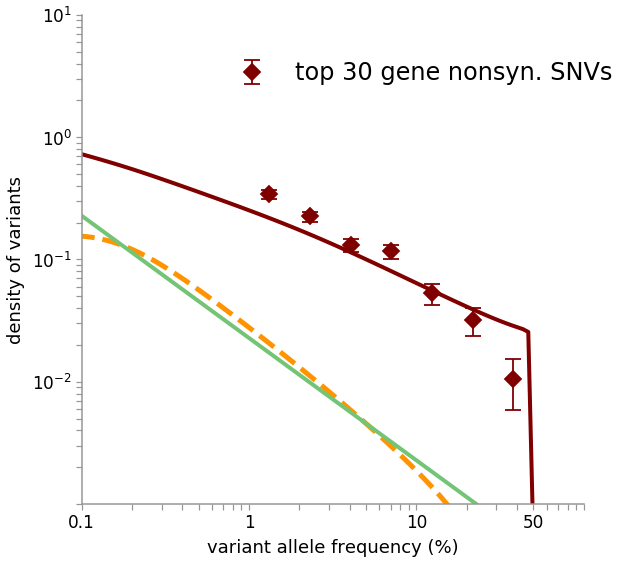

In [153]:
# plot best fit to nonsyn VAF spectrum for top x genes from 11th gene


for num_of_genes in [15, 20, 30]:
    
    plt.clf()
    plt.close('all')
    f, ax1 = plt.subplots(1, 1, figsize=(9,9))
    font = {'weight' : 'normal','size'   : 16}
    matplotlib.rc('font', **font)

    major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
    major_tick_labels= ['0.1%', "1%", '10%', '50%' ]

    axisfont=14*1.2
    
    print('for num_of_genes', num_of_genes)

    best_fit_nonsyn_driver_rate = top_x_from_11th_gene_best_fit_nonsyn_driver_rate[num_of_genes]
    Martincorena_top_x_from_11th_nonsyn_rate = top_x_from_11th_gene_total_nonsyn_rate[num_of_genes]
    Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix = top_x_from_11th_gene_dev_per_doubling_nonsyn_rate[num_of_genes]
    print('best_fit_nonsyn_driver_rate', best_fit_nonsyn_driver_rate)
    print('Martincorena_top_x_from_11th_nonsyn_rate', Martincorena_top_x_from_11th_nonsyn_rate)
    print('Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix', Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix)

    list_of_top_x_from_11th_gene_vaf_trimmed = dict_of_list_of_top_x_from_11th_gene_vaf_trimmed[num_of_genes]

    plot_log_hist_data_for_plot_not_rescaled(list_of_top_x_from_11th_gene_vaf_trimmed, n_sample, n_bins_top_x_gene-1, lmin, lmax, 'top %s gene nonsyn. SNVs' %num_of_genes, 'D',\
                                              12, 'maroon')

    x=np.linspace(np.log(10**-4), np.log(0.49999999999), 120)


    nonsyn_haploid_passenger_rate = Martincorena_top_x_from_11th_nonsyn_rate- best_fit_nonsyn_driver_rate
    if nonsyn_haploid_passenger_rate<0:
        nonsyn_haploid_passenger_rate = 0
    print('nonsyn_haploid_passenger_rate', nonsyn_haploid_passenger_rate)
    b = 3
    d = 0.1
    s_max = float('inf')
    


    Nonsyn_passengers_top_x_genes = [np.log(linProbtheory_actual_ages_hitch(l, best_fit_nonsyn_driver_rate, nonsyn_haploid_passenger_rate, N_tau_fitted, s_lower, s_upper, b, d, s_max)) for l in x]
    ax1.plot(x, Nonsyn_passengers_top_x_genes, c = c3, lw = 5, linestyle='--',  label= '')
    print('Nonsyn_passengers_top_x_genes', Nonsyn_passengers_top_x_genes)


    fitted_VAF_fixed_DFE = [np.log(driver_contrib(l, best_fit_nonsyn_driver_rate, N_tau_fitted, s_tolerance)) for l in x]
#     ax1.plot(x, fitted_VAF_fixed_DFE, c = 'maroon', lw = 4, alpha = 1, zorder = 0, label = 'nonsyn. drivers')
    print('fitted_VAF_fixed_DFE', fitted_VAF_fixed_DFE)


    early_developmentals_y=[np.log(linProbtheory_ages_dev_not_normalized(l, Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix)) for l in x]
    ax1.plot(x, early_developmentals_y, c = green3, lw = 4)
    print('early_developmentals_y', early_developmentals_y)  


    best_fit_spectrum = [logProbtheory_actual_ages_nonsyn_delta_exp_power_p_fixed_at_3_q_fixed_at_10p_high_s_drivers_only(l, [best_fit_nonsyn_driver_rate], Martincorena_top_x_from_11th_nonsyn_rate, \
                                                                                 N_tau_fitted, s_lower, s_upper, Martincorena_top_x_from_11th_dev_per_doubling_nonsynonymous_mu_LeeSix, fraction_of_drivers_that_matters, s_tolerance) for l in x]
    ax1.plot(x, best_fit_spectrum, c = 'maroon', lw = 4, alpha = 1, zorder = 0)
    print('best_fit_spectrum', best_fit_spectrum)    

    ax1.legend(bbox_to_anchor=(1.1, 0.95), frameon=0, fontsize = 12*2)
#     ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.85, 0.8), frameon=0, fontsize = 14)
    ax1.set_ylim(np.log(10**-3), np.log(10**1))

#     plt.savefig('Martincorena_driver_analysis_top_%s_from_11th_genes_best_fit_DFE_with_dev_contrib_and_HH_contrib.pdf' %num_of_genes, bbox_inches='tight')
    # plt.show()

### estimating the explained positive selection from the synonymous VAF spectra 

In [57]:
# trim synonymous data
n_bins_syn = 10
trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)
lmin_syn = trimmed_lmin
lmax_syn = trimmed_lmax

print('trimmed_fmax', trimmed_fmax, 'trimmed_fmin', trimmed_fmin)
print('lmin_syn', lmin_syn, 'lmax_syn', lmax_syn)
print('i.e. fmin_syn', np.exp(lmin_syn), 'fmax_syn', np.exp(lmax_syn))


list_of_syn_SNV_vaf_Martincorena_trimmed=[]
for i in list_of_syn_SNV_vaf_Martincorena:
    if trimmed_fmin < i < trimmed_fmax:
        list_of_syn_SNV_vaf_Martincorena_trimmed.append(i)
 
VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(list_of_syn_SNV_vaf_Martincorena_trimmed, n_sample, Martincorena_synonymous_mu,\
                                                                                        n_bins_syn, lmin_syn, lmax_syn)

VAF_info_syn_cumulative_shift_to_left = rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(list_of_syn_SNV_vaf_Martincorena_trimmed, n_sample, Martincorena_synonymous_mu,\
                                                                                        n_bins_syn, lmin_syn, lmax_syn)

print('\nnumber of bins set is', n_bins_syn)
print('\nVAF_info_syn_cumulative', VAF_info_syn_cumulative)
print('\nVAF_info_syn_cumulative_shift_to_left', VAF_info_syn_cumulative_shift_to_left)

VAF_info_syn_cumulative_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in VAF_info_syn_cumulative:
    if i[1] != -(float('inf')):
        VAF_info_syn_cumulative_without_inf.append(i)
        
print('\nVAF_info_syn_cumulative_without_inf', VAF_info_syn_cumulative_without_inf)        
print('\nmax VAF is', np.exp(VAF_info_syn_cumulative[len(VAF_info_syn_cumulative)-1][0]))

VAF_info_syn_cumulative_shift_to_left_without_inf = []    #remove the densities for the VAF bins for which there were no densities
for i in VAF_info_syn_cumulative_shift_to_left:
    if i[1] != -(float('inf')):
        VAF_info_syn_cumulative_shift_to_left_without_inf.append(i)
        
print('\nVAF_info_syn_cumulative_shift_to_left_without_inf', VAF_info_syn_cumulative_shift_to_left_without_inf)        
print('\nmax VAF is', np.exp(VAF_info_syn_cumulative_shift_to_left[len(VAF_info_syn_cumulative_shift_to_left)-1][0]))


trimmed_fmax 0.5 trimmed_fmin 0.01
lmin_syn -4.605170185988091 lmax_syn -0.6931471805599453
i.e. fmin_syn 0.010000000000000004 fmax_syn 0.5
bin_centres 9
bin_centres_without_zero 8

number of bins set is 10

VAF_info_syn_cumulative [(-4.387835574575416, 4.622359403571901, 107), (-3.953166351750067, 4.154223188500961, 67), (-3.518497128924717, 3.9007742876914215, 52), (-3.083827906099368, 3.3507279507721495, 30), (-2.649158683274018, 2.9940530068334175, 21), (-2.214489460448669, 2.588587898725253, 14), (-1.7798202376233194, 2.3474258419083647, 11), (-1.34515101479797, 1.048142857778104, 3), (-0.9104817919726202, -inf, 0)]

VAF_info_syn_cumulative_shift_to_left [(-4.605170185988091, 4.622359403571901, 107), (-4.170500963162741, 4.154223188500961, 67), (-3.735831740337392, 3.9007742876914215, 52), (-3.3011625175120427, 3.3507279507721495, 30), (-2.866493294686693, 2.9940530068334175, 21), (-2.4318240718613433, 2.588587898725253, 14), (-1.997154849035994, 2.3474258419083647, 11), (-1.56248

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in log


In [58]:
def linProbtheory_actual_ages_hitch_global(l, N_tau, params, s_tolerance, s_max, Martincorena_donor_ages, list_of_n_samples_per_person, n_sample):
    
    s_peak = 0.0
    haploid_driver_mut_rate = params[2]
    b = params[0]
    d = params[1]
    
    weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
#     print(s_max)
    normalization=integrate.quad(weight_s, 0.0, s_max)
    normalized_rho_s= lambda s: (1/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)

    def rho(s):
        result = 0
        for j in range(len(Martincorena_donor_ages)):

            t = Martincorena_donor_ages[j]
            result = result + hitchhiking_Reed_Model(l, N_tau, t, haploid_driver_mut_rate*normalized_rho_s(s), s)*list_of_n_samples_per_person[j]/n_sample

        return result

    passenger_contrib = integrate.quad(rho, s_tolerance, s_max)[0]

    predicted_density = passenger_contrib + 0 


    return predicted_density
    

In [93]:
# optimization for total driver mutation rate

import timeit

start = timeit.default_timer()

N_tau_fitted = 10**4
p = 3
q = 0.1
s_max = 1

lmin = lmin_syn
lmax = lmax_syn

# fitting to synonymous data
list_relevant_logfreq = []
for datapoint in VAF_info_syn_cumulative_shift_to_left_without_inf:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
print('list_relevant_logfreq', list_relevant_logfreq)

normalized_HH_from_lmax_shift_left_prediction = {}
bin_size=(lmax_syn-lmin_syn)/(n_bins_syn-1)

for j in range(len(list_relevant_logfreq)):
    count=0

    logfreq = list_relevant_logfreq[j] 
    
    predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch_global(l, N_tau_fitted, [p,q,1], s_tolerance, s_max,\
                                                                                           Martincorena_donor_ages, list_of_n_samples_per_person, n_sample)
                                        ),\
                         logfreq, lmax)[0]

    normalized_HH_from_lmax_shift_left_prediction[logfreq] = predicted_density    

    print('normalized_HH_from_lmax_shift_left_prediction', normalized_HH_from_lmax_shift_left_prediction)


    
  


list_relevant_logfreq [-4.605170185988091, -4.170500963162741, -3.735831740337392, -3.3011625175120427, -2.866493294686693, -2.4318240718613433, -1.997154849035994, -1.5624856262106448]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357}
normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763}
normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763, -3.735831740337392: 307221.85465075186}
normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763, -3.735831740337392: 307221.85465075186, -3.3011625175120427: 173392.26021101561}
normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763, -3.735831740337392: 307221.85465075186, -3.3011625175120427: 173392.26021101561, -2.866493294686693: 92874.90478404971}
normalized_HH_from_lmax_shift_left_prediction {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763, -3.735831740337392: 307221.85465075186, -3.3011625175

In [59]:
# # storing results

# normalized_HH_from_lmax_shift_left_prediction = {-4.605170185988091: 875233.0716546357, -4.170500963162741: 525353.188606763, -3.735831740337392: 307221.85465075186, -3.3011625175120427: 173392.26021101561, -2.866493294686693: 92874.90478404971, -2.4318240718613433: 45730.62790005507, -1.997154849035994: 19362.85186015749, -1.5624856262106448: 5945.641154464909}

normalized_HH_from_11th_parametrized_DFE_prediction = normalized_HH_from_lmax_shift_left_prediction


In [60]:
def squared_distance_calculation_HH_cumulative_optimize_faster_v3(params, data, study_total, u_syn, u_dev, N_tau, lmin, lmax, n_bins, s_lower): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        
        predicted_cumulative_density =integrate.quad(lambda l: (developmental_synonymous(l, u_dev, u_oes_syn)\
                                                ),\
                                 logfreq, lmax)[0] + u_driver*normalized_HH_from_lmax_shift_left_prediction[logfreq]



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
#                 print('square_distance',square_distance)
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:
                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                print('cumulative error is nan')
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum
                
            if square_distance!=square_distance:
                print('total_square_distance', total_square_distance, ' parameters rejected')

    return total_square_distance


In [61]:
# fitting
import scipy


p = 3
q = 0.1
s_max = 1
print('N_tau:', N_tau_fitted)



u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                   

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster_v3, initial_guess,\
                                args=(VAF_info_syn_cumulative_shift_to_left_without_inf, n_sample, Martincorena_synonymous_mu, oesophagus_dev_synonymous_mu_LeeSix, N_tau_fitted,\
                                      lmin_syn, lmax_syn, n_bins_syn, s_tolerance), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)


best_fit_u = outcome.x[0]

print('faster optimization: best-fit values for driver mutation rate :',  best_fit_u)

N_tau: 7790.895048199087
Success of fitting outcome is True
faster optimization: best-fit values for driver mutation rate : 0.0003478124999999994


### bridging the two method

In [64]:
# calculate contribution to cumulative syn VAF from top 10 drivers if using `Parametrized method' 
import timeit

start = timeit.default_timer()


lmin = lmin_syn
lmax = lmax_syn

# fitting to synonymous data
list_relevant_logfreq = []
for datapoint in VAF_info_syn_cumulative_shift_to_left_without_inf:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
print('list_relevant_logfreq', list_relevant_logfreq)

contrib_by_top_10_discrete_drivers_prediction= {}
bin_size=(lmax_syn-lmin_syn)/(n_bins_syn-1)

for j in range(len(list_relevant_logfreq)):
    count=0

    logfreq = list_relevant_logfreq[j] 
    
    predicted_density=integrate.quad(lambda l: (Predicted_syn_VAF_for_HH_with_discrete_drivers_with_dev(l, Martincorena_donor_ages, list_of_n_samples_per_person, \
                                                                     n_sample, N_tau_fitted, \
                                                                     oesophagus_dev_synonymous_mu_LeeSix, Martincorena_synonymous_mu, \
                                                                     list_of_top_10_fitness, list_of_top_10_mut, 1)

                                        ),\
                         logfreq, lmax)[0]

    contrib_by_top_10_discrete_drivers_prediction[logfreq] = predicted_density    

    print('contrib_by_top_10_discrete_drivers_prediction', contrib_by_top_10_discrete_drivers_prediction)


list_relevant_logfreq [-4.605170185988091, -4.170500963162741, -3.735831740337392, -3.3011625175120427, -2.866493294686693, -2.4318240718613433, -1.997154849035994, -1.5624856262106448]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log


contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023}
contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023, -4.170500963162741: 138.46568292707332}
contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023, -4.170500963162741: 138.46568292707332, -3.735831740337392: 82.81008909996316}
contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023, -4.170500963162741: 138.46568292707332, -3.735831740337392: 82.81008909996316, -3.3011625175120427: 47.752702948088775}
contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023, -4.170500963162741: 138.46568292707332, -3.735831740337392: 82.81008909996316, -3.3011625175120427: 47.752702948088775, -2.866493294686693: 26.104546402691405}
contrib_by_top_10_discrete_drivers_prediction {-4.605170185988091: 225.65181445560023, -4.170500963162741: 138.46568292707332, -3.735831740337392: 82.81008909996316, 

In [65]:
def squared_distance_calculation_HH_cumulative_optimize_faster_v4(params, data, study_total, u_syn, u_dev, N_tau, lmin, lmax, n_bins, s_lower): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        
        predicted_cumulative_density =integrate.quad(lambda l: (developmental_synonymous(l, u_dev, u_oes_syn)\
                                                ),\
                                 logfreq, lmax)[0] + contrib_by_top_10_discrete_drivers_prediction[logfreq]\
                                    +u_driver*normalized_HH_from_11th_parametrized_DFE_prediction[logfreq]



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
#                 print('square_distance',square_distance)
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:
                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                print('cumulative error is nan')
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum
                
            if square_distance!=square_distance:
                print('total_square_distance', total_square_distance, ' parameters rejected')

    return total_square_distance


In [67]:
# finding the driver mutation rate contributed by the top 10 genes if using 'Parametrized method'
import scipy


p = 3
q = 0.1
s_max = 1
print('N_tau is:', N_tau_fitted)



u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                   

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster_v4, initial_guess,\
                                args=(VAF_info_syn_cumulative_shift_to_left_without_inf, n_sample, Martincorena_synonymous_mu, oesophagus_dev_synonymous_mu_LeeSix, N_tau_fitted,\
                                      lmin_syn, lmax_syn, n_bins_syn, s_tolerance), method='Nelder-Mead',\
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)


best_fit_haploid_from_11th = outcome.x[0]

print('faster optimization: best-fit values for driver mutation rate :',  best_fit_haploid_from_11th)

N_tau is: 7790.895048199087
Success of fitting outcome is True
faster optimization: best-fit values for driver mutation rate : 8.10937499999987e-05


# Fraction of explained positive selection across all genes (Figure 6, S16)

We combine results from 'Discrete method' (1-10th gene) and 'Parametrized method' (11th gene onwards) to estimate the fraction of positive selection explained by including progressively lower ranked genes.

In [77]:
# # Storing results

print('\nfold_increase_top_x_gene', fold_increase_top_x_gene)
print('\ntop_x_from_11th_gene_best_fit_nonsyn_driver_rate', top_x_from_11th_gene_best_fit_nonsyn_driver_rate)

fold_increase_top_x_gene = {1: 2.56146545410156, 2: 1.8798104858398434, 3: 1.7528059387207027, 4: 1.6340866088867188, 5: 1.5477377319335934, 6: 1.5311737823486324, 7: 1.5237744140624998, 8: 1.5159301757812496, 9: 1.4937826538085934, 10: 1.4806233215332025}

top_x_from_11th_gene_best_fit_nonsyn_driver_rate = {10: 1e-05, 15: 1.4125000000000011e-05, 20: 2.650000000000004e-05, 25: 3.0000000000000045e-05, 30: 3.3500000000000055e-05, 35: 3.9500000000000066e-05, 40: 4.250000000000007e-05, 45: 4.5750000000000075e-05, 50: 4.7500000000000084e-05, 55: 4.925000000000009e-05, 60: 5.0500000000000096e-05, 65: 5.22500000000001e-05, 70: 5.22500000000001e-05, 74: 5.2750000000000096e-05}



fold_increase_top_x_gene {1: 2.56146545410156, 2: 1.8798104858398434, 3: 1.7528059387207027, 4: 1.6340866088867188, 5: 1.5477377319335934, 6: 1.5311737823486324, 7: 1.5237744140624998, 8: 1.5159301757812496, 9: 1.4937826538085934, 10: 1.4806233215332025}

top_x_from_11th_gene_best_fit_nonsyn_driver_rate {10: 1e-05, 15: 1.4125000000000011e-05, 20: 2.650000000000004e-05, 25: 3.0000000000000045e-05, 30: 3.3500000000000055e-05, 35: 3.9500000000000066e-05, 40: 4.250000000000007e-05, 45: 4.5750000000000075e-05, 50: 4.7500000000000084e-05, 55: 4.925000000000009e-05, 60: 5.0500000000000096e-05, 65: 5.22500000000001e-05, 70: 5.22500000000001e-05, 74: 5.2750000000000096e-05}


In [76]:
# p = 3, d = 0.1

fraction_of_positive_selection_explained_by_top_10 = 1/fold_increase_top_10_genes_discrete

passenger_contribution_x_combined_DFE = [0]
passenger_contribution_y_combined_DFE = [0]
for y, fold_increase in fold_increase_top_x_gene.items():
    if y !=0:
        passenger_contribution_x_combined_DFE.append(y)
        passenger_contribution_y_combined_DFE.append(1/fold_increase)
for x, best_fit_rate in top_x_from_11th_gene_best_fit_nonsyn_driver_rate.items():
    if x!=10:
        passenger_contribution_x_combined_DFE.append(x)
        fraction = fraction_of_positive_selection_explained_by_top_10 + (1-fraction_of_positive_selection_explained_by_top_10)*best_fit_rate/best_fit_haploid_from_11th
        passenger_contribution_y_combined_DFE.append(fraction)

In [79]:
print('passenger_contribution_y_combined_DFE', passenger_contribution_y_combined_DFE)
print('passenger_contribution_x_combined_DFE', passenger_contribution_x_combined_DFE)

passenger_contribution_y_combined_DFE [0, 0.390401517380898, 0.5319685189186663, 0.5705138132575343, 0.6119626674385922, 0.6461042974966418, 0.6530937320949441, 0.6562651208546829, 0.6596609896525347, 0.6694414327615665, 0.6753912257470648, 0.7319319448076926, 0.7814676190289507, 0.7954777087076903, 0.8094877983864299, 0.8335050949785551, 0.8455137432746177, 0.8585231122620187, 0.8655281571013886, 0.8725332019407585, 0.8775368053974512, 0.884541850236821, 0.884541850236821, 0.8865432916194981]
passenger_contribution_x_combined_DFE [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]


In [ ]:
# N tau = 7790
passenger_contribution_y_combined_DFE = [0, 0.390401517380898, 0.5319685189186663, 0.5705138132575343, 0.6119626674385922, 0.6461042974966418, 0.6530937320949441, 0.6562651208546829, 0.6596609896525347, 0.6694414327615665, 0.6753912257470648, 0.7319319448076926, 0.7814676190289507, 0.7954777087076903, 0.8094877983864299, 0.8335050949785551, 0.8455137432746177, 0.8585231122620187, 0.8655281571013886, 0.8725332019407585, 0.8775368053974512, 0.884541850236821, 0.884541850236821, 0.8865432916194981]
passenger_contribution_x_combined_DFE = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]


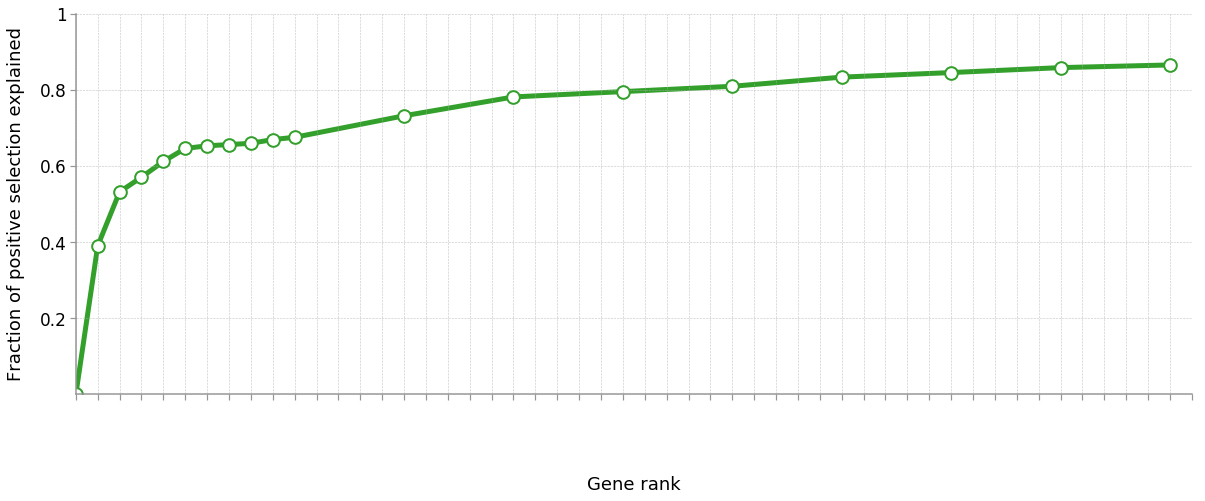

In [81]:
# Plot summary graph

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

# Martincorena_color = '#00441b'
Martincorena_color = '#33a02c'
Bolton_color = '#6a3d9a'

x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)

ax1.scatter(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], marker='o', edgecolors=Martincorena_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], color = Martincorena_color, lw=5, zorder=0, label='oesophagus')

  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =60*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.8, 0.6), frameon=0, fontsize = 14)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_blood_and_oesophagus.pdf', bbox_inches='tight')

### other values of N$\tau$ 

In [74]:
# Stored results

# N tau = 10^4
passenger_contribution_x_combined_DFE_Ntau_10to4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]
passenger_contribution_y_combined_DFE_Ntau_10to4 = [0, 0.4102824278908415, 0.5533955897742399, 0.5896487740738083, 0.628704500922153, 0.6608211582157265, 0.6674756169128316, 0.6737010392015343, 0.6749017115682889, 0.6842210601145875, 0.6897514559311748, 0.7426203903526267, 0.7898577195041794, 0.8021138913921498, 0.8153914109374512, 0.8358183640840686, 0.8490958836293699, 0.8613520555173404, 0.8674801414613256, 0.8919924852372665, 0.8787149656919652, 0.8858643992932812, 0.8858643992932812, 0.8868857469506121]
print('passenger_contribution_y_combined_DFE_Ntau_10to4', passenger_contribution_y_combined_DFE_Ntau_10to4)

# N tau = 7500
passenger_contribution_y_combined_DFE_Ntau_7500 = [0, 0.4027731709653991, 0.5438706952733225, 0.582708384755404, 0.6245376909678181, 0.6589697705058541, 0.6660007607546532, 0.6680643798931134, 0.6715223682393775, 0.6813838905152831, 0.6871144083339044, 0.7401890753646725, 0.7872377976670566, 0.8002167555435764, 0.8127321792102205, 0.8335912186546272, 0.8465701765311469, 0.8586220659879152, 0.8651115449261751, 0.8725280922841865, 0.8771634343829435, 0.8836529133212034, 0.8836529133212034, 0.8845799817409548]
passenger_contribution_x_combined_DFE_Ntau_7500 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]
print('passenger_contribution_y_combined_DFE_Ntau_7500', passenger_contribution_y_combined_DFE_Ntau_7500)

# N tau = 5000
passenger_contribution_x_combined_DFE_Ntau_5000 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]
passenger_contribution_y_combined_DFE_Ntau_5000 = [0, 0.3971139193288429, 0.5347311714427968, 0.5732599963611426, 0.6154278992165446, 0.649395561525612, 0.6562796446660707, 0.6646194785755141, 0.6689442509030891, 0.678610765635431, 0.6856887684878636, 0.7418112240748115, 0.7884192016769523, 0.8000711960774877, 0.8132767897314275, 0.8326967803989862, 0.8459023740529261, 0.8575543684534614, 0.8637687654670803, 0.8715367617341037, 0.8754207598676154, 0.8808583572545319, 0.8824119565079365, 0.8824119565079365]
print('passenger_contribution_y_combined_DFE_Ntau_5000', passenger_contribution_y_combined_DFE_Ntau_5000)

passenger_contribution_y_combined_DFE_Ntau_10to4 [0, 0.4102824278908415, 0.5533955897742399, 0.5896487740738083, 0.628704500922153, 0.6608211582157265, 0.6674756169128316, 0.6737010392015343, 0.6749017115682889, 0.6842210601145875, 0.6897514559311748, 0.7426203903526267, 0.7898577195041794, 0.8021138913921498, 0.8153914109374512, 0.8358183640840686, 0.8490958836293699, 0.8613520555173404, 0.8674801414613256, 0.8919924852372665, 0.8787149656919652, 0.8858643992932812, 0.8858643992932812, 0.8868857469506121]
passenger_contribution_y_combined_DFE_Ntau_7500 [0, 0.4027731709653991, 0.5438706952733225, 0.582708384755404, 0.6245376909678181, 0.6589697705058541, 0.6660007607546532, 0.6680643798931134, 0.6715223682393775, 0.6813838905152831, 0.6871144083339044, 0.7401890753646725, 0.7872377976670566, 0.8002167555435764, 0.8127321792102205, 0.8335912186546272, 0.8465701765311469, 0.8586220659879152, 0.8651115449261751, 0.8725280922841865, 0.8771634343829435, 0.8836529133212034, 0.883652913321203

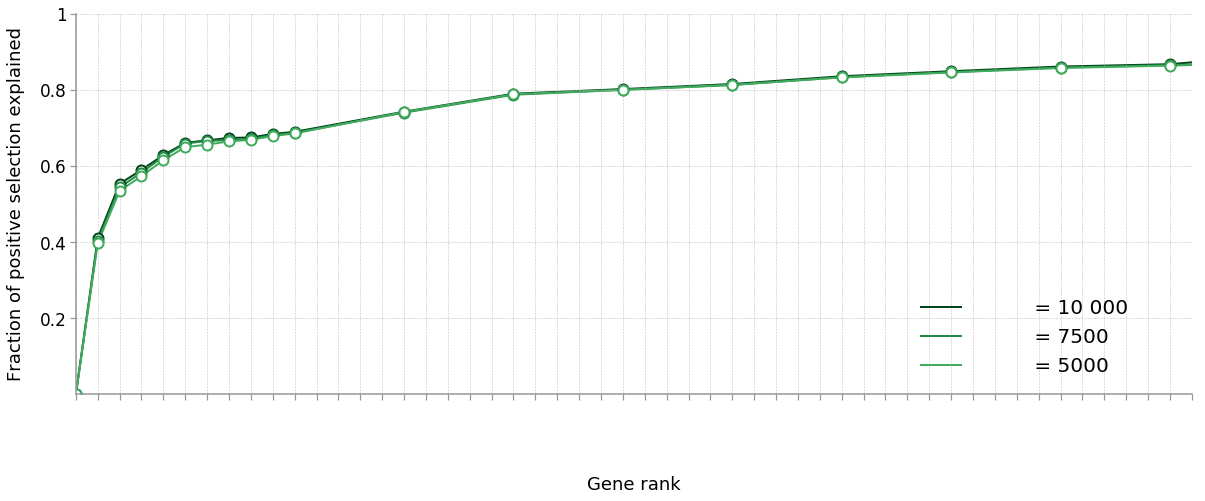

In [153]:
# Plot summary graph

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

Martincorena_color = '#00441b'
Martincorena_color_Ntau_10to4 = '#00441b'
Martincorena_color_Ntau_7500 = '#238b45'
Martincorena_color_Ntau_5000 = '#41ab5d'

Bolton_color = '#6a3d9a'

x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
ax1.scatter(passenger_contribution_x_combined_DFE_Ntau_10to4, passenger_contribution_y_combined_DFE_Ntau_10to4, marker='o', edgecolors=Martincorena_color_Ntau_10to4, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE_Ntau_10to4, passenger_contribution_y_combined_DFE_Ntau_10to4, color = Martincorena_color_Ntau_10to4, lw=2, zorder=0, label='         = 10 000')

ax1.scatter(passenger_contribution_x_combined_DFE_Ntau_7500, passenger_contribution_y_combined_DFE_Ntau_7500, marker='o', edgecolors=Martincorena_color_Ntau_7500, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE_Ntau_7500, passenger_contribution_y_combined_DFE_Ntau_7500, color = Martincorena_color_Ntau_7500, lw=2, zorder=0, label='         = 7500')

ax1.scatter(passenger_contribution_x_combined_DFE_Ntau_5000, passenger_contribution_y_combined_DFE_Ntau_5000, marker='o', edgecolors=Martincorena_color_Ntau_5000, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE_Ntau_5000, passenger_contribution_y_combined_DFE_Ntau_5000, color = Martincorena_color_Ntau_5000, lw=2, zorder=0, label='         = 5000')

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =60*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.85, 0.15), frameon=0, fontsize = 20)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_oesophagus_only_different_N_taus.pdf', bbox_inches='tight')
